In [1]:
!pip install polars


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install pyarrow


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
def read_parquet_by_type(train_path: str):
    # Lấy tất cả các file parquet trong thư mục
    files = [os.path.join(train_path, f) for f in os.listdir(train_path) if f.endswith('.parquet')]
    
    # Phân loại các file theo loại tên
    user_chunk_files = [file for file in files if 'user_chunk' in file]
    purchase_history_chunk_files = [file for file in files if 'purchase_history_daily_chunk' in file]
    item_chunk_files = [file for file in files if 'item_chunk' in file]
    
    # Đọc các file riêng biệt thành DataFrame
    user_chunk_df = pl.concat([pl.read_parquet(file) for file in user_chunk_files]) if user_chunk_files else None
    purchase_history_chunk_df = pl.concat([pl.read_parquet(file) for file in purchase_history_chunk_files]) if purchase_history_chunk_files else None
    item_chunk_df = pl.concat([pl.read_parquet(file) for file in item_chunk_files]) if item_chunk_files else None
    
    # Trả về một dictionary chứa các DataFrame
    return {
        "user_chunk": user_chunk_df,
        "purchase_history_chunk": purchase_history_chunk_df,
        "item_chunk": item_chunk_df
    }

In [6]:
train_path = './Item-Recommendation-Dataset'
dataframes = read_parquet_by_type(train_path)

df_user = dataframes["user_chunk"]
df_purchase = dataframes["purchase_history_chunk"]
df_item = dataframes["item_chunk"]

# Phân Tích Đơn Biến

## User Chunk

In [ ]:
print("User Chunk DataFrame:")
df_user.head()

User Chunk DataFrame:


customer_id,gender,location,province,membership,timestamp,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,region,location_name,install_app,install_date,district,user_id,is_deleted
i32,str,i32,str,str,i64,datetime[μs],datetime[μs],i32,datetime[μs],str,str,str,str,i64,str,str,bool
14732,"""Nam""",155,"""Hồ Chí Minh""","""Standard""",1306357911,2011-05-25 21:11:51.677,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - Grand View Phú Mỹ Hưng""","""In-Store""",1306281600,"""7""","""e1e48206652bf8c279ff0206c69a80…",false
15126,"""Nữ""",300,"""Hồ Chí Minh""","""Standard""",1306357911,2011-05-25 21:11:51.677,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - 121A Nguyễn Duy Trinh""","""In-Store""",1306281600,"""Thủ Đức""","""77891759204bd27e69fb11a7b92889…",false
29718,"""Nữ""",157,"""Bến Tre""","""Standard""",1312126692,2011-07-31 15:38:12.750,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đồng bằng sông Cửu Long""","""BTR - 179 Nguyễn Đình Chiểu""","""In-Store""",1582070400,"""Bến Tre""","""b8041b584a0bb6655361727a0a6108…",false
30077,"""Nữ""",53,"""Hồ Chí Minh""","""Standard""",1314302782,2011-08-25 20:06:22.797,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - 101 Trần Quang Khải""","""In-Store""",1314230400,"""1""","""c52ceaca44a83ec41a219cfaff0e05…",false
30085,"""Nữ""",660,"""Hồ Chí Minh""","""Standard""",1314310024,2011-08-25 22:07:04.267,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - 85-87 Tây Thạnh""","""In-Store""",1314230400,"""Tân Phú""","""74ac5764f5d67d341aacf238d7762f…",false


### Statistics and Visualize

Schema:
Schema([('customer_id', Int32), ('gender', String), ('location', Int32), ('province', String), ('membership', String), ('timestamp', Int64), ('created_date', Datetime(time_unit='us', time_zone=None)), ('updated_date', Datetime(time_unit='us', time_zone=None)), ('sync_status_id', Int32), ('last_sync_date', Datetime(time_unit='us', time_zone=None)), ('sync_error_message', String), ('region', String), ('location_name', String), ('install_app', String), ('install_date', Int64), ('district', String), ('user_id', String), ('is_deleted', Boolean)])
Rows: 4,573,964, Columns: 18

First 5 rows:
shape: (5, 18)
┌────────────┬────────┬──────────┬────────────┬───┬────────────┬──────────┬────────────┬───────────┐
│ customer_i ┆ gender ┆ location ┆ province   ┆ … ┆ install_da ┆ district ┆ user_id    ┆ is_delete │
│ d          ┆ ---    ┆ ---      ┆ ---        ┆   ┆ te         ┆ ---      ┆ ---        ┆ d         │
│ ---        ┆ str    ┆ i32      ┆ str        ┆   ┆ ---        ┆ str      ┆ str   

C:\Users\T14\AppData\Local\Temp\ipykernel_28064\3701951272.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


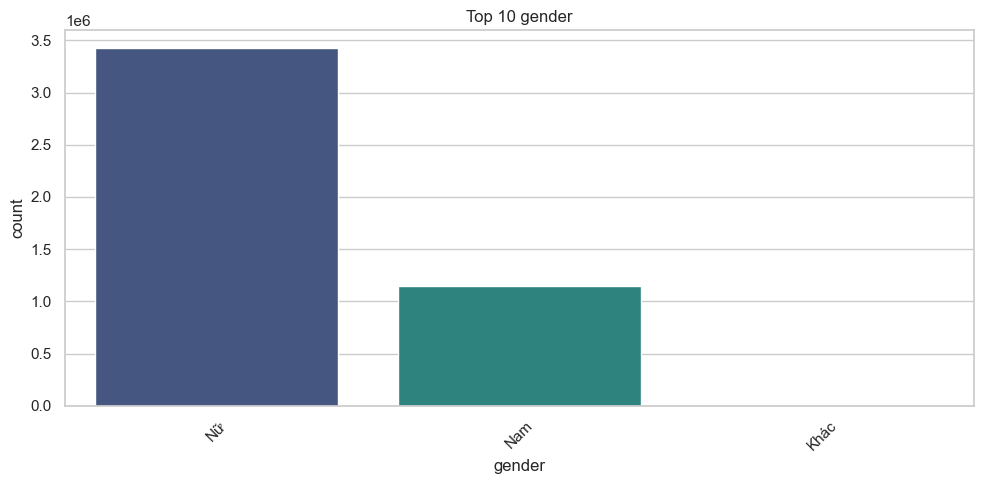


Top 10 for location:
shape: (10, 2)
┌──────────┬───────┐
│ location ┆ count │
│ ---      ┆ ---   │
│ i32      ┆ u32   │
╞══════════╪═══════╡
│ 766      ┆ 22383 │
│ 455      ┆ 21746 │
│ 598      ┆ 21509 │
│ 264      ┆ 20835 │
│ 687      ┆ 20563 │
│ 590      ┆ 19558 │
│ 746      ┆ 17538 │
│ 882      ┆ 16810 │
│ 291      ┆ 16696 │
│ 117      ┆ 16658 │
└──────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_28064\3701951272.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


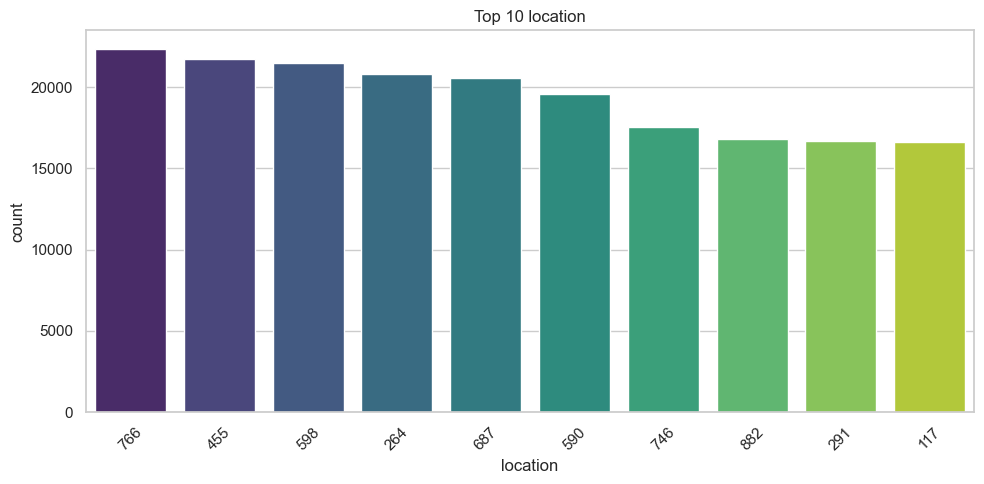


Top 10 for province:
shape: (10, 2)
┌───────────────────┬─────────┐
│ province          ┆ count   │
│ ---               ┆ ---     │
│ str               ┆ u32     │
╞═══════════════════╪═════════╡
│ Hồ Chí Minh       ┆ 1223333 │
│ Đồng Nai          ┆ 312131  │
│ Bình Dương        ┆ 287542  │
│ Hà Nội            ┆ 201491  │
│ Đà Nẵng           ┆ 146596  │
│ Lâm Đồng          ┆ 134620  │
│ Long An           ┆ 133752  │
│ Bà Rịa - Vũng Tàu ┆ 118101  │
│ Khánh Hòa         ┆ 112897  │
│ Tây Ninh          ┆ 112150  │
└───────────────────┴─────────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_28064\3701951272.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


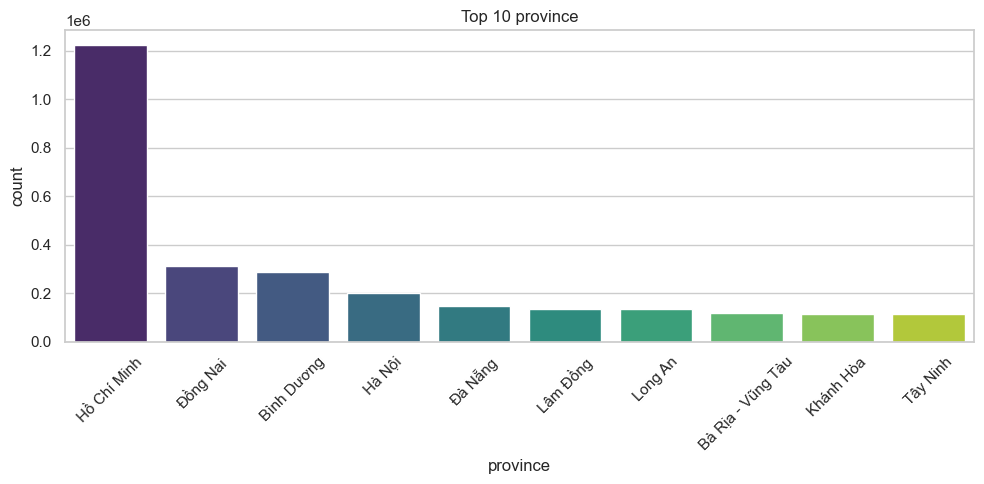


Top 10 for membership:
shape: (3, 2)
┌────────────┬─────────┐
│ membership ┆ count   │
│ ---        ┆ ---     │
│ str        ┆ u32     │
╞════════════╪═════════╡
│ Standard   ┆ 4242946 │
│ Gold       ┆ 255173  │
│ Diamond    ┆ 75845   │
└────────────┴─────────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_28064\3701951272.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


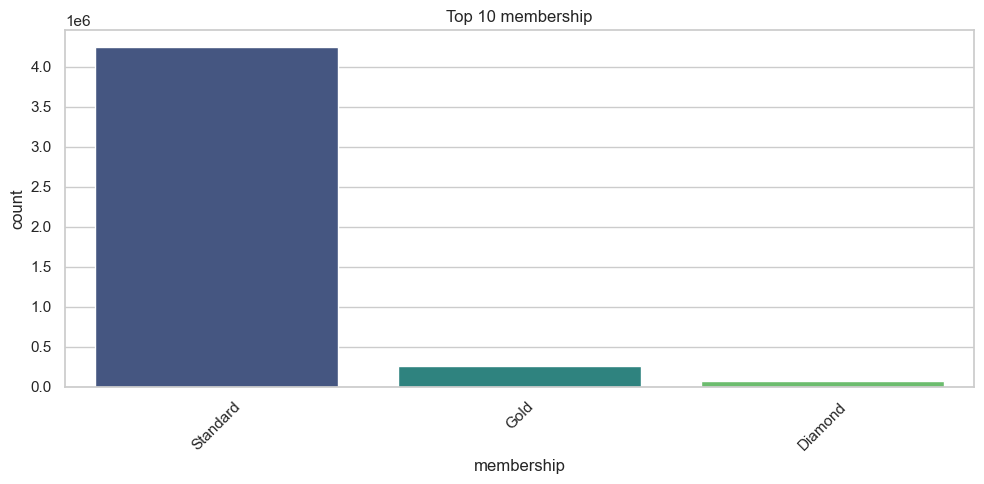


Top 10 for sync_status_id:
shape: (2, 2)
┌────────────────┬─────────┐
│ sync_status_id ┆ count   │
│ ---            ┆ ---     │
│ i32            ┆ u32     │
╞════════════════╪═════════╡
│ 2              ┆ 4235679 │
│ null           ┆ 338285  │
└────────────────┴─────────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_28064\3701951272.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


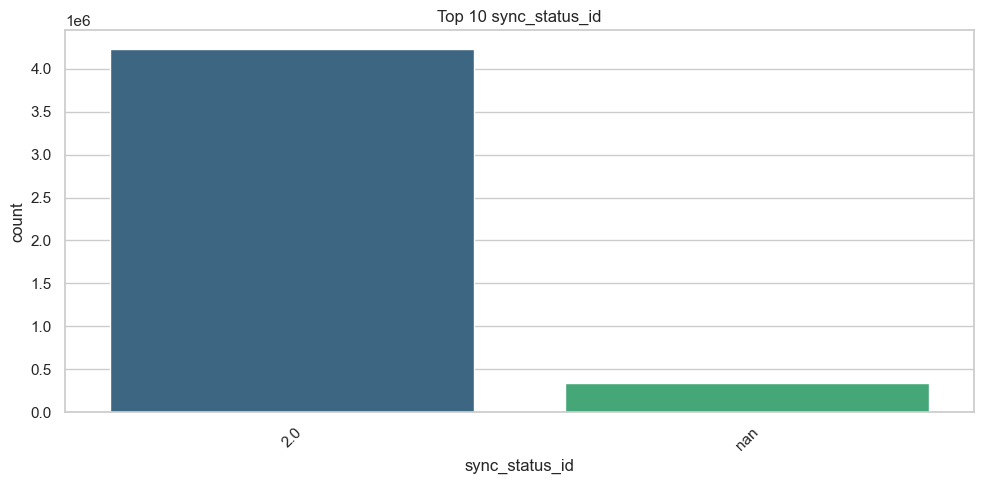


Top 10 for sync_error_message:
shape: (1, 2)
┌────────────────────┬─────────┐
│ sync_error_message ┆ count   │
│ ---                ┆ ---     │
│ str                ┆ u32     │
╞════════════════════╪═════════╡
│ null               ┆ 4573964 │
└────────────────────┴─────────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_28064\3701951272.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


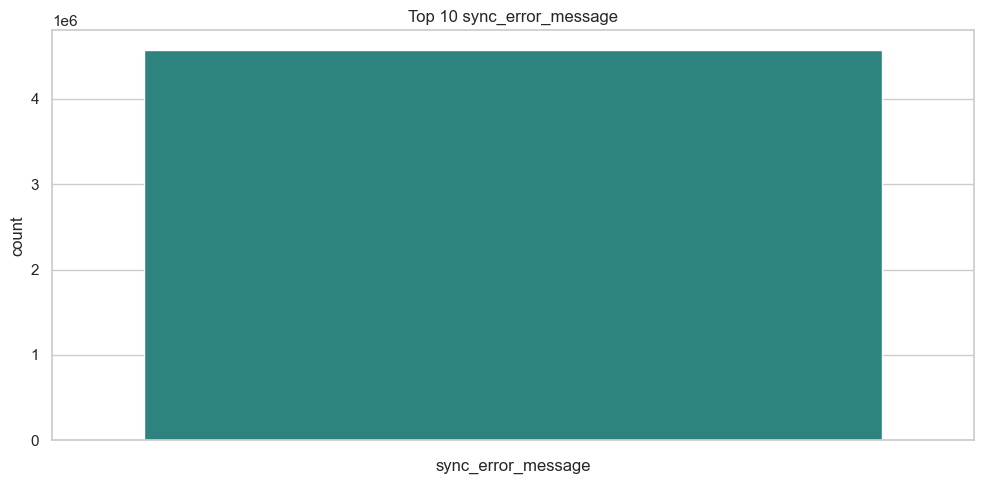


Top 10 for region:
shape: (8, 2)
┌───────────────────────────────┬─────────┐
│ region                        ┆ count   │
│ ---                           ┆ ---     │
│ str                           ┆ u32     │
╞═══════════════════════════════╪═════════╡
│ Đông Nam Bộ                   ┆ 2126066 │
│ Đồng bằng sông Cửu Long       ┆ 847970  │
│ Duyên hải Nam Trung Bộ        ┆ 577306  │
│ Đồng bằng sông Hồng           ┆ 361571  │
│ Tây Nguyên                    ┆ 333463  │
│ Bắc Trung Bộ                  ┆ 217869  │
│ Trung du và miền núi phía Bắc ┆ 105336  │
│ Duyên hải Bắc Bộ              ┆ 4383    │
└───────────────────────────────┴─────────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_28064\3701951272.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


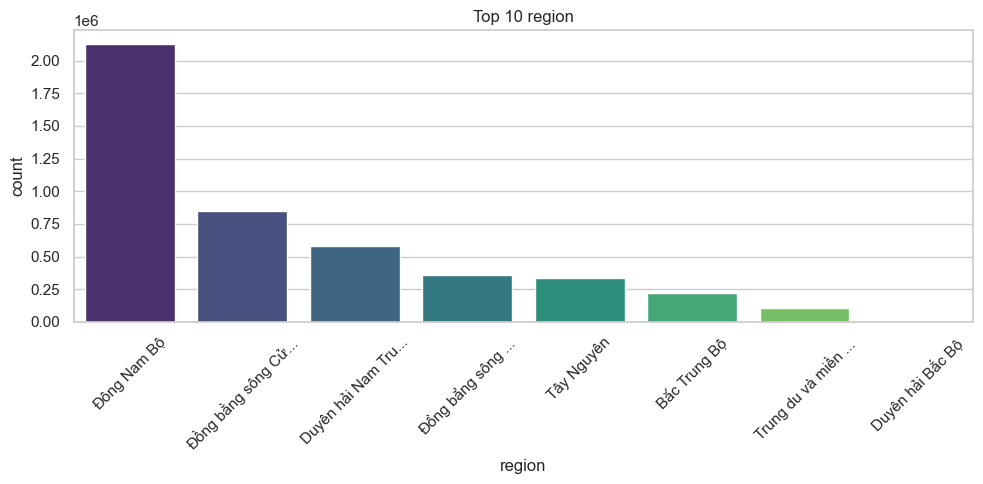


Top 10 for location_name:
shape: (10, 2)
┌───────────────────────────────┬───────┐
│ location_name                 ┆ count │
│ ---                           ┆ ---   │
│ str                           ┆ u32   │
╞═══════════════════════════════╪═══════╡
│ DNA - 81 - 83 Nguyễn Văn Linh ┆ 22383 │
│ HNI - Aeon Mall Hà Đông       ┆ 21746 │
│ HCM - 66 Nguyễn Du            ┆ 21509 │
│ HNI - 933 La Thành            ┆ 20835 │
│ HCM - 9 – 11 – 13 Nguyễn Trãi ┆ 20563 │
│ DNA - 93-95 Lê Văn Hiến       ┆ 19558 │
│ HNI - 16B-4 Nguyễn Văn Lộc    ┆ 17538 │
│ HNI - 147K Đội Cấn            ┆ 16810 │
│ TVI - 62 Điện Biên Phủ        ┆ 16696 │
│ VLO - 47- 49 Trưng Nữ Vương   ┆ 16658 │
└───────────────────────────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_28064\3701951272.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


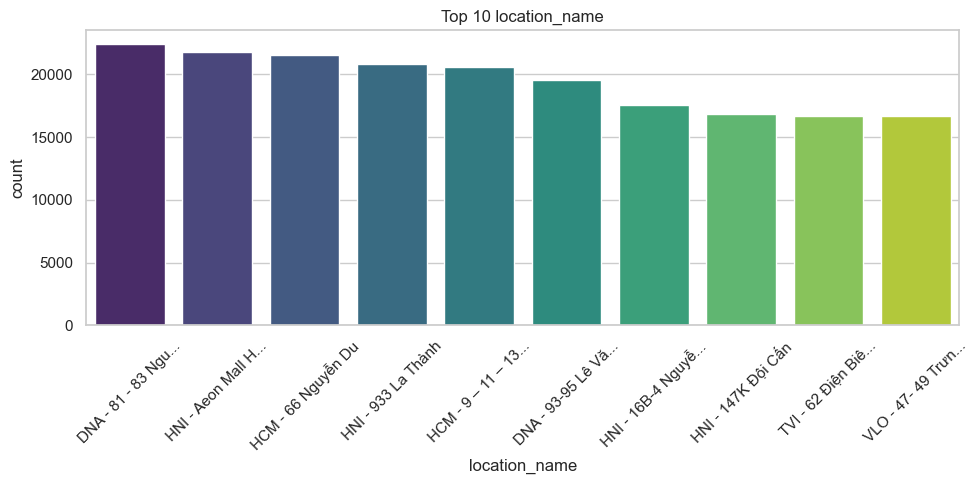


Top 10 for install_app:
shape: (10, 2)
┌────────────────┬─────────┐
│ install_app    ┆ count   │
│ ---            ┆ ---     │
│ str            ┆ u32     │
╞════════════════╪═════════╡
│ In-Store       ┆ 3942000 │
│ SPE            ┆ 347908  │
│ iOS            ┆ 127882  │
│ Android        ┆ 91951   │
│ Web            ┆ 35876   │
│ CRM Partner    ┆ 15992   │
│ Call           ┆ 10584   │
│ Chat           ┆ 1727    │
│ Wholesale      ┆ 38      │
│ Không xác định ┆ 5       │
└────────────────┴─────────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_28064\3701951272.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


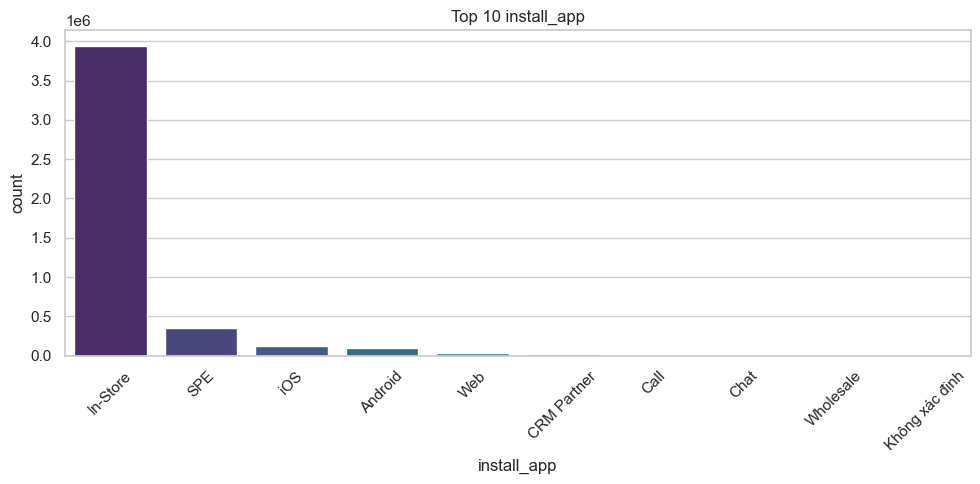


Top 10 for district:
shape: (10, 2)
┌────────────┬────────┐
│ district   ┆ count  │
│ ---        ┆ ---    │
│ str        ┆ u32    │
╞════════════╪════════╡
│ Thủ Đức    ┆ 195601 │
│ Biên Hòa   ┆ 125390 │
│ Bình Tân   ┆ 105858 │
│ Tân Phú    ┆ 102835 │
│ Bình Chánh ┆ 84427  │
│ 12         ┆ 81984  │
│ Thuận An   ┆ 71387  │
│ 1          ┆ 65854  │
│ Gò Vấp     ┆ 65727  │
│ 7          ┆ 65561  │
└────────────┴────────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_28064\3701951272.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


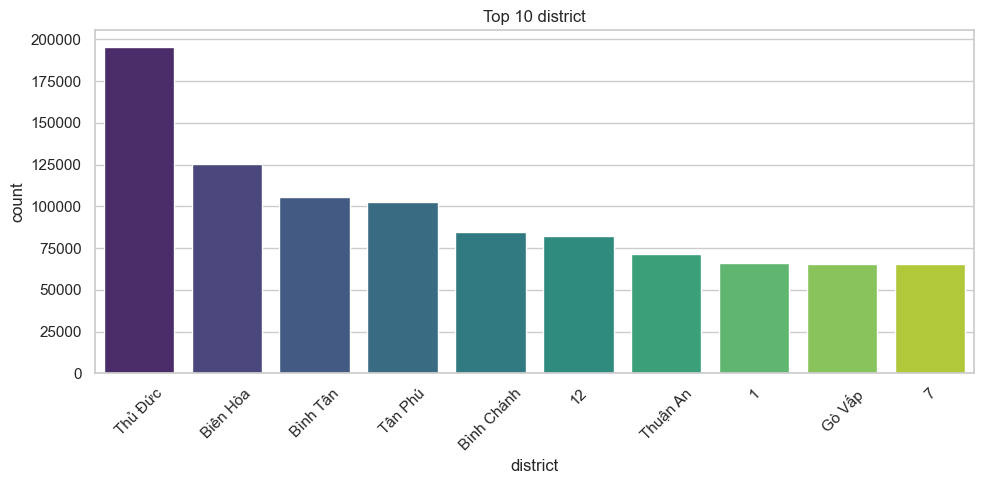

C:\Users\T14\AppData\Local\Temp\ipykernel_28064\3701951272.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")



Top 10 for is_deleted:
shape: (1, 2)
┌────────────┬─────────┐
│ is_deleted ┆ count   │
│ ---        ┆ ---     │
│ bool       ┆ u32     │
╞════════════╪═════════╡
│ false      ┆ 4573964 │
└────────────┴─────────┘


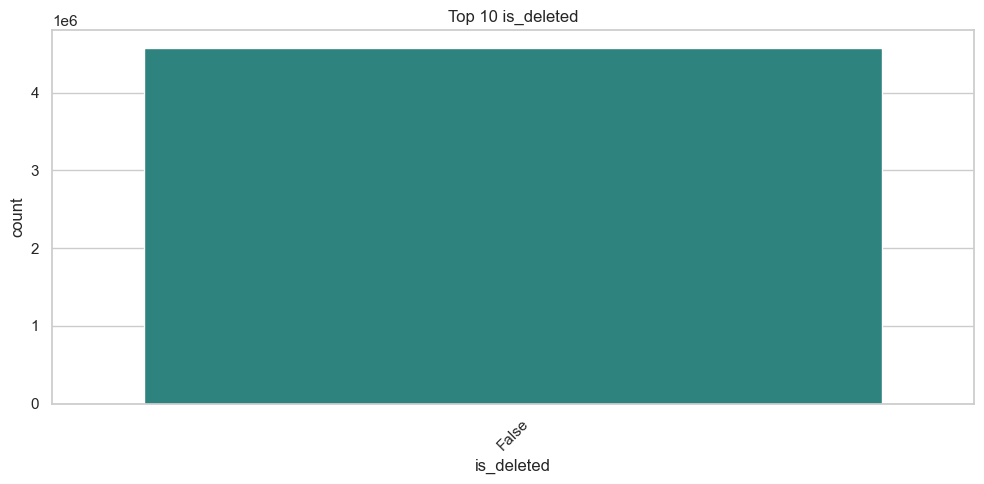


Top 10 for install_date:
shape: (10, 2)
┌──────────────┬───────┐
│ install_date ┆ count │
│ ---          ┆ ---   │
│ i64          ┆ u32   │
╞══════════════╪═══════╡
│ 1754179200   ┆ 10671 │
│ 1716681600   ┆ 10246 │
│ 1732406400   ┆ 9889  │
│ 1748131200   ┆ 8433  │
│ 1746921600   ┆ 8233  │
│ 1751760000   ┆ 7871  │
│ 1754611200   ┆ 7618  │
│ 1732320000   ┆ 7559  │
│ 1751846400   ┆ 7490  │
│ 1746835200   ┆ 7175  │
└──────────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_28064\3701951272.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


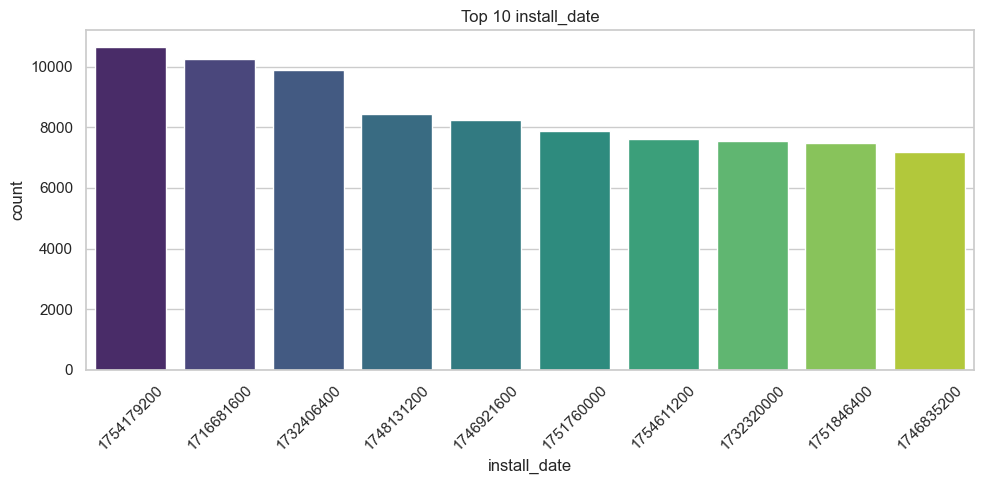


Summary for customer_id:
shape: (9, 2)
┌────────────┬─────────────┐
│ statistic  ┆ customer_id │
│ ---        ┆ ---         │
│ str        ┆ f64         │
╞════════════╪═════════════╡
│ count      ┆ 4.573964e6  │
│ null_count ┆ 0.0         │
│ mean       ┆ 6.1266e6    │
│ std        ┆ 2.4412e6    │
│ min        ┆ 14732.0     │
│ 25%        ┆ 4.53268e6   │
│ 50%        ┆ 6.843955e6  │
│ 75%        ┆ 8.029649e6  │
│ max        ┆ 9.264159e6  │
└────────────┴─────────────┘

Summary for location:
shape: (9, 2)
┌────────────┬────────────┐
│ statistic  ┆ location   │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 4.573964e6 │
│ null_count ┆ 0.0        │
│ mean       ┆ 554.053518 │
│ std        ┆ 295.523361 │
│ min        ┆ 42.0       │
│ 25%        ┆ 302.0      │
│ 50%        ┆ 547.0      │
│ 75%        ┆ 765.0      │
│ max        ┆ 1310.0     │
└────────────┴────────────┘

Summary for sync_status_id:
shape: (9, 2)
┌────────────┬───────────

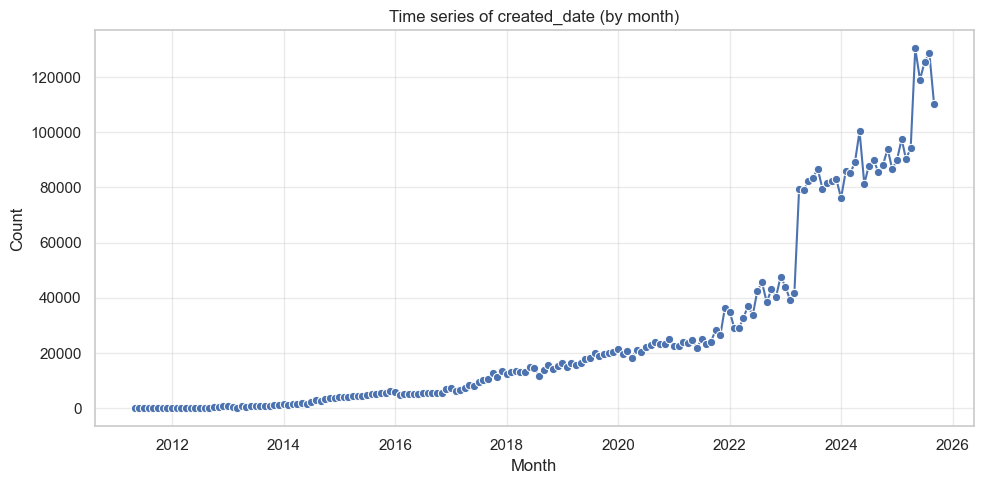


Statistics for updated_date:
shape: (9, 2)
┌────────────┬────────────────────────────┐
│ statistic  ┆ updated_date               │
│ ---        ┆ ---                        │
│ str        ┆ str                        │
╞════════════╪════════════════════════════╡
│ count      ┆ 4573964                    │
│ null_count ┆ 0                          │
│ mean       ┆ 2025-06-11 05:52:40.770554 │
│ std        ┆ null                       │
│ min        ┆ 2019-06-30 08:38:47.100000 │
│ 25%        ┆ 2025-07-07 15:33:10.201316 │
│ 50%        ┆ 2025-07-07 15:33:10.201316 │
│ 75%        ┆ 2025-08-02 10:54:03.860000 │
│ max        ┆ 2025-09-30 23:22:08.957000 │
└────────────┴────────────────────────────┘


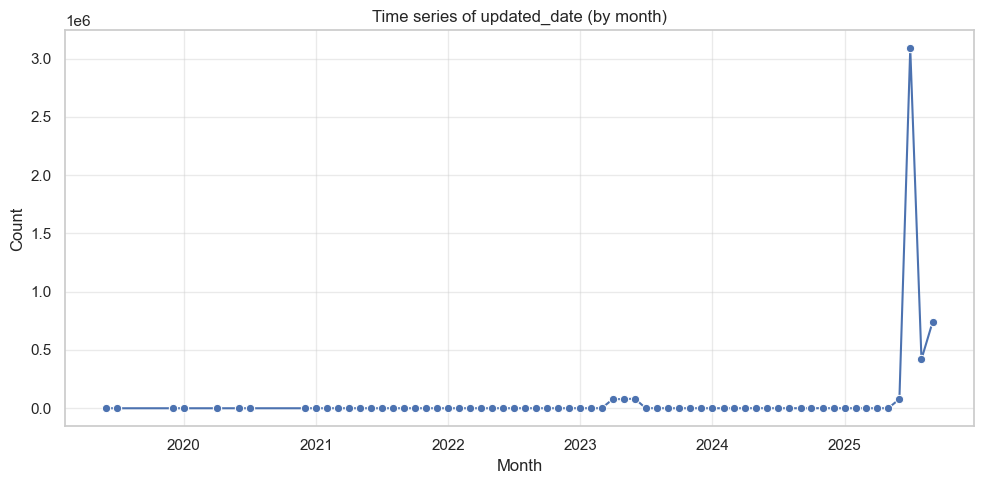


Statistics for last_sync_date:
shape: (9, 2)
┌────────────┬────────────────────────────┐
│ statistic  ┆ last_sync_date             │
│ ---        ┆ ---                        │
│ str        ┆ str                        │
╞════════════╪════════════════════════════╡
│ count      ┆ 4235679                    │
│ null_count ┆ 338285                     │
│ mean       ┆ 2025-07-16 15:20:34.188640 │
│ std        ┆ null                       │
│ min        ┆ 2025-07-16 11:54:29.816986 │
│ 25%        ┆ 2025-07-16 11:58:58.022193 │
│ 50%        ┆ 2025-07-16 12:03:34.550186 │
│ 75%        ┆ 2025-07-16 12:11:53.888687 │
│ max        ┆ 2025-07-21 11:19:29.058389 │
└────────────┴────────────────────────────┘


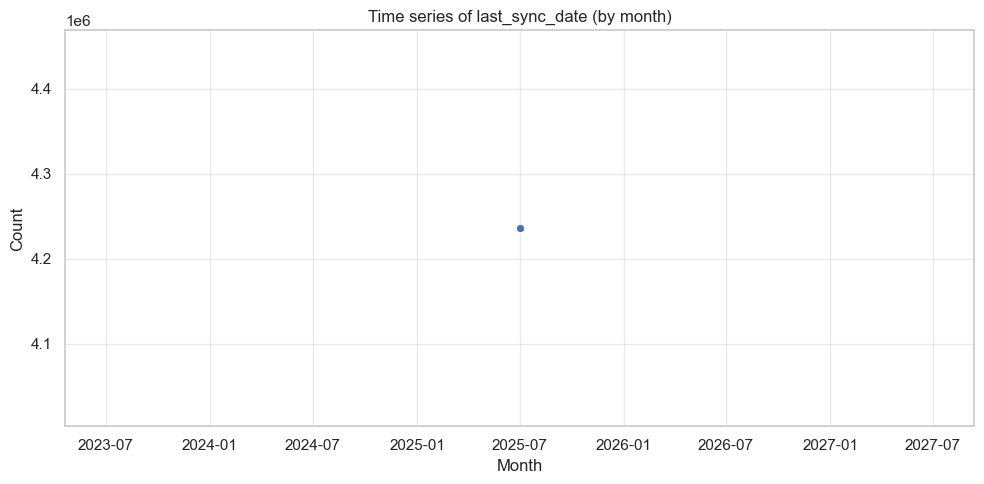


Text stats for sync_error_message:
shape: (9, 2)
┌────────────┬──────┐
│ statistic  ┆ len  │
│ ---        ┆ ---  │
│ str        ┆ f64  │
╞════════════╪══════╡
│ count      ┆ 0.0  │
│ null_count ┆ 0.0  │
│ mean       ┆ null │
│ std        ┆ null │
│ min        ┆ null │
│ 25%        ┆ null │
│ 50%        ┆ null │
│ 75%        ┆ null │
│ max        ┆ null │
└────────────┴──────┘

Text stats for location_name:
shape: (9, 2)
┌────────────┬────────────┐
│ statistic  ┆ len        │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 4.573964e6 │
│ null_count ┆ 0.0        │
│ mean       ┆ 22.374774  │
│ std        ┆ 4.622569   │
│ min        ┆ 10.0       │
│ 25%        ┆ 20.0       │
│ 50%        ┆ 22.0       │
│ 75%        ┆ 25.0       │
│ max        ┆ 55.0       │
└────────────┴────────────┘


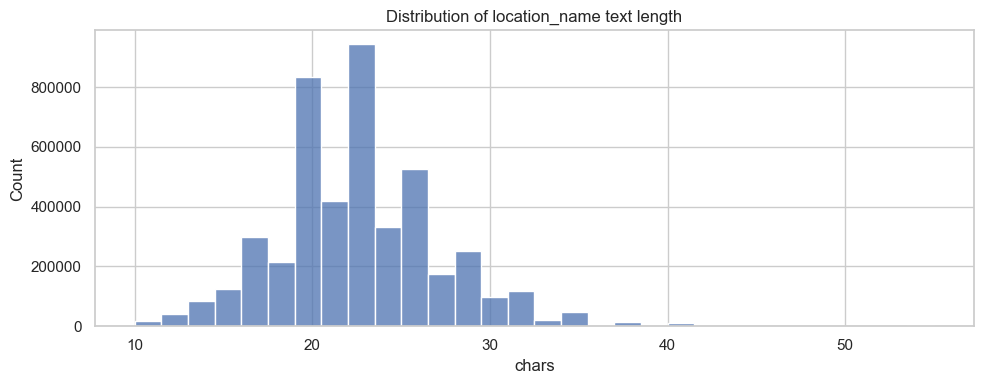


Text stats for membership:
shape: (9, 2)
┌────────────┬────────────┐
│ statistic  ┆ len        │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 4.573964e6 │
│ null_count ┆ 0.0        │
│ mean       ┆ 7.760265   │
│ std        ┆ 0.922887   │
│ min        ┆ 4.0        │
│ 25%        ┆ 8.0        │
│ 50%        ┆ 8.0        │
│ 75%        ┆ 8.0        │
│ max        ┆ 8.0        │
└────────────┴────────────┘


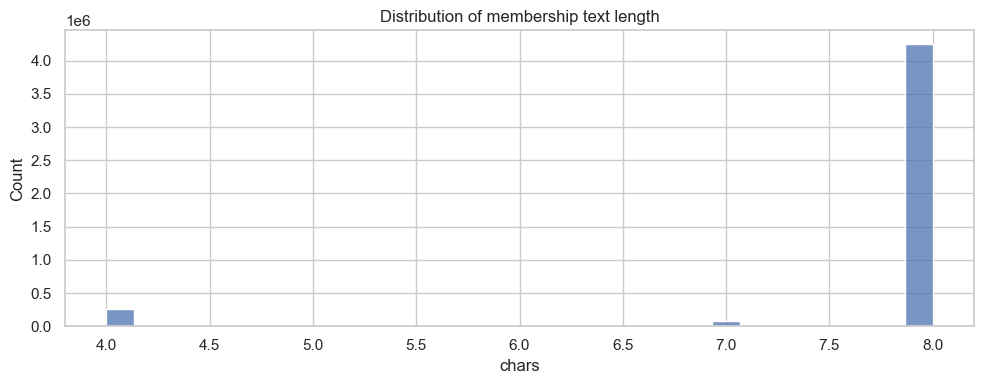


Top columns by null %:
                    null_count  pct_null
sync_error_message     4573964  1.000000
last_sync_date          338285  0.073959
sync_status_id          338285  0.073959
user_id                      0  0.000000
district                     0  0.000000
install_date                 0  0.000000
install_app                  0  0.000000
location_name                0  0.000000
region                       0  0.000000
customer_id                  0  0.000000
gender                       0  0.000000
updated_date                 0  0.000000
created_date                 0  0.000000
timestamp                    0  0.000000
membership                   0  0.000000
province                     0  0.000000
location                     0  0.000000
is_deleted                   0  0.000000


In [39]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# ============================================
# 1️⃣ THÔNG TIN CHUNG
# ============================================

print("Schema:")
print(df_user.schema)
print(f"Rows: {df_user.height:,}, Columns: {df_user.width}")

print("\nFirst 5 rows:")
print(df_user.head(5))

# Null counts (one-row dataframe)
null_counts = df_user.select([pl.col(c).null_count().alias(c) for c in df_user.columns])
print("\nNull counts:")
print(null_counts)

# Unique / duplicates
if "user_id" in df_user.columns:
    print("\nUnique user_id:")
    print(df_user.select(pl.col("user_id").n_unique()))

    dups = (
        df_user
        .group_by("user_id")
        .agg(pl.len().alias("count"))
        .filter(pl.col("count") > 1)
    )
    print(f"\nDuplicate user_id count: {dups.height}")
    if dups.height:
        print(dups.head(5))

# ============================================
# 2️⃣ HÀM PHỤ TRỢ
# ============================================

def top_n_cat(df, col, n=10):
    stats = (
        df
        .group_by(col)
        .agg(pl.len().alias("count"))
        .sort("count", descending=True)
        .head(n)
    )
    print(f"\nTop {n} for {col}:")
    print(stats)
    return stats


def truncate_label(s, max_len=20):
    if s is None:
        return ""
    s = str(s)
    return s if len(s) <= max_len else s[:max_len-3] + "..."

# ============================================
# 3️⃣ PHÂN TÍCH BIẾN PHÂN LOẠI (CATEGORICAL)
# ============================================

cat_cols = [
    "gender", "location", "province", "membership",
    "sync_status_id", "sync_error_message", "region",
    "location_name", "install_app", "district", "is_deleted", "install_date"
]

for c in cat_cols:
    if c in df_user.columns:
        stats = top_n_cat(df_user, c, n=10).to_pandas()
        stats[c] = stats[c].apply(lambda x: truncate_label(x, max_len=20))

        plt.figure(figsize=(10, 5))
        sns.barplot(x=c, y="count", data=stats, palette="viridis")
        plt.title(f"Top 10 {c}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# ============================================
# 4️⃣ PHÂN TÍCH BIẾN SỐ (NUMERIC)
# ============================================

num_cols = ["customer_id", "location", "sync_status_id", "install_date", "timestamp"]
for col in num_cols:
    if col in df_user.columns:
        print(f"\nSummary for {col}:")
        try:
            print(df_user.select(pl.col(col).cast(pl.Float64)).describe())
        except Exception:
            print(df_user.select(pl.col(col)).describe())

# ============================================
# 5️⃣ PHÂN TÍCH DỮ LIỆU THỜI GIAN
# ============================================

time_cols = ["created_date", "updated_date", "last_sync_date"]
for tcol in time_cols:
    if tcol in df_user.columns:
        print(f"\nStatistics for {tcol}:")
        print(df_user.select(tcol).describe())

        trend = (
            df_user
            .with_columns(pl.col(tcol).dt.strftime("%Y-%m").alias("year_month"))
            .group_by("year_month")
            .agg(pl.len().alias("count"))
            .sort("year_month")
        )

        trend_pd = trend.to_pandas()
        if not trend_pd.empty:
            trend_pd["year_month"] = pd.to_datetime(trend_pd["year_month"])
            plt.figure(figsize=(10, 5))
            sns.lineplot(data=trend_pd, x="year_month", y="count", marker="o")
            plt.title(f"Time series of {tcol} (by month)")
            plt.xlabel("Month")
            plt.ylabel("Count")
            plt.grid(alpha=0.4)
            plt.tight_layout()
            plt.show()

# ============================================
# 6️⃣ PHÂN TÍCH TEXT FIELD (NẾU CÓ)
# ============================================

text_cols = ["sync_error_message", "location_name", "membership"]
for col in text_cols:
    if col in df_user.columns:
        print(f"\nText stats for {col}:")
        lens_df = (
            df_user
            .select(pl.col(col).str.len_chars().alias("len"))
            .filter(pl.col("len").is_not_null())
        )
        print(lens_df.describe())

        s = lens_df["len"].to_list()
        if len(s) > 0:
            plt.figure(figsize=(10,4))
            sns.histplot(s, bins=30)
            plt.title(f"Distribution of {col} text length")
            plt.xlabel("chars")
            plt.tight_layout()
            plt.show()

# ============================================
# 7️⃣ BÁO CÁO MISSING VALUES
# ============================================

nulls_row = null_counts.to_pandas().T
nulls_row.columns = ["null_count"]
nulls_row["pct_null"] = nulls_row["null_count"] / df_user.height
nulls_row = nulls_row.sort_values("pct_null", ascending=False).head(18)
print("\nTop columns by null %:")
print(nulls_row)

### Code cũ


Statistics for customer_id:
shape: (9, 2)
┌────────────┬────────────┐
│ statistic  ┆ value      │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 4.573964e6 │
│ null_count ┆ 0.0        │
│ mean       ┆ 6.1266e6   │
│ std        ┆ 2.4412e6   │
│ min        ┆ 14732.0    │
│ 25%        ┆ 4.53268e6  │
│ 50%        ┆ 6.843955e6 │
│ 75%        ┆ 8.029649e6 │
│ max        ┆ 9.264159e6 │
└────────────┴────────────┘


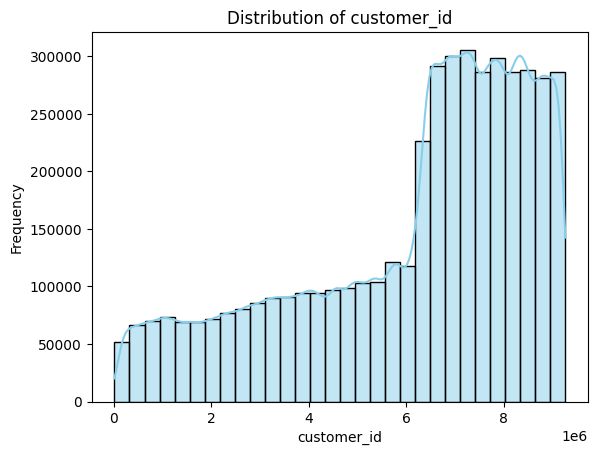

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# EDA cho cột 'customer_id' (biến số)
print("\nStatistics for customer_id:")
print(df_user['customer_id'].describe())
sns.histplot(df_user['customer_id'], kde=True, color="skyblue", bins=30)
plt.title('Distribution of customer_id')
plt.xlabel('customer_id')
plt.ylabel('Frequency')
plt.show()




Statistics for gender:
shape: (3, 2)
┌────────┬─────────┐
│ gender ┆ count   │
│ ---    ┆ ---     │
│ str    ┆ u32     │
╞════════╪═════════╡
│ Khác   ┆ 8       │
│ Nam    ┆ 1149069 │
│ Nữ     ┆ 3424887 │
└────────┴─────────┘


C:\Users\huynh\AppData\Local\Temp\ipykernel_5352\1094603685.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_user, palette="viridis")


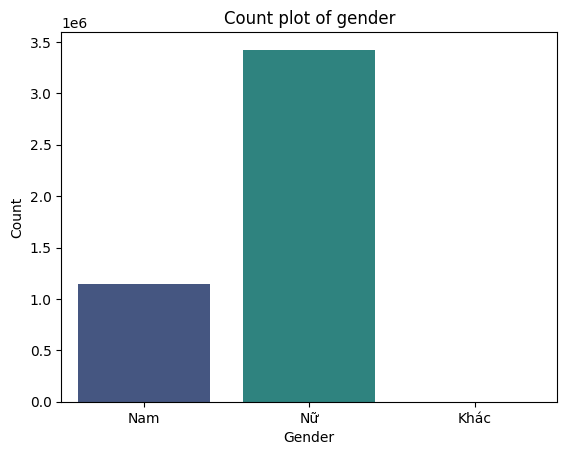

In [30]:
# EDA cho cột 'gender' (biến phân loại)
print("\nStatistics for gender:")
print(df_user['gender'].value_counts())

sns.countplot(x='gender', data=df_user, palette="viridis")
plt.title('Count plot of gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [ ]:

# EDA cho cột 'location' (biến số)
print("\nStatistics for location:")
print(df_user['location'].describe())
sns.histplot(df_user['location'], kde=True, color="skyblue", bins=30)
plt.title('Distribution of location')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()


Statistics for province:
shape: (126, 2)
┌────────────────┬───────┐
│ province       ┆ count │
│ ---            ┆ ---   │
│ str            ┆ u32   │
╞════════════════╪═══════╡
│ Tỉnh Hà Giang  ┆ 11    │
│ Hưng Yên       ┆ 6129  │
│ Hà Giang       ┆ 698   │
│ Tỉnh Đắk Nông  ┆ 67    │
│ Quảng Nam      ┆ 54252 │
│ …              ┆ …     │
│ Lào Cai        ┆ 2834  │
│ Tỉnh Sóc Trăng ┆ 73    │
│ Kiên Giang     ┆ 82819 │
│ Tỉnh Cao Bằng  ┆ 1     │
│ Tỉnh Điện Biên ┆ 2     │
└────────────────┴───────┘


C:\Users\huynh\AppData\Local\Temp\ipykernel_5352\4184980852.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='province', data=df_user, palette="viridis")


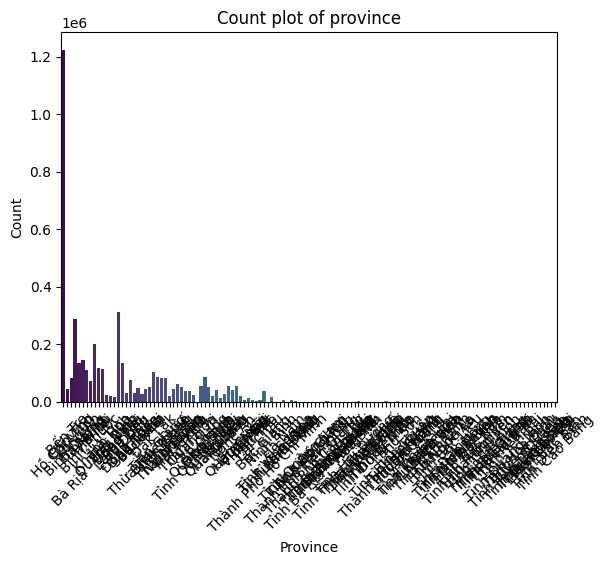

In [31]:
# EDA cho cột 'province' (biến phân loại)
print("\nStatistics for province:")
print(df_user['province'].value_counts())
sns.countplot(x='province', data=df_user, palette="viridis")
plt.title('Count plot of province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




Statistics for membership:
shape: (3, 2)
┌────────────┬─────────┐
│ membership ┆ count   │
│ ---        ┆ ---     │
│ str        ┆ u32     │
╞════════════╪═════════╡
│ Standard   ┆ 4242946 │
│ Gold       ┆ 255173  │
│ Diamond    ┆ 75845   │
└────────────┴─────────┘


C:\Users\huynh\AppData\Local\Temp\ipykernel_5352\1797814143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='membership', data=df_user, palette="viridis")


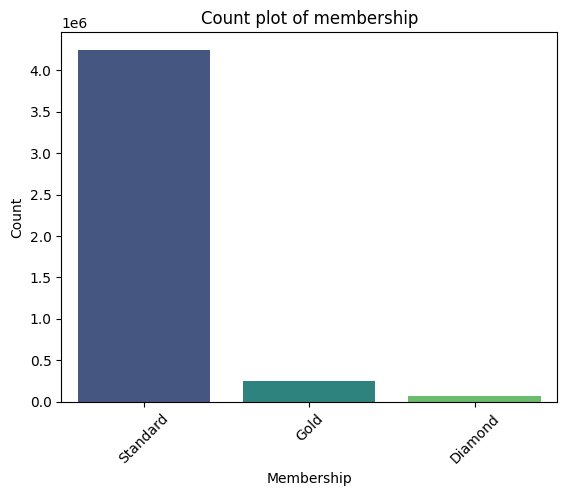

In [32]:
# EDA cho cột 'membership' (biến phân loại)
print("\nStatistics for membership:")
print(df_user['membership'].value_counts())
sns.countplot(x='membership', data=df_user, palette="viridis")
plt.title('Count plot of membership')
plt.xlabel('Membership')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Statistics for timestamp:
shape: (9, 2)
┌────────────┬────────────┐
│ statistic  ┆ value      │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 4.573964e6 │
│ null_count ┆ 0.0        │
│ mean       ┆ 1.6712e9   │
│ std        ┆ 7.9743e7   │
│ min        ┆ 1.3064e9   │
│ 25%        ┆ 1.6343e9   │
│ 50%        ┆ 1.6960e9   │
│ 75%        ┆ 1.7312e9   │
│ max        ┆ 1.7593e9   │
└────────────┴────────────┘


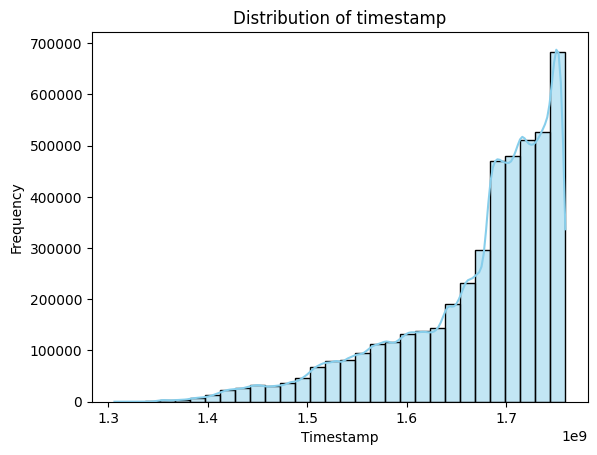

In [33]:

# EDA cho cột 'timestamp' (biến số)
print("\nStatistics for timestamp:")
print(df_user['timestamp'].describe())
sns.histplot(df_user['timestamp'], kde=True, color="skyblue", bins=30)
plt.title('Distribution of timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

In [35]:
# EDA cho cột 'created_date' (biến thời gian)
#print("\nStatistics for created_date:")
#print(df_user['created_date'].describe())
#df_user['created_date'] = pd.to_datetime(df_user['created_date'])
#df_user['created_date'].dt.month.value_counts().sort_index().plot(kind='bar', color="skyblue")
#plt.title('Distribution of created_date (by month)')
#plt.xlabel('Month')
#plt.ylabel('Count')
#plt.show()


In [ ]:

# EDA cho cột 'updated_date' (biến thời gian)
#print("\nStatistics for updated_date:")
#print(df_user['updated_date'].describe())
#df_user['updated_date'] = pd.to_datetime(df_user['updated_date'])
#df_user['updated_date'].dt.month.value_counts().sort_index().plot(kind='bar', color="skyblue")
#plt.title('Distribution of updated_date (by month)')
#plt.xlabel('Month')
#plt.ylabel('Count')
#plt.show()


Statistics for sync_status_id:
shape: (9, 2)
┌────────────┬────────────┐
│ statistic  ┆ value      │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 4.235679e6 │
│ null_count ┆ 338285.0   │
│ mean       ┆ 2.0        │
│ std        ┆ 0.0        │
│ min        ┆ 2.0        │
│ 25%        ┆ 2.0        │
│ 50%        ┆ 2.0        │
│ 75%        ┆ 2.0        │
│ max        ┆ 2.0        │
└────────────┴────────────┘


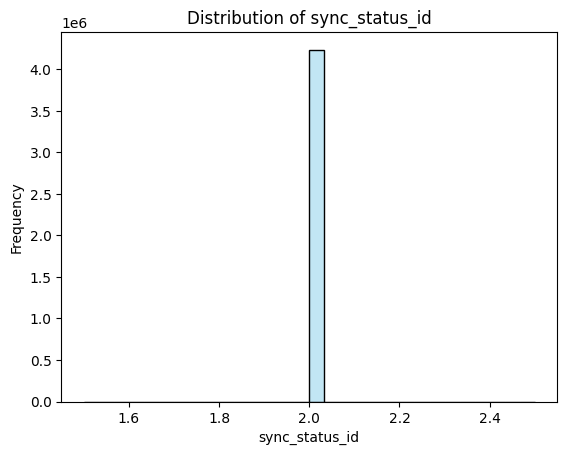

In [36]:
# EDA cho cột 'sync_status_id' (biến số)
print("\nStatistics for sync_status_id:")
print(df_user['sync_status_id'].describe())
sns.histplot(df_user['sync_status_id'], kde=True, color="skyblue", bins=30)
plt.title('Distribution of sync_status_id')
plt.xlabel('sync_status_id')
plt.ylabel('Frequency')
plt.show()


In [39]:
# EDA cho cột 'last_sync_date' (biến thời gian)
#print("\nStatistics for last_sync_date:")
#print(df_user['last_sync_date'].describe())
#df_user['last_sync_date'] = pd.to_datetime(df_user['last_sync_date'])
#df_user['last_sync_date'].dt.month.value_counts().sort_index().plot(kind='bar', color="skyblue")
#plt.title('Distribution of last_sync_date (by month)')
#plt.xlabel('Month')
#plt.ylabel('Count')
#plt.show()

In [43]:
# EDA cho cột 'sync_error_message' (biến phân loại)
#print("\nStatistics for sync_error_message:")
#print(df_user['sync_error_message'].value_counts())
#sns.countplot(x='sync_error_message', data=df_user, palette="viridis")
#plt.title('Count plot of sync_error_message')
#plt.xlabel('Sync Error Message')
#plt.ylabel('Count')
#plt.xticks(rotation=45)
#plt.show()


Statistics for region:
shape: (8, 2)
┌───────────────────────────────┬─────────┐
│ region                        ┆ count   │
│ ---                           ┆ ---     │
│ str                           ┆ u32     │
╞═══════════════════════════════╪═════════╡
│ Đông Nam Bộ                   ┆ 2126066 │
│ Trung du và miền núi phía Bắc ┆ 105336  │
│ Tây Nguyên                    ┆ 333463  │
│ Duyên hải Nam Trung Bộ        ┆ 577306  │
│ Duyên hải Bắc Bộ              ┆ 4383    │
│ Bắc Trung Bộ                  ┆ 217869  │
│ Đồng bằng sông Cửu Long       ┆ 847970  │
│ Đồng bằng sông Hồng           ┆ 361571  │
└───────────────────────────────┴─────────┘


C:\Users\huynh\AppData\Local\Temp\ipykernel_5352\2292953661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df_user, palette="viridis")


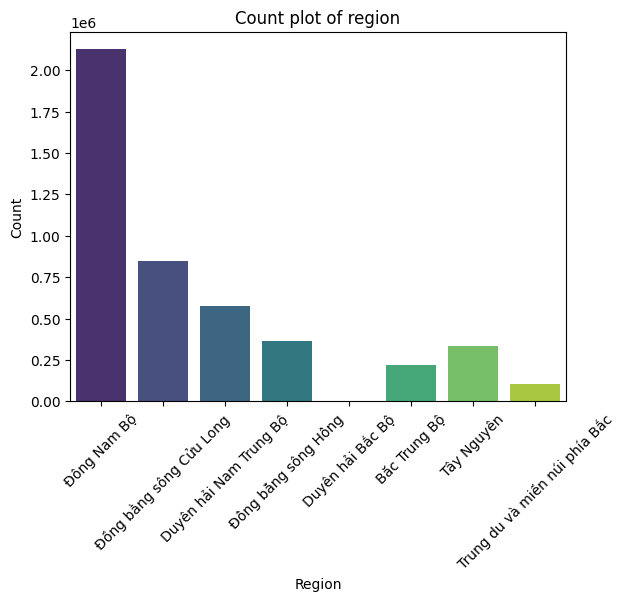

In [41]:
# EDA cho cột 'region' (biến phân loại)
print("\nStatistics for region:")
print(df_user['region'].value_counts())
sns.countplot(x='region', data=df_user, palette="viridis")
plt.title('Count plot of region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Statistics for location_name:
shape: (995, 2)
┌─────────────────────────────────┬───────┐
│ location_name                   ┆ count │
│ ---                             ┆ ---   │
│ str                             ┆ u32   │
╞═════════════════════════════════╪═══════╡
│ HCM - 45 Nguyễn Hữu Trí         ┆ 4748  │
│ HCM - A009 120-120B Ngô Tất Tố  ┆ 6437  │
│ ĐTH - 72 Quốc Lộ 80             ┆ 1043  │
│ HNI - SO-02-T7 Vinhomes Times … ┆ 8383  │
│ HCM - 54 Hồ Học Lãm             ┆ 2808  │
│ …                               ┆ …     │
│ BDU - Chợ Phú Chánh A           ┆ 8364  │
│ BDU - 03-05 Tự Do               ┆ 4792  │
│ BNI - Khu Phố Công Hà           ┆ 1798  │
│ BDU - 1/2 Phú Lợi               ┆ 975   │
│ BTH - 169 Nguyễn Tất Thành      ┆ 518   │
└─────────────────────────────────┴───────┘


C:\Users\huynh\AppData\Local\Temp\ipykernel_5352\1272029942.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='location_name', data=df_user, palette="viridis")


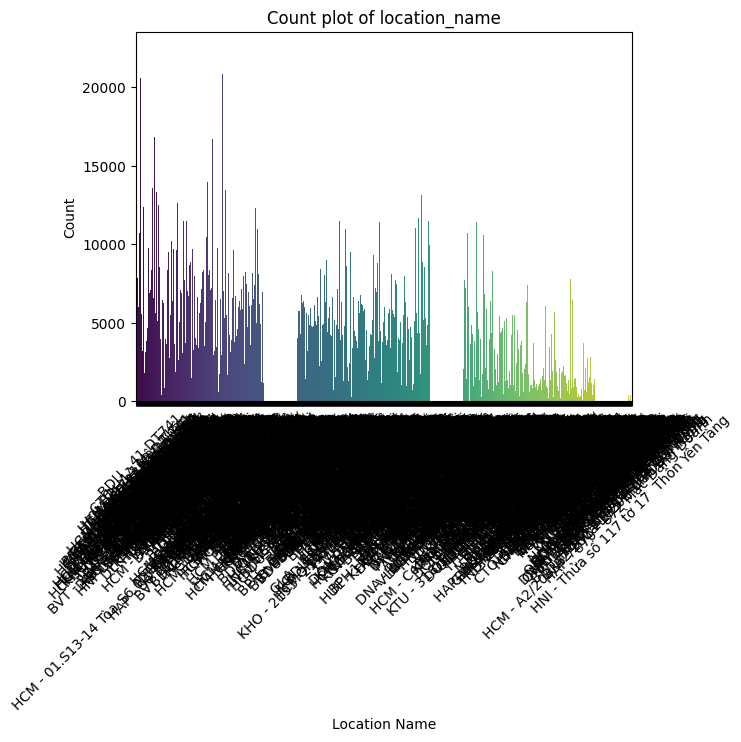

In [ ]:
# EDA cho cột 'location_name' (biến phân loại)
#print("\nStatistics for location_name:")
#print(df_user['location_name'].value_counts())
#sns.countplot(x='location_name', data=df_user, palette="viridis")
#plt.title('Count plot of location_name')
#plt.xlabel('Location Name')
#plt.ylabel('Count')
#plt.xticks(rotation=45)
#plt.show()


Statistics for install_app:
shape: (11, 2)
┌────────────────┬─────────┐
│ install_app    ┆ count   │
│ ---            ┆ ---     │
│ str            ┆ u32     │
╞════════════════╪═════════╡
│ Không xác định ┆ 5       │
│ Chat           ┆ 1727    │
│ Call           ┆ 10584   │
│ iOS            ┆ 127882  │
│ Web            ┆ 35876   │
│ …              ┆ …       │
│ SPE            ┆ 347908  │
│ In-Store       ┆ 3942000 │
│ Wholesale      ┆ 38      │
│ Android        ┆ 91951   │
│ LZD            ┆ 1       │
└────────────────┴─────────┘


C:\Users\huynh\AppData\Local\Temp\ipykernel_5352\970632732.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='install_app', data=df_user, palette="viridis")


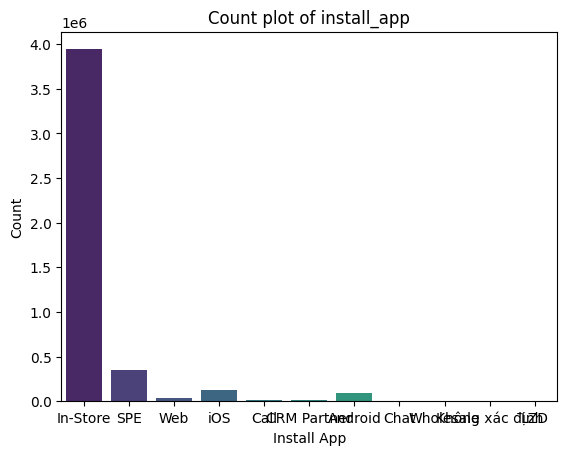

In [44]:
# EDA cho cột 'install_app' (biến phân loại)
print("\nStatistics for install_app:")
print(df_user['install_app'].value_counts())
sns.countplot(x='install_app', data=df_user, palette="viridis")
plt.title('Count plot of install_app')
plt.xlabel('Install App')
plt.ylabel('Count')
plt.show()

In [46]:
# EDA cho cột 'install_date' (biến thời gian)
#print("\nStatistics for install_date:")
#print(df_user['install_date'].describe())
#df_user['install_date'] = pd.to_datetime(df_user['install_date'])
#df_user['install_date'].dt.month.value_counts().sort_index().plot(kind='bar', color="skyblue")
#plt.title('Distribution of install_date (by month)')
#plt.xlabel('Month')
#plt.ylabel('Count')
#plt.show()



Statistics for district:
shape: (1_339, 2)
┌──────────────────┬───────┐
│ district         ┆ count │
│ ---              ┆ ---   │
│ str              ┆ u32   │
╞══════════════════╪═══════╡
│ Đạ Tẻh           ┆ 5394  │
│ Kỳ Anh           ┆ 714   │
│ Hồng Lĩnh        ┆ 1225  │
│ Thành phố Từ Sơn ┆ 11    │
│ Huyện Vĩnh Lộc   ┆ 1     │
│ …                ┆ …     │
│ Bình Minh        ┆ 8845  │
│ Vinh             ┆ 28349 │
│ Mỹ Đức           ┆ 1818  │
│ Thạch Thành      ┆ 245   │
│ Đình Lập         ┆ 35    │
└──────────────────┴───────┘


C:\Users\huynh\AppData\Local\Temp\ipykernel_5352\2235651155.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='district', data=df_user, palette="viridis")


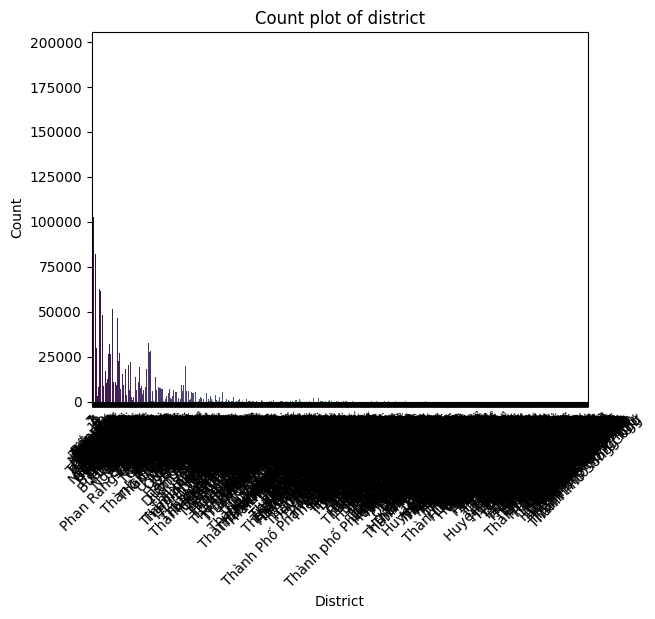

In [47]:
# EDA cho cột 'district' (biến phân loại)
print("\nStatistics for district:")
print(df_user['district'].value_counts())
sns.countplot(x='district', data=df_user, palette="viridis")
plt.title('Count plot of district')
plt.xlabel('District')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [1]:
# EDA cho cột 'user_id' (biến số)
#print("\nStatistics for user_id:")
#print(df_user['user_id'].describe())
#sns.histplot(df_user['user_id'], kde=True, color="skyblue", bins=30)
#plt.title('Distribution of user_id')
#plt.xlabel('User ID')
#plt.ylabel('Frequency')
#plt.show()


Statistics for is_deleted:
shape: (1, 2)
┌────────────┬─────────┐
│ is_deleted ┆ count   │
│ ---        ┆ ---     │
│ bool       ┆ u32     │
╞════════════╪═════════╡
│ false      ┆ 4573964 │
└────────────┴─────────┘


C:\Users\huynh\AppData\Local\Temp\ipykernel_8036\1626837964.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_deleted', data=df_user, palette="viridis")


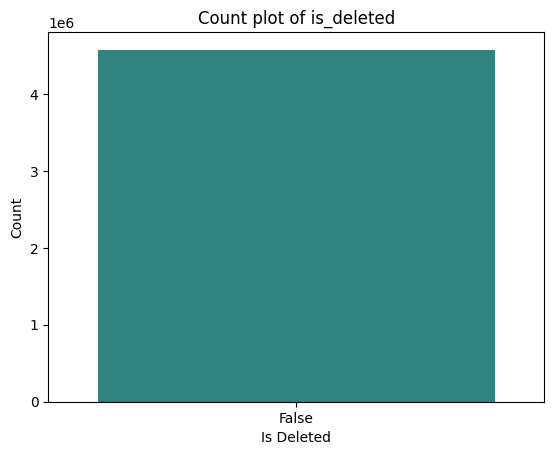

In [6]:
# EDA cho cột 'is_deleted' (biến phân loại)
print("\nStatistics for is_deleted:")
print(df_user['is_deleted'].value_counts())
sns.countplot(x='is_deleted', data=df_user, palette="viridis")
plt.title('Count plot of is_deleted')
plt.xlabel('Is Deleted')
plt.ylabel('Count')
plt.show()

In [17]:
print("Purchase History Chunk DataFrame:")
df_purchase.head()

Purchase History Chunk DataFrame:


timestamp,user_id,item_id,event_type,event_value,price,date_key,quantity,customer_id,created_date,updated_date,channel,payment,location,discount,is_deleted
i64,str,str,str,"decimal[38,4]","decimal[38,4]",i32,i32,i32,datetime[μs],datetime[μs],str,str,i32,"decimal[38,4]",bool
1735064221,"""ca12702ddf55acaa9fb767e10faaa6…","""7115000000004""","""Purchase""",1.0000,49000.0000,20241224,1,5254214,2024-12-24 18:17:01.027,2024-12-24 18:20:09.453,"""In-Store""","""VietQR""",656,0.0000,false
1735068481,"""54314ce86269f4849f9a4c3fc85d94…","""0029130000030""","""Purchase""",1.0000,69000.0000,20241224,1,7573232,2024-12-24 19:28:01.870,2024-12-24 19:28:01.870,"""In-Store""","""Tiền mặt""",143,0.0000,false
1735069843,"""4799de4022b58689b2b9fb37122479…","""3496000000053""","""Purchase""",2.0000,75000.0000,20241224,2,8187418,2024-12-24 19:50:43.760,2024-12-24 19:50:43.760,"""In-Store""","""MoMo""",213,0.0000,false
1735069779,"""4799de4022b58689b2b9fb37122479…","""2700000000002""","""Purchase""",2.0000,58500.0000,20241224,2,8187418,2024-12-24 19:49:39.223,2024-12-24 19:49:39.223,"""In-Store""","""MoMo""",213,13000.0000,false
1735379373,"""3b2423f730815273dfd6f6220b0c5c…","""0029110000036""","""Purchase""",1.0000,89000.0000,20241228,1,6931560,2024-12-28 09:49:33.780,2024-12-28 10:28:49.413,"""Android""","""MoMo""",590,10000.0000,false


In [18]:
print("Item Chunk DataFrame:")
df_item.head()

Item Chunk DataFrame:


p_id,item_id,price,category_l1_id,category_l1,category_l2_id,category_l2,category_l3_id,category_l3,category_id,category,description,brand,manufacturer,creation_timestamp,is_deleted,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,image_url,gender_target,age_group,item_type,gp,weight,color,size,origin,volume,material,sale_status,description_new
i32,str,"decimal[38,4]",i32,str,i32,str,i32,str,i32,str,str,str,str,i64,bool,datetime[μs],datetime[μs],i32,datetime[μs],str,str,str,str,str,"decimal[38,4]",f32,str,str,str,str,str,i32,str
17065,"""0502020000004""",99000.0000,1,"""Babycare""",35,"""Bình sữa, phụ kiện""",7050,"""Núm ty""",7058,"""Núm ty Dr Brown""","""Không xác định""","""Dr.Brown's""","""Không xác định""",1333531544,false,2012-04-04 09:25:44.240,2025-08-18 09:59:19.847,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",36828.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Chi tiết sản phẩm …"
72370,"""0010290040150""",69000.0000,3292,"""Thời trang""",3958,"""Cơ cấu hàng cũ""",7007,"""Thời trang bé trai, bé gái cũ""",6987,"""Bộ quần áo bé gái""","""Không xác định""","""Con Cưng""","""Không xác định""",1503046250,false,2017-08-18 08:50:50.713,2025-09-18 16:05:42.360,null,null,null,"""Không xác định""","""Bé Gái""","""Từ 3Y""","""Bộ quần áo""",0.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Không xác định"""
31154,"""0008010000015""",45000.0000,351,"""Đồ chơi & Sách""",2033,"""0-1Y""",2118,"""Gặm nướu""",2121,"""Gặm nướu khác""","""- Chất liệu: Sản phẩm được làm…","""Thương hiệu khác""","""Không xác định""",1358501584,false,2013-01-18 09:33:04.260,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",14490.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Chi tiết sản phẩm …"
46123,"""0020010000094""",401000.0000,2222,"""Tã""",2272,"""Merries""",2275,"""Merries""",2276,"""Merries_Sơ Sinh""","""﻿﻿Tã dán Merries size S 82 miế…","""Merries Nhật""","""Không xác định""",1400062039,false,2014-05-14 10:07:19.603,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",59749.0000,null,"""Không xác định""","""Không xác định""","""Nhật Bản, Nhật Bản""","""Không xác định""","""Giấy, bột giấy, vải không dệt,…",0,"""Không xác định"""
46127,"""0020010000098""",401000.0000,2222,"""Tã""",2272,"""Merries""",2275,"""Merries""",2278,"""Merries_Tã Quần""","""﻿﻿﻿Bỉm tã quần Merries size M …","""Merries Nhật""","""Không xác định""",1400062040,false,2014-05-14 10:07:20.370,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",65764.0000,null,"""Không xác định""","""Không xác định""","""Nhật Bản, Nhật Bản""","""Không xác định""","""Giấy, bột giấy, vải không dệt,…",0,"""Không xác định"""


In [19]:
print("User Chunk Columns:")
print(df_user.columns)

User Chunk Columns:
['customer_id', 'gender', 'location', 'province', 'membership', 'timestamp', 'created_date', 'updated_date', 'sync_status_id', 'last_sync_date', 'sync_error_message', 'region', 'location_name', 'install_app', 'install_date', 'district', 'user_id', 'is_deleted']


In [20]:
print("Purchase History Chunk Columns:")
print(df_purchase.columns)

Purchase History Chunk Columns:
['timestamp', 'user_id', 'item_id', 'event_type', 'event_value', 'price', 'date_key', 'quantity', 'customer_id', 'created_date', 'updated_date', 'channel', 'payment', 'location', 'discount', 'is_deleted']


In [21]:
print("Item Chunk Columns:")
print(df_item.columns)

Item Chunk Columns:
['p_id', 'item_id', 'price', 'category_l1_id', 'category_l1', 'category_l2_id', 'category_l2', 'category_l3_id', 'category_l3', 'category_id', 'category', 'description', 'brand', 'manufacturer', 'creation_timestamp', 'is_deleted', 'created_date', 'updated_date', 'sync_status_id', 'last_sync_date', 'sync_error_message', 'image_url', 'gender_target', 'age_group', 'item_type', 'gp', 'weight', 'color', 'size', 'origin', 'volume', 'material', 'sale_status', 'description_new']


## Purchase History Chunk

In [13]:
print("Purchase History Chunk DataFrame:")
df_purchase.head()

Purchase History Chunk DataFrame:


timestamp,user_id,item_id,event_type,event_value,price,date_key,quantity,customer_id,created_date,updated_date,channel,payment,location,discount,is_deleted
i64,str,str,str,"decimal[38,4]","decimal[38,4]",i32,i32,i32,datetime[μs],datetime[μs],str,str,i32,"decimal[38,4]",bool
1735064221,"""ca12702ddf55acaa9fb767e10faaa6…","""7115000000004""","""Purchase""",1.0000,49000.0000,20241224,1,5254214,2024-12-24 18:17:01.027,2024-12-24 18:20:09.453,"""In-Store""","""VietQR""",656,0.0000,false
1735068481,"""54314ce86269f4849f9a4c3fc85d94…","""0029130000030""","""Purchase""",1.0000,69000.0000,20241224,1,7573232,2024-12-24 19:28:01.870,2024-12-24 19:28:01.870,"""In-Store""","""Tiền mặt""",143,0.0000,false
1735069843,"""4799de4022b58689b2b9fb37122479…","""3496000000053""","""Purchase""",2.0000,75000.0000,20241224,2,8187418,2024-12-24 19:50:43.760,2024-12-24 19:50:43.760,"""In-Store""","""MoMo""",213,0.0000,false
1735069779,"""4799de4022b58689b2b9fb37122479…","""2700000000002""","""Purchase""",2.0000,58500.0000,20241224,2,8187418,2024-12-24 19:49:39.223,2024-12-24 19:49:39.223,"""In-Store""","""MoMo""",213,13000.0000,false
1735379373,"""3b2423f730815273dfd6f6220b0c5c…","""0029110000036""","""Purchase""",1.0000,89000.0000,20241228,1,6931560,2024-12-28 09:49:33.780,2024-12-28 10:28:49.413,"""Android""","""MoMo""",590,10000.0000,false


### Statistic and Visualize

In [40]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# --- Basic checks ---
print("Schema:")
print(df_purchase.schema)
print(f"Rows: {df_purchase.height:,}, Columns: {df_purchase.width}")

print("\nFirst 5 rows:")
print(df_purchase.head(5))

# Null counts (one-row dataframe)
null_counts = df_purchase.select([pl.col(c).null_count().alias(c) for c in df_purchase.columns])
print("\nNull counts:")
print(null_counts)

# Unique / duplicates
print("\nUnique user_id:")
print(df_purchase.select(pl.col("user_id").n_unique()))

dups = (
    df_purchase
    .group_by("user_id")
    .agg(pl.len().alias("count"))
    .filter(pl.col("count") > 1)
)
print(f"\nDuplicate user_id count: {dups.height}")
if dups.height:
    print(dups.head(5))

# -------------------------
# Helper small funcs
# -------------------------
def top_n_cat(df, col, n=10):
    stats = (
        df
        .group_by(col)
        .agg(pl.len().alias("count"))
        .sort("count", descending=True)
        .head(n)
    )
    print(f"\nTop {n} for {col}:")
    print(stats)
    return stats


def sample_series_for_plot(df, col, sample_n=200_000):
    nonnull_df = df.select(pl.col(col)).drop_nulls()
    if nonnull_df.height == 0:
        return pd.Series([], dtype=float)
    n = min(sample_n, nonnull_df.height)
    s_pd = nonnull_df.sample(n=n, seed=42).to_pandas()[col]
    return s_pd


def truncate_label(s, max_len=20):
    """Truncate string s to max_len chars, add '...' if truncated"""
    if s is None:
        return ""
    s = str(s)
    return s if len(s) <= max_len else s[:max_len-3] + "..."


# -------------------------
# Categorical overviews
# -------------------------
cat_cols = [
    "user_id", "item_id", "event_type", "channel", "payment",
    "location", "is_deleted"
]

for c in cat_cols:
    if c in df_purchase.columns:
        stats = top_n_cat(df_purchase, c, n=10).to_pandas()

        # Truncate labels
        stats[c] = stats[c].apply(lambda x: truncate_label(x, max_len=20))

        # plot
        plt.figure(figsize=(10, 5))
        sns.barplot(x=c, y="count", data=stats, palette="viridis")
        plt.title(f"Top 10 {c}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


# -------------------------
# Numeric columns
# -------------------------
num_cols = ["event_value", "price", "quantity", "discount"]
for col in num_cols:
    if col in df_purchase.columns:
        print(f"\nSummary for {col}:")
        try:
            print(df_purchase.select(pl.col(col).cast(pl.Float64)).describe())
        except Exception:
            print(df_purchase.select(pl.col(col)).describe())

        s = sample_series_for_plot(df_purchase.with_columns(pl.col(col).cast(pl.Float64)), col)
        if len(s) > 0:
            plt.figure(figsize=(12, 5))
            sns.histplot(s, kde=True, bins=50)
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.tight_layout()
            plt.show()

            plt.figure(figsize=(8, 3))
            sns.boxplot(x=s)
            plt.title(f"Boxplot of {col} (sampled)")
            plt.tight_layout()
            plt.show()


# -------------------------
# Datetime trends
# -------------------------
time_cols = ["created_date", "updated_date", "timestamp"]
for tcol in time_cols:
    if tcol in df_purchase.columns:
        print(f"\nStatistics for {tcol}:")
        print(df_purchase.select(tcol).describe())

        # aggregate by year-month
        trend = (
            df_purchase
            .with_columns(pl.col(tcol).dt.strftime("%Y-%m").alias("year_month"))
            .group_by("year_month")
            .agg(pl.len().alias("count"))
            .sort("year_month")
        )

        trend_pd = trend.to_pandas()
        if not trend_pd.empty:
            trend_pd["year_month"] = pd.to_datetime(trend_pd["year_month"])
            plt.figure(figsize=(12, 5))
            sns.lineplot(data=trend_pd, x="year_month", y="count", marker="o")
            plt.title(f"Time series of {tcol} (by month)")
            plt.xlabel("Month")
            plt.ylabel("Count")
            plt.grid(alpha=0.4)
            plt.tight_layout()
            plt.show()


# -------------------------
# Quick missingness report
# -------------------------
nulls_row = null_counts.to_pandas().T
nulls_row.columns = ["null_count"]
nulls_row["pct_null"] = nulls_row["null_count"] / df_purchase.height
nulls_row = nulls_row.sort_values("pct_null", ascending=False).head(16)
print("\nTop columns by null %:")
print(nulls_row)

Schema:
Schema([('timestamp', Int64), ('user_id', String), ('item_id', String), ('event_type', String), ('event_value', Decimal(precision=38, scale=4)), ('price', Decimal(precision=38, scale=4)), ('date_key', Int32), ('quantity', Int32), ('customer_id', Int32), ('created_date', Datetime(time_unit='us', time_zone=None)), ('updated_date', Datetime(time_unit='us', time_zone=None)), ('channel', String), ('payment', String), ('location', Int32), ('discount', Decimal(precision=38, scale=4)), ('is_deleted', Boolean)])
Rows: 35,729,825, Columns: 16

First 5 rows:
shape: (5, 16)
┌────────────┬───────────┬───────────┬───────────┬───┬──────────┬──────────┬───────────┬───────────┐
│ timestamp  ┆ user_id   ┆ item_id   ┆ event_typ ┆ … ┆ payment  ┆ location ┆ discount  ┆ is_delete │
│ ---        ┆ ---       ┆ ---       ┆ e         ┆   ┆ ---      ┆ ---      ┆ ---       ┆ d         │
│ i64        ┆ str       ┆ str       ┆ ---       ┆   ┆ str      ┆ i32      ┆ decimal[3 ┆ ---       │
│            ┆     

: 

### Code cũ


Statistics for timestamp:
shape: (9, 2)
┌────────────┬─────────────┐
│ statistic  ┆ value       │
│ ---        ┆ ---         │
│ str        ┆ f64         │
╞════════════╪═════════════╡
│ count      ┆ 3.5729825e7 │
│ null_count ┆ 0.0         │
│ mean       ┆ 1.7199e9    │
│ std        ┆ 9.1568e6    │
│ min        ┆ 1.7041e9    │
│ 25%        ┆ 1.7120e9    │
│ 50%        ┆ 1.7199e9    │
│ 75%        ┆ 1.7279e9    │
│ max        ┆ 1.7357e9    │
└────────────┴─────────────┘


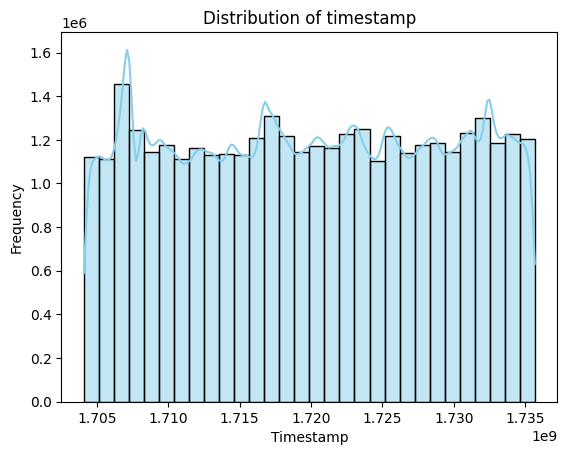

In [14]:
# EDA for 'timestamp' (numeric)
print("\nStatistics for timestamp:")
print(df_purchase['timestamp'].describe())
sns.histplot(df_purchase['timestamp'], kde=True, color="skyblue", bins=30)
plt.title('Distribution of timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.show()

In [23]:
type(df_purchase['user_id'].value_counts())

polars.dataframe.frame.DataFrame


Statistics for user_id (top 10):


C:\Users\T14\AppData\Local\Temp\ipykernel_13036\496523733.py:6: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("count"))


shape: (10, 2)
┌─────────────────────────────────┬───────┐
│ user_id                         ┆ count │
│ ---                             ┆ ---   │
│ str                             ┆ u32   │
╞═════════════════════════════════╪═══════╡
│ 7f1ad828d8fd0bf64642908060fe5c… ┆ 893   │
│ b6d309d61deb6bd8691562b64d629e… ┆ 838   │
│ ec44b0821fc75180c9d7da38ec3095… ┆ 793   │
│ 0c81f44235a594fc21b7836b594785… ┆ 779   │
│ 298e48063d145d09c704170bde7fd9… ┆ 776   │
│ a397ba885dbecb3aa25bd1a86b73c7… ┆ 771   │
│ b7de4d50bfdd7cd9313171e762ce9e… ┆ 748   │
│ af9e01cd280c6e09f99c0a9177c610… ┆ 746   │
│ a2d3b350fb1bebffacb2d80d7d75dc… ┆ 719   │
│ 4a6094488155e6255f7e51fcfffbf8… ┆ 707   │
└─────────────────────────────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_13036\496523733.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


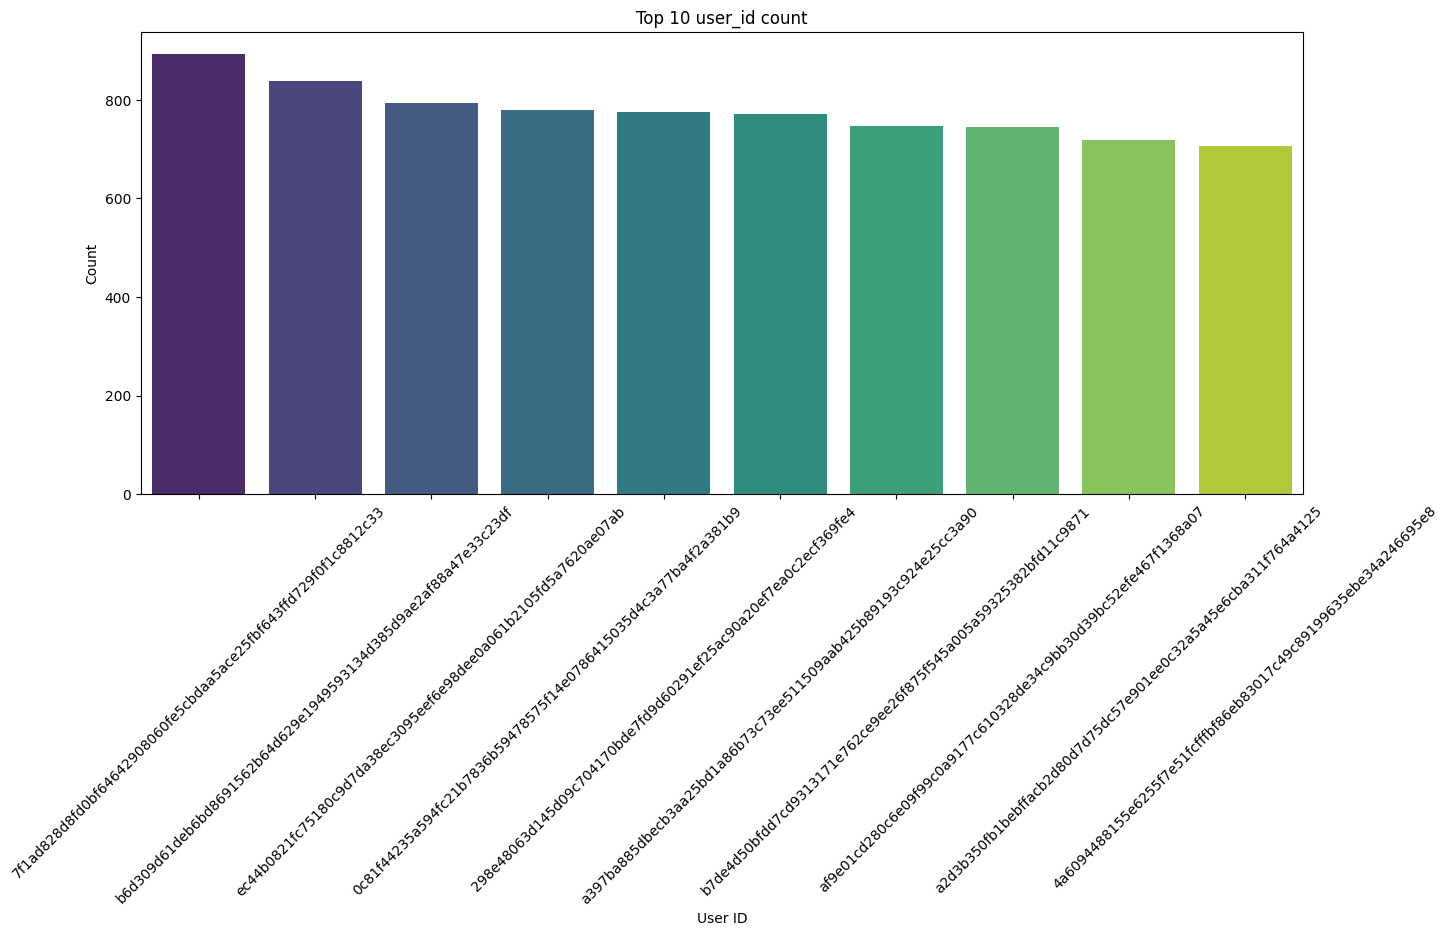

In [27]:
# EDA for 'user_id' (categorical)
print("\nStatistics for user_id (top 10):")
top_10_user_ids = (
    df_purchase
    .group_by("user_id")
    .agg(pl.count().alias("count"))
    .sort(["count", "user_id"], descending=[True, False])  # sắp xếp ổn định
    .head(10)
)

print(top_10_user_ids)

# Change to pandas for visualize
top_10_user_ids_pd = top_10_user_ids.to_pandas()

plt.figure(figsize=(15, 6))
sns.barplot(
    x="user_id",
    y="count",
    data=top_10_user_ids_pd,
    palette="viridis"
)
plt.title("Top 10 user_id count")
plt.xlabel("User ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Statistics for item_id (top 10):
shape: (10, 2)
┌───────────────┬────────┐
│ item_id       ┆ count  │
│ ---           ┆ ---    │
│ str           ┆ u32    │
╞═══════════════╪════════╡
│ 1512000000004 ┆ 302740 │
│ 2803000000013 ┆ 224091 │
│ 0020010000438 ┆ 206507 │
│ 4690000000001 ┆ 197920 │
│ 2803000000011 ┆ 185810 │
│ 5950000000001 ┆ 179824 │
│ 6768000000005 ┆ 157294 │
│ 3773000000004 ┆ 156513 │
│ 6768000000004 ┆ 153043 │
│ 2803000000012 ┆ 151524 │
└───────────────┴────────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_13036\310355125.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


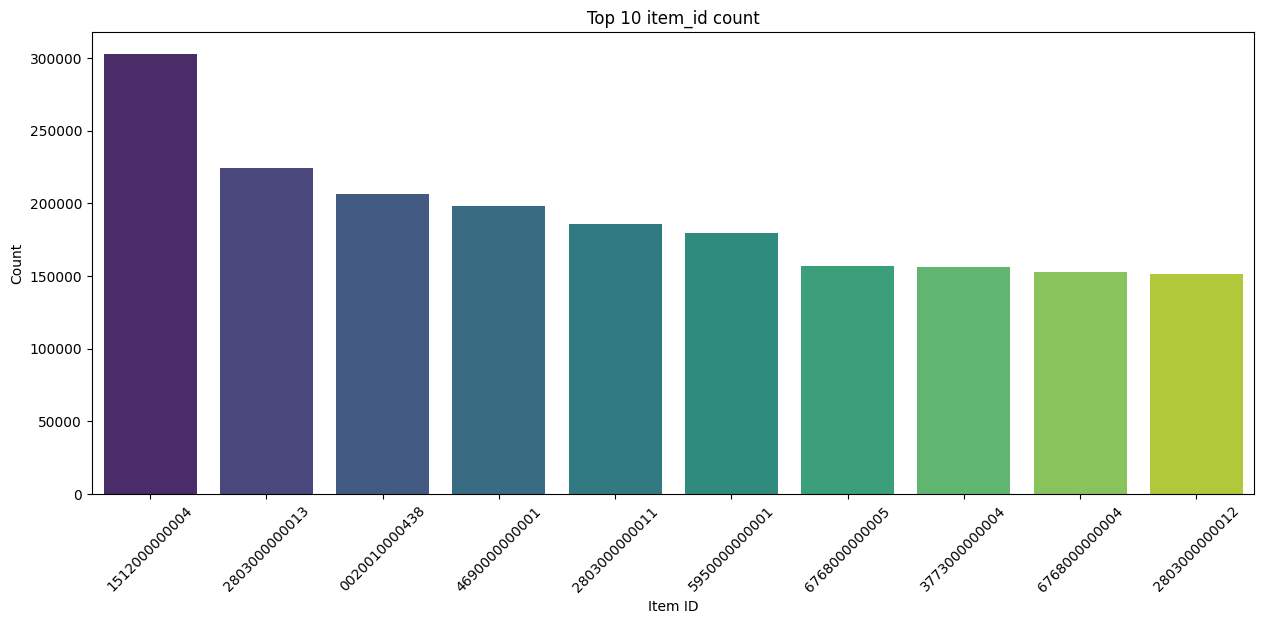

In [ ]:
# EDA for 'item_id' (categorical)
print("\nStatistics for item_id (top 10):")

# Compute top 10 item_id with highest count
top_10_item_ids = (
    df_purchase
    .group_by("item_id")
    .agg(pl.len().alias("count"))  
    .sort(["count", "item_id"], descending=[True, False])  
    .head(10)
)

print(top_10_item_ids)

# Convert to pandas for visualization
top_10_item_ids_pd = top_10_item_ids.to_pandas()

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(
    x="item_id",
    y="count",
    data=top_10_item_ids_pd,
    palette="viridis"
)
plt.title("Top 10 item_id count")
plt.xlabel("Item ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Statistics for event_type:
shape: (1, 2)
┌────────────┬──────────┐
│ event_type ┆ count    │
│ ---        ┆ ---      │
│ str        ┆ u32      │
╞════════════╪══════════╡
│ Purchase   ┆ 35729825 │
└────────────┴──────────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_13036\3863508140.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


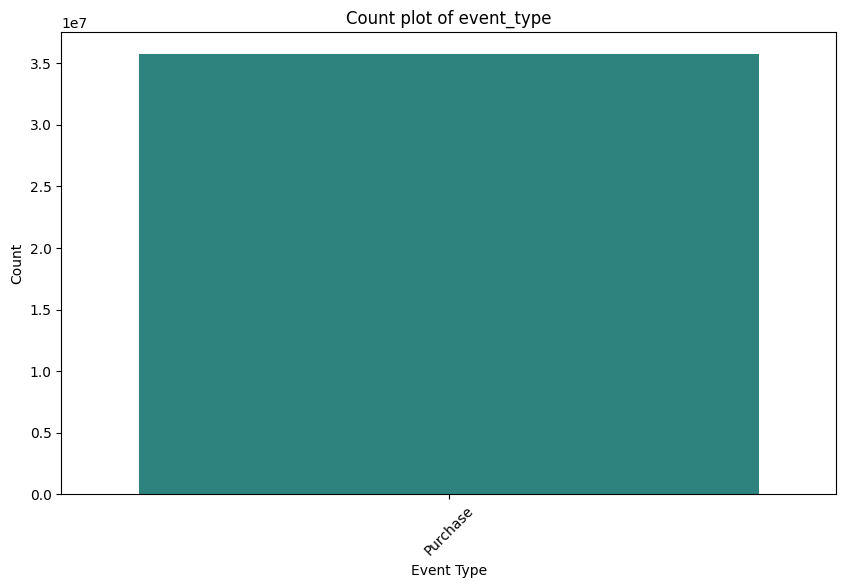

In [29]:
# # EDA for 'event_type' (categorical)
# print("\nStatistics for event_type:")
# print(df_purchase['event_type'].value_counts())
# sns.countplot(x='event_type', data=df_purchase.to_pandas(), palette="viridis")
# plt.title('Count plot of event_type')
# plt.xlabel('Event Type')
# plt.ylabel('Count')
# plt.show()

# EDA for 'event_type' (categorical)
print("\nStatistics for event_type:")

# Compute count per event_type
event_type_stats = (
    df_purchase
    .group_by("event_type")
    .agg(pl.len().alias("count"))  
    .sort(["count", "event_type"], descending=[True, False])  
)

print(event_type_stats)

# Convert to pandas for visualization
event_type_stats_pd = event_type_stats.to_pandas()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x="event_type",
    y="count",
    data=event_type_stats_pd,
    palette="viridis"
)
plt.title("Count plot of event_type")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



Statistics for event_value:
shape: (9, 2)
┌────────────┬─────────────┐
│ statistic  ┆ event_value │
│ ---        ┆ ---         │
│ str        ┆ f64         │
╞════════════╪═════════════╡
│ count      ┆ 3.5729825e7 │
│ null_count ┆ 0.0         │
│ mean       ┆ 1.508098    │
│ std        ┆ 2.264976    │
│ min        ┆ 1.0         │
│ 25%        ┆ 1.0         │
│ 50%        ┆ 1.0         │
│ 75%        ┆ 1.0         │
│ max        ┆ 240.0       │
└────────────┴─────────────┘


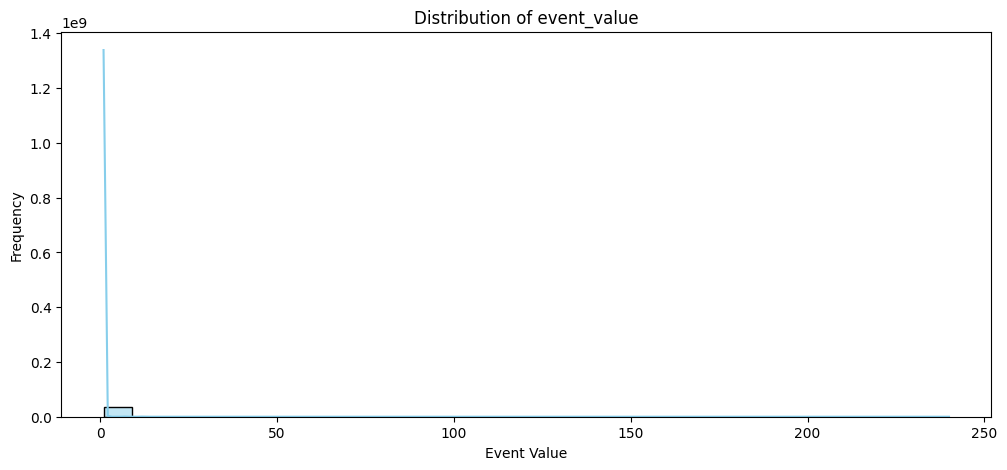

In [31]:
# # EDA for 'event_value' (categorical)
# print("\nStatistics for event_value:")
# print(df_purchase['event_value'].value_counts())
# sns.countplot(x='event_value', data=df_purchase.to_pandas(), palette="viridis")
# plt.title('Count plot of event_value')
# plt.xlabel('Event Value')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.show()

# EDA for 'event_value' (numerical)
print("\nStatistics for event_value:")

# Compute statistical summary
print(df_purchase.select(pl.col("event_value")).describe())

# Convert to pandas for visualization
event_value_pd = df_purchase.select("event_value").to_pandas()

# Plot distribution
plt.figure(figsize=(12, 5))
sns.histplot(event_value_pd["event_value"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of event_value")
plt.xlabel("Event Value")
plt.ylabel("Frequency")
plt.show()


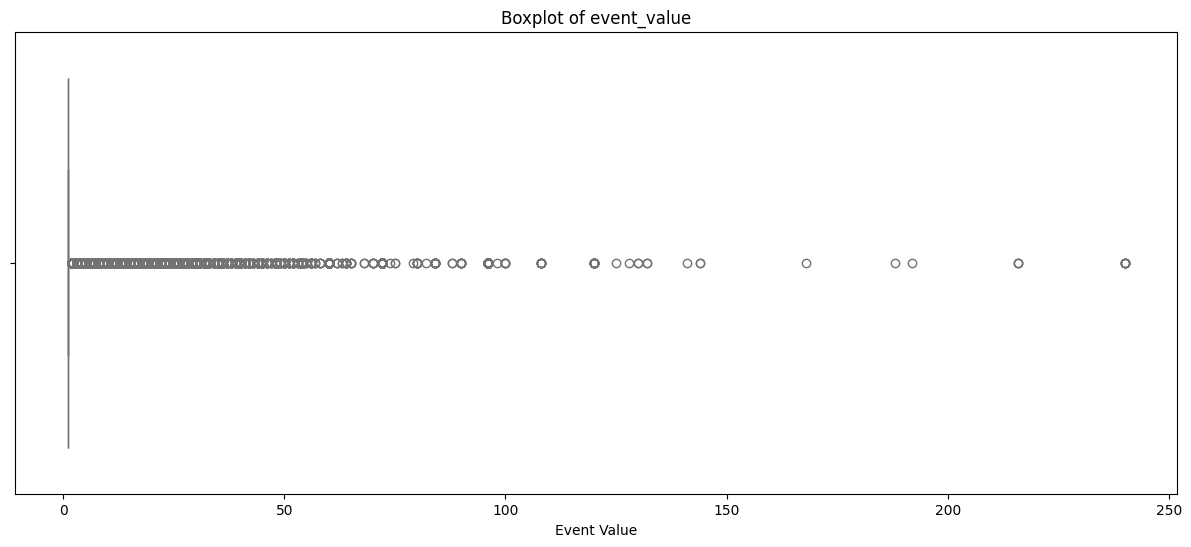

In [32]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=event_value_pd["event_value"], color="lightgreen")
plt.title("Boxplot of event_value")
plt.xlabel("Event Value")
plt.show()


Statistics for price:
shape: (9, 2)
┌────────────┬───────────────┐
│ statistic  ┆ value         │
│ ---        ┆ ---           │
│ str        ┆ f64           │
╞════════════╪═══════════════╡
│ count      ┆ 3.5729825e7   │
│ null_count ┆ 0.0           │
│ mean       ┆ 169188.742494 │
│ std        ┆ 195539.88976  │
│ min        ┆ 0.0444        │
│ 25%        ┆ 48316.3914    │
│ 50%        ┆ 87000.0       │
│ 75%        ┆ 244000.0      │
│ max        ┆ 2.099e7       │
└────────────┴───────────────┘


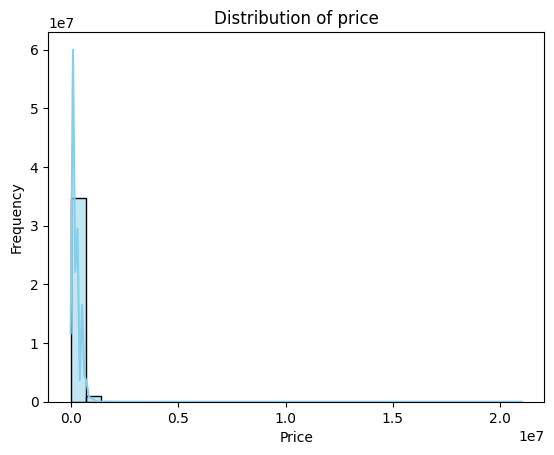

In [33]:
# EDA for 'price' (numeric)
print("\nStatistics for price:")
print(df_purchase['price'].describe())
sns.histplot(df_purchase['price'], kde=True, color="skyblue", bins=30)
plt.title('Distribution of price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

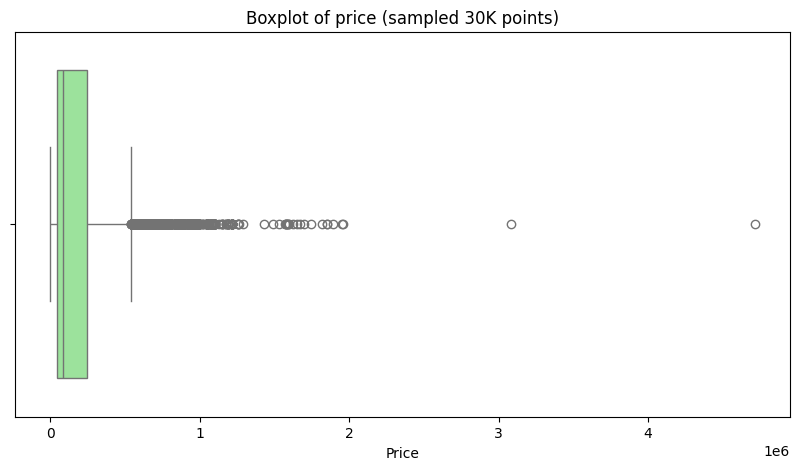

In [38]:
# Convert to pandas for visualization
price_pd = df_purchase.select("price").to_pandas()

# Sample a smaller subset to avoid memory overflow
price_pd_sample = price_pd.sample(n=min(30000, len(price_pd)), random_state=42)

plt.figure(figsize=(10, 5))
sns.boxplot(x=price_pd_sample["price"], color="lightgreen")
plt.title("Boxplot of price (sampled 30K points)")
plt.xlabel("Price")
plt.show()


Statistics for date_key:
shape: (10, 2)
┌──────────┬────────┐
│ date_key ┆ count  │
│ ---      ┆ ---    │
│ i32      ┆ u32    │
╞══════════╪════════╡
│ 20241124 ┆ 197079 │
│ 20240526 ┆ 190225 │
│ 20240208 ┆ 178103 │
│ 20241123 ┆ 177635 │
│ 20240207 ┆ 174685 │
│ 20240525 ┆ 161543 │
│ 20240206 ┆ 157110 │
│ 20240204 ┆ 147508 │
│ 20240601 ┆ 144423 │
│ 20240205 ┆ 142942 │
└──────────┴────────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_10040\3182164525.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


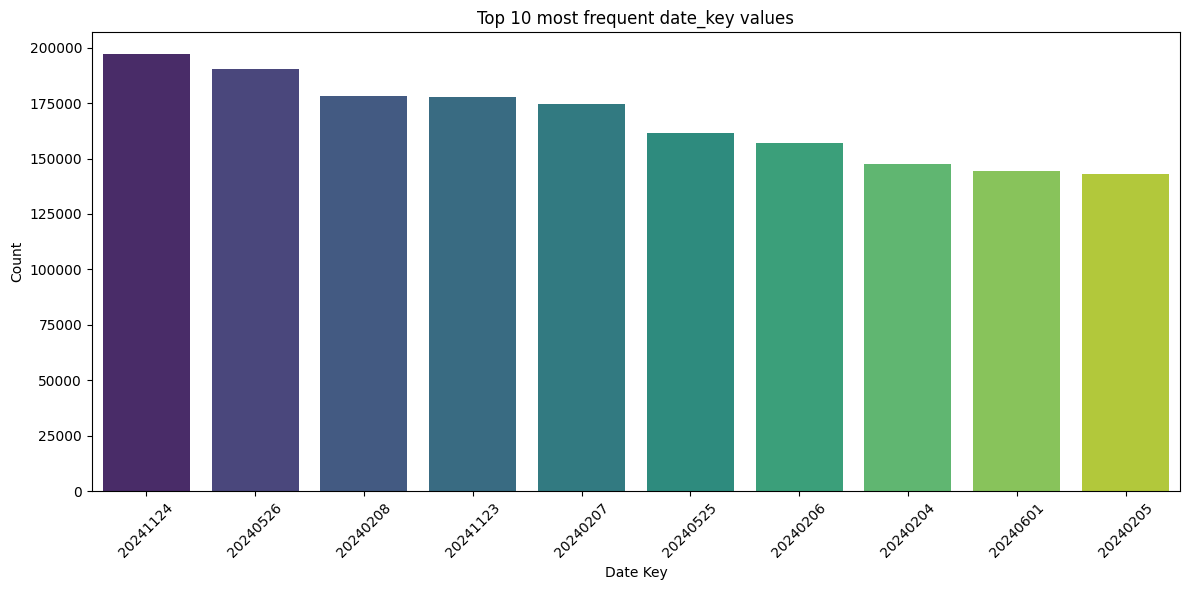

In [11]:
import pandas as pd

# EDA for 'date_key' (categorical/time)
print("\nStatistics for date_key:")

# ✅ Sử dụng Polars để tính tần suất xuất hiện
date_key_stats = (
    df_purchase
    .group_by("date_key")
    .agg(pl.len().alias("count"))  # thay pl.count() bằng pl.len()
    .sort(["count", "date_key"], descending=[True, False])  
    .head(10)  # chỉ lấy top 10
)

print(date_key_stats)

# --- Chuyển sang pandas ---
pdf = date_key_stats.to_pandas()

# 🔧 Ép kiểu category để giữ nguyên thứ tự sắp xếp
pdf["date_key"] = pd.Categorical(pdf["date_key"], categories=pdf["date_key"], ordered=True)

# ✅ Visualize
plt.figure(figsize=(12, 6))
sns.barplot(
    x="date_key",
    y="count",
    data=pdf,
    palette="viridis"
)
plt.title("Top 10 most frequent date_key values")
plt.xlabel("Date Key")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Statistics for quantity:
shape: (9, 2)
┌────────────┬─────────────┐
│ statistic  ┆ quantity    │
│ ---        ┆ ---         │
│ str        ┆ f64         │
╞════════════╪═════════════╡
│ count      ┆ 3.5729825e7 │
│ null_count ┆ 0.0         │
│ mean       ┆ 1.508098    │
│ std        ┆ 2.264976    │
│ min        ┆ 1.0         │
│ 25%        ┆ 1.0         │
│ 50%        ┆ 1.0         │
│ 75%        ┆ 1.0         │
│ max        ┆ 240.0       │
└────────────┴─────────────┘


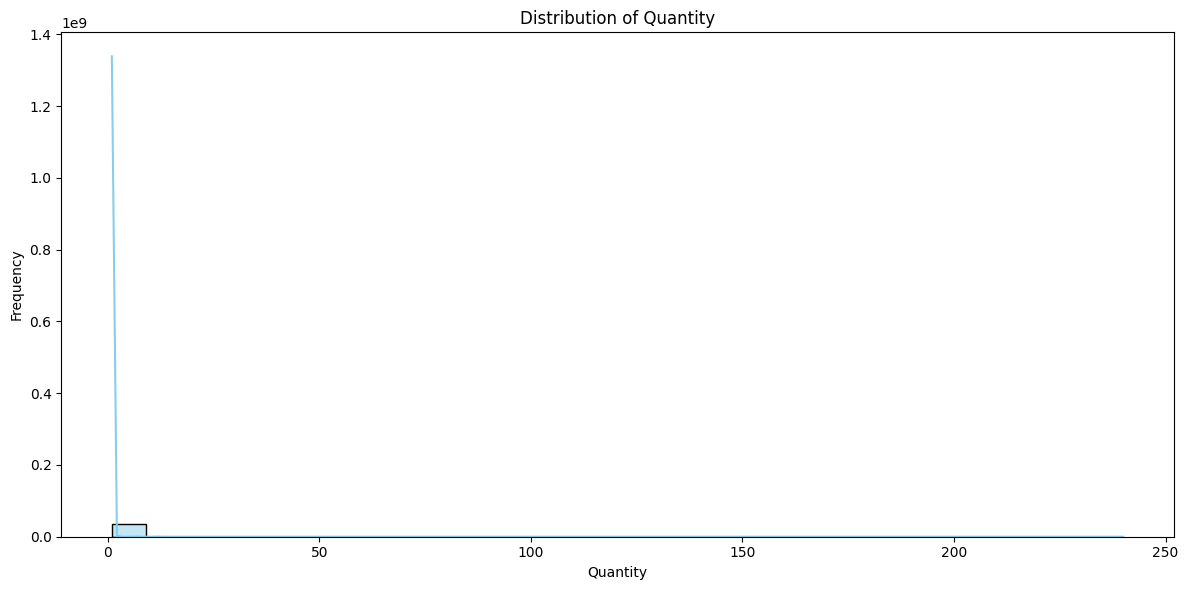

In [12]:
# # EDA for 'quantity' (numeric)
# print("\nStatistics for quantity:")
# print(df_purchase['quantity'].describe())
# sns.histplot(df_purchase['quantity'], kde=True, color="skyblue", bins=30)
# plt.title('Distribution of quantity')
# plt.xlabel('Quantity')
# plt.ylabel('Frequency')
# plt.show()

# EDA for 'quantity' (numeric)
print("\nStatistics for quantity:")
print(df_purchase.select("quantity").describe())

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_purchase.select("quantity").to_pandas(),
    x="quantity",
    kde=True,
    color="skyblue",
    bins=30
)
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

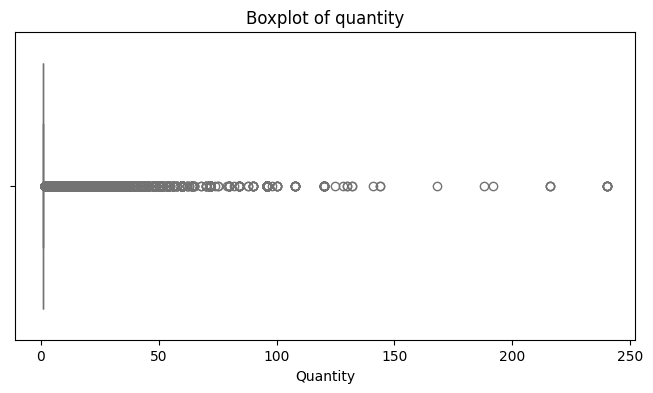

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_purchase.select("quantity").to_pandas()["quantity"], color="lightgreen")
plt.title("Boxplot of quantity")
plt.xlabel("Quantity")
plt.show()


Statistics for customer_id (top 10):
shape: (10, 2)
┌─────────────┬───────┐
│ customer_id ┆ count │
│ ---         ┆ ---   │
│ i32         ┆ u32   │
╞═════════════╪═══════╡
│ 5040968     ┆ 893   │
│ 2383563     ┆ 838   │
│ 2251698     ┆ 793   │
│ 3519532     ┆ 779   │
│ 6338179     ┆ 776   │
│ 5727939     ┆ 771   │
│ 5411435     ┆ 748   │
│ 2354010     ┆ 746   │
│ 6133671     ┆ 719   │
│ 6238193     ┆ 707   │
└─────────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_10040\301692341.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


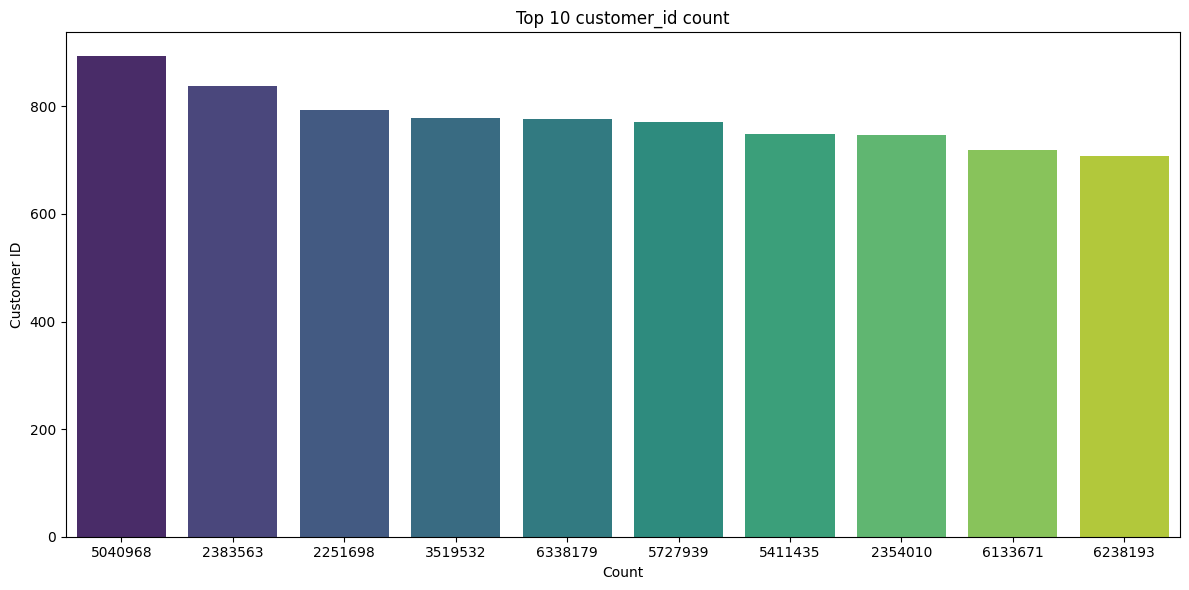

In [21]:
print("\nStatistics for customer_id (top 10):")
top_10_customer = (
    df_purchase
    .group_by("customer_id")
    .agg(pl.len().alias("count"))
    .sort(["count", "customer_id"], descending=[True, False])
    .head(10)
)
print(top_10_customer)

# --- Chuyển sang pandas ---
pdf_customer_id = top_10_customer.to_pandas()

# 🔧 Ép kiểu category để giữ nguyên thứ tự sắp xếp
pdf_customer_id["customer_id"] = pd.Categorical(pdf_customer_id["customer_id"], categories=pdf_customer_id["customer_id"], ordered=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x="customer_id",
    y="count",
    data=pdf_customer_id,
    palette="viridis"
)
plt.title("Top 10 customer_id count")
plt.xlabel("Count")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()


Statistics for created_date:
shape: (9, 2)
┌────────────┬────────────────────────────┐
│ statistic  ┆ created_date               │
│ ---        ┆ ---                        │
│ str        ┆ str                        │
╞════════════╪════════════════════════════╡
│ count      ┆ 35729825                   │
│ null_count ┆ 0                          │
│ mean       ┆ 2024-07-02 17:13:24.220955 │
│ std        ┆ null                       │
│ min        ┆ 2024-01-01 06:44:59.037000 │
│ 25%        ┆ 2024-04-01 16:44:10.513000 │
│ 50%        ┆ 2024-07-02 19:06:52.293000 │
│ 75%        ┆ 2024-10-02 19:55:22.447000 │
│ max        ┆ 2024-12-31 22:35:19.510000 │
└────────────┴────────────────────────────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_10040\3826934797.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


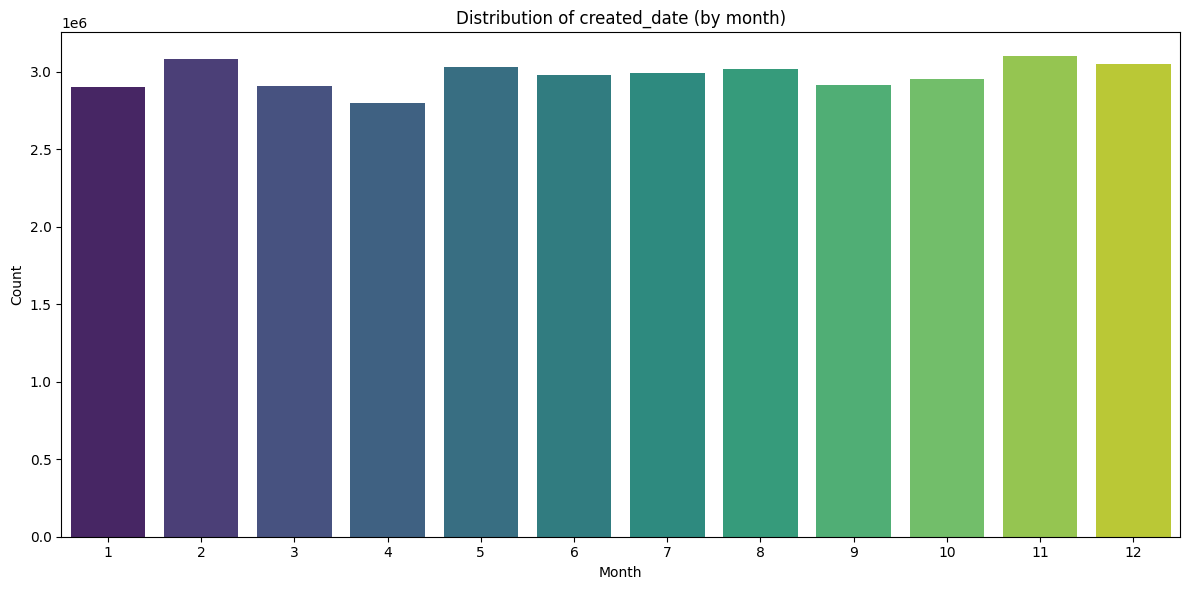

In [23]:
# EDA for 'created_date' (time)
print("\nStatistics for created_date:")

# Polars describe (works directly for datetime)
print(df_purchase.select("created_date").describe())

# Extract month for analysis
created_month = (
    df_purchase
    .with_columns(df_purchase["created_date"].dt.month().alias("month"))
    .group_by("month")
    .agg(pl.len().alias("count"))
    .sort("month")
)

# Convert to pandas for plotting
created_month_pd = created_month.to_pandas()

# Plot distribution by month
plt.figure(figsize=(12, 6))
sns.barplot(
    x="month",
    y="count",
    data=created_month_pd,
    palette="viridis"
)
plt.title("Distribution of created_date (by month)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

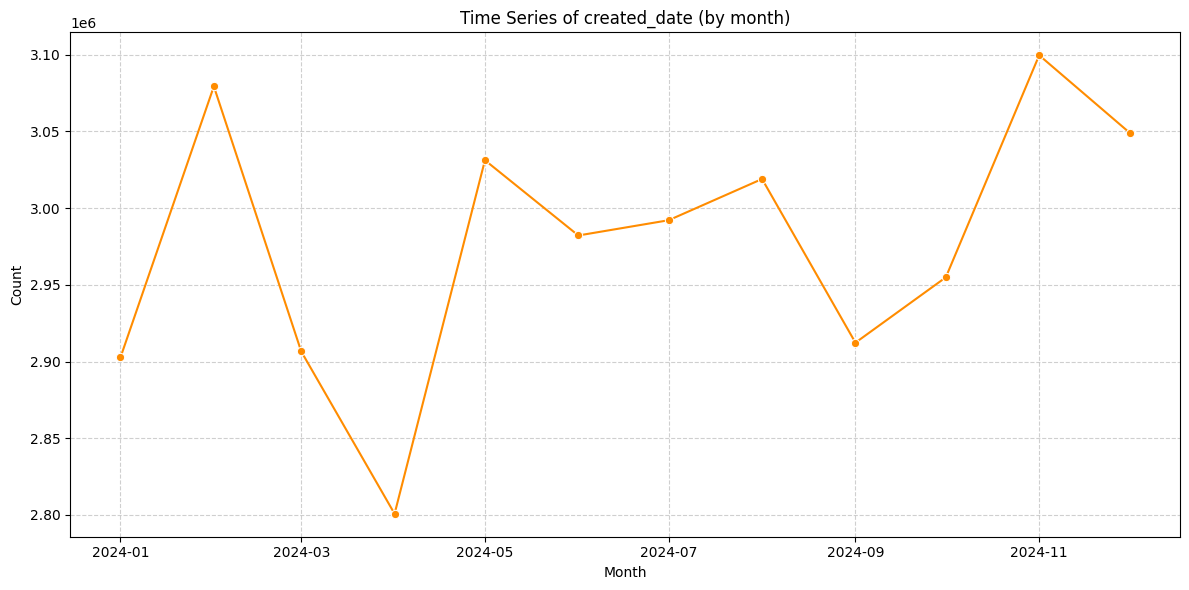

In [28]:
# Tạo cột 'year_month' (dạng chuỗi 'YYYY-MM') cho created_date
created_trend = (
    df_purchase
    .with_columns(df_purchase["created_date"].dt.strftime("%Y-%m").alias("year_month"))
    .group_by("year_month")
    .agg(pl.len().alias("count"))
    .sort("year_month")
)

# Chuyển sang pandas để vẽ
created_trend_pd = created_trend.to_pandas()
created_trend_pd["year_month"] = pd.to_datetime(created_trend_pd["year_month"])

# Vẽ biểu đồ line chart
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=created_trend_pd,
    x="year_month",
    y="count",
    marker="o",
    color="darkorange"
)
plt.title("Time Series of created_date (by month)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Statistics for updated_date:
shape: (9, 2)
┌────────────┬────────────────────────────┐
│ statistic  ┆ updated_date               │
│ ---        ┆ ---                        │
│ str        ┆ str                        │
╞════════════╪════════════════════════════╡
│ count      ┆ 35729825                   │
│ null_count ┆ 0                          │
│ mean       ┆ 2024-07-02 18:27:59.561504 │
│ std        ┆ null                       │
│ min        ┆ 2024-01-01 06:44:59.233000 │
│ 25%        ┆ 2024-04-01 17:15:12.017000 │
│ 50%        ┆ 2024-07-02 19:42:24.550000 │
│ 75%        ┆ 2024-10-02 20:24:53.813000 │
│ max        ┆ 2025-09-27 21:25:22.960000 │
└────────────┴────────────────────────────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_10040\1504882498.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


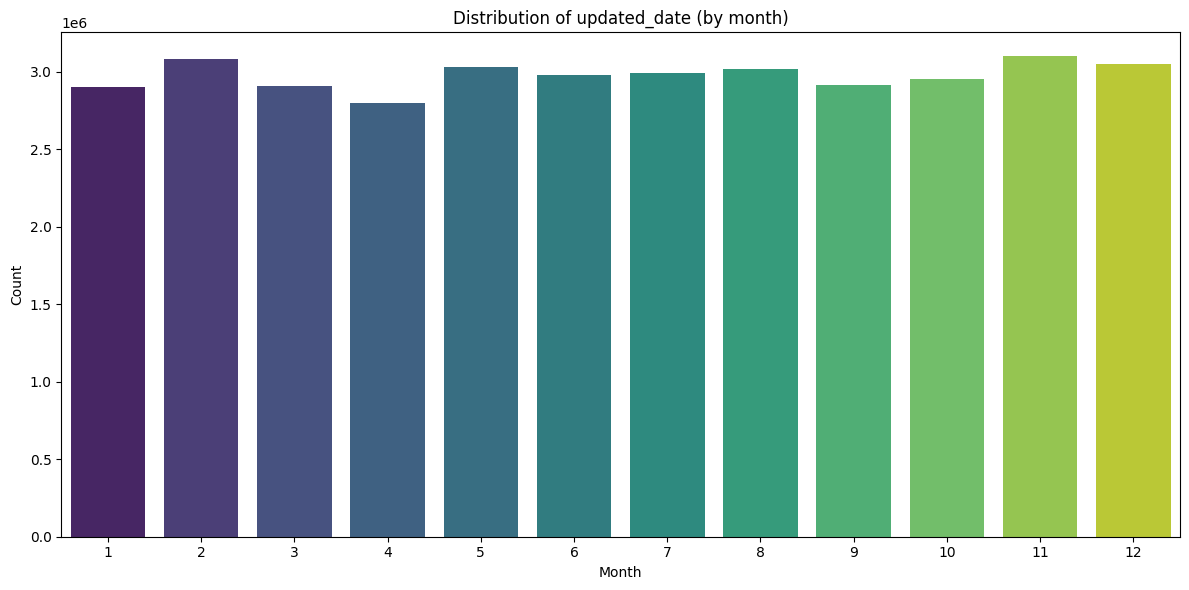

In [26]:
# EDA for 'updated_date' (time)
print("\nStatistics for updated_date:")

# Polars describe (datetime supported natively)
print(df_purchase.select("updated_date").describe())

# Extract month for analysis
updated_month = (
    df_purchase
    .with_columns(df_purchase["updated_date"].dt.month().alias("month"))
    .group_by("month")
    .agg(pl.len().alias("count"))
    .sort("month")
)

# Convert to pandas for plotting
updated_month_pd = updated_month.to_pandas()

# Plot distribution by month
plt.figure(figsize=(12, 6))
sns.barplot(
    x="month",
    y="count",
    data=updated_month_pd,
    palette="viridis"
)
plt.title("Distribution of updated_date (by month)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

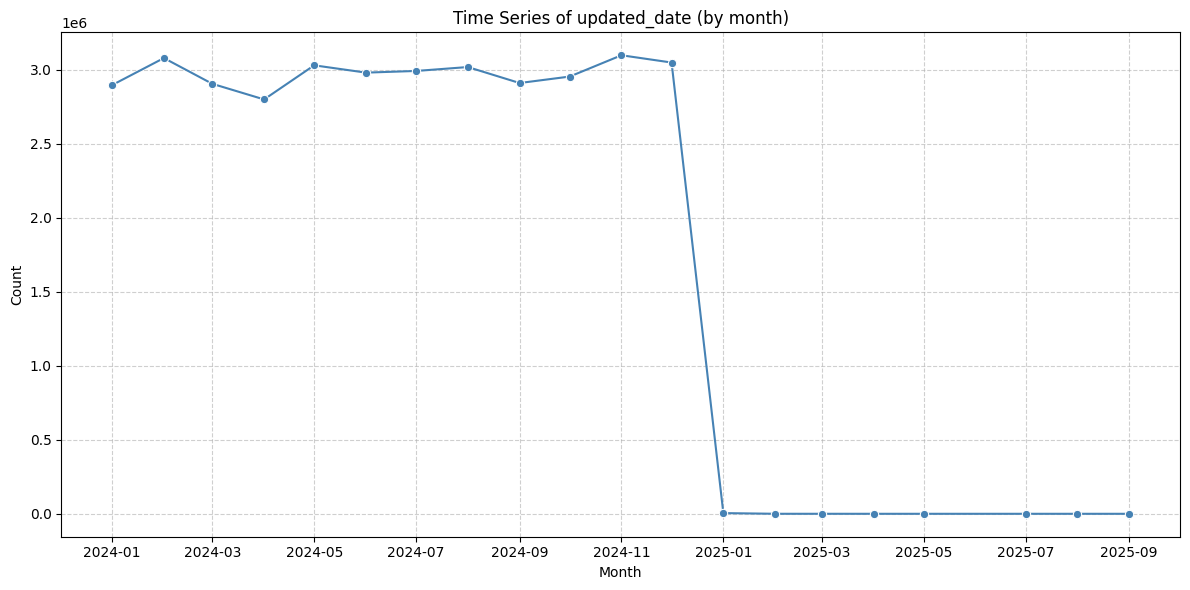

In [27]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo cột 'year_month' (dạng chuỗi 'YYYY-MM')
updated_trend = (
    df_purchase
    .with_columns(df_purchase["updated_date"].dt.strftime("%Y-%m").alias("year_month"))
    .group_by("year_month")
    .agg(pl.len().alias("count"))
    .sort("year_month")
)

# Chuyển sang pandas để vẽ
updated_trend_pd = updated_trend.to_pandas()
updated_trend_pd["year_month"] = pd.to_datetime(updated_trend_pd["year_month"])

# Vẽ biểu đồ line chart
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=updated_trend_pd,
    x="year_month",
    y="count",
    marker="o",
    color="steelblue"
)
plt.title("Time Series of updated_date (by month)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Statistics for channel:
shape: (11, 2)
┌────────────────┬──────────┐
│ channel        ┆ count    │
│ ---            ┆ ---      │
│ str            ┆ u32      │
╞════════════════╪══════════╡
│ In-Store       ┆ 33016358 │
│ iOS            ┆ 1397128  │
│ SPE            ┆ 602896   │
│ Android        ┆ 483885   │
│ Web            ┆ 146401   │
│ …              ┆ …        │
│ CRM Partner    ┆ 16640    │
│ Chat           ┆ 2310     │
│ Wholesale      ┆ 162      │
│ Không xác định ┆ 119      │
│ TKS            ┆ 2        │
└────────────────┴──────────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_10040\2951250045.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


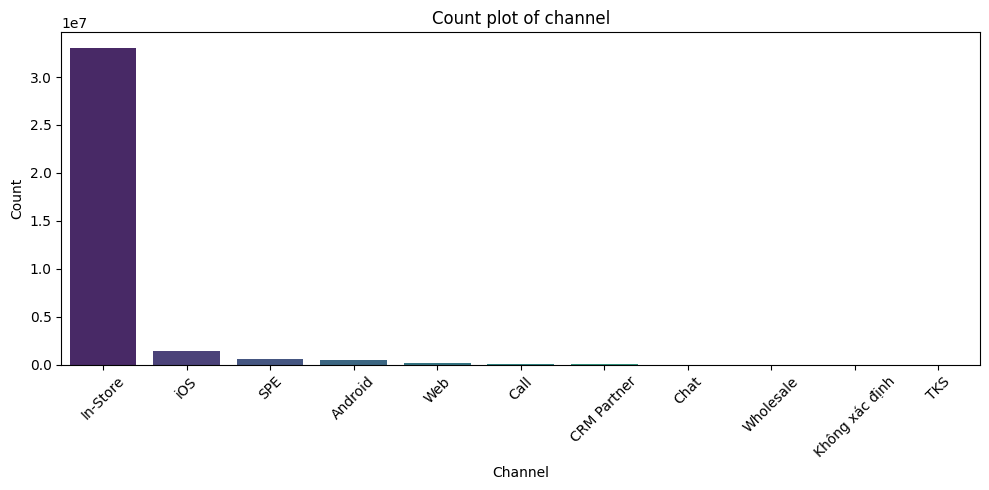

In [29]:
print("\nStatistics for channel:")

channel_stats = (
    df_purchase
    .group_by("channel")
    .agg(pl.len().alias("count"))
    .sort(["count", "channel"], descending=[True, False])
)

print(channel_stats)

plt.figure(figsize=(10, 5))
sns.barplot(
    x="channel",
    y="count",
    data=channel_stats.to_pandas(),
    palette="viridis"
)
plt.title("Count plot of channel")
plt.xlabel("Channel")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Statistics for payment:
shape: (10, 2)
┌────────────────┬──────────┐
│ payment        ┆ count    │
│ ---            ┆ ---      │
│ str            ┆ u32      │
╞════════════════╪══════════╡
│ Tiền mặt       ┆ 22454572 │
│ VietQR         ┆ 5766946  │
│ Cà thẻ         ┆ 4040302  │
│ VNPay          ┆ 2080460  │
│ MoMo           ┆ 747996   │
│ Không xác định ┆ 331952   │
│ ZaloPay        ┆ 242983   │
│ ShopeePay      ┆ 45508    │
│ Kredivo        ┆ 19044    │
│ Chuyển khoản   ┆ 62       │
└────────────────┴──────────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_10040\1498158894.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


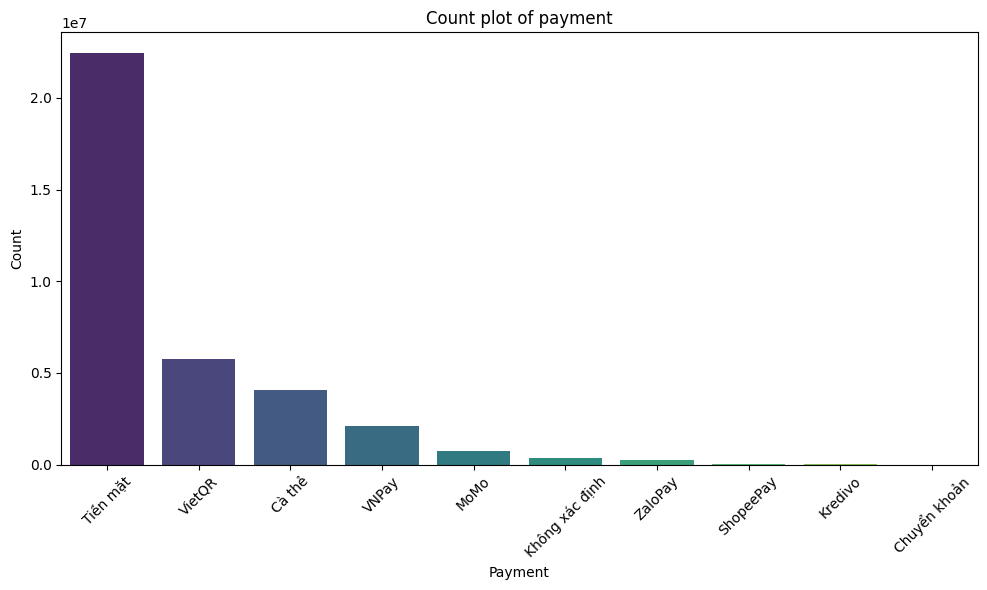

In [30]:
print("\nStatistics for payment:")

# Top payment methods
payment_stats = (
    df_purchase
    .group_by("payment")
    .agg(pl.len().alias("count"))
    .sort("count", descending=True)
)
print(payment_stats)

# Convert to pandas for plotting
payment_pd = payment_stats.to_pandas()

plt.figure(figsize=(10, 6))
sns.barplot(
    x="payment",
    y="count",
    data=payment_pd,
    palette="viridis"
)
plt.title("Count plot of payment")
plt.xlabel("Payment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Statistics for location:
shape: (9, 2)
┌────────────┬─────────────┐
│ statistic  ┆ location    │
│ ---        ┆ ---         │
│ str        ┆ f64         │
╞════════════╪═════════════╡
│ count      ┆ 3.5729825e7 │
│ null_count ┆ 0.0         │
│ mean       ┆ 448.414508  │
│ std        ┆ 247.505432  │
│ min        ┆ 16.0        │
│ 25%        ┆ 234.0       │
│ 50%        ┆ 439.0       │
│ 75%        ┆ 653.0       │
│ max        ┆ 1036.0      │
└────────────┴─────────────┘


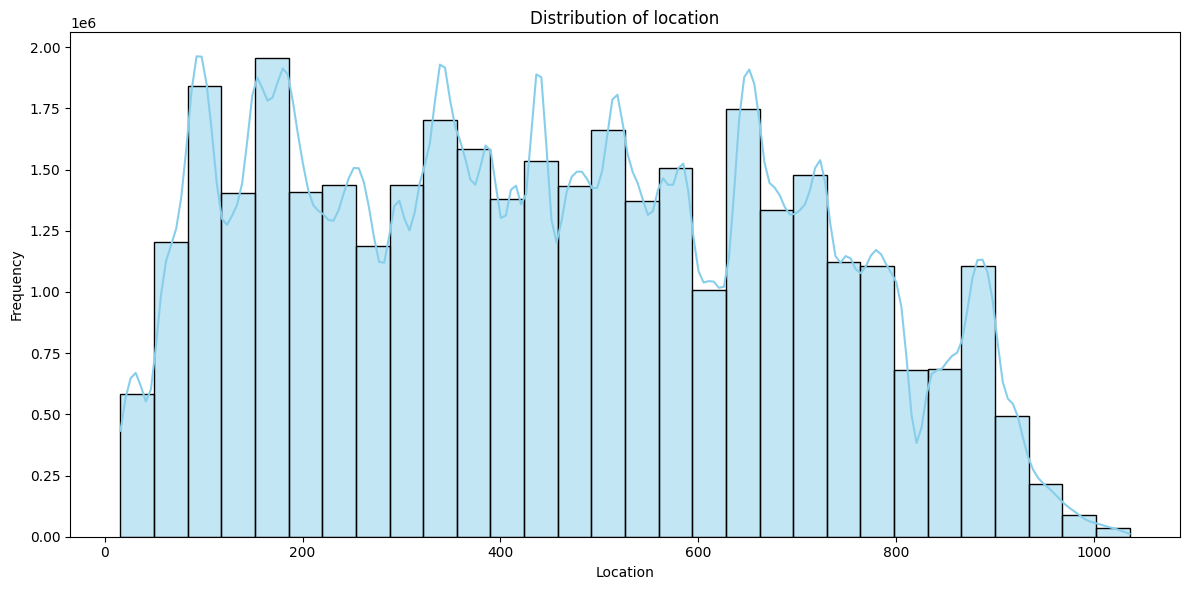

In [31]:
print("\nStatistics for location:")
print(df_purchase.select("location").describe())

# Convert to pandas for visualization
#location_pd = df_purchase.select("location").sample(n=200_000, seed=42).to_pandas()  # sample for memory safety

plt.figure(figsize=(12, 6))
sns.histplot(df_purchase["location"], kde=True, color="skyblue", bins=30)
plt.title("Distribution of location")
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

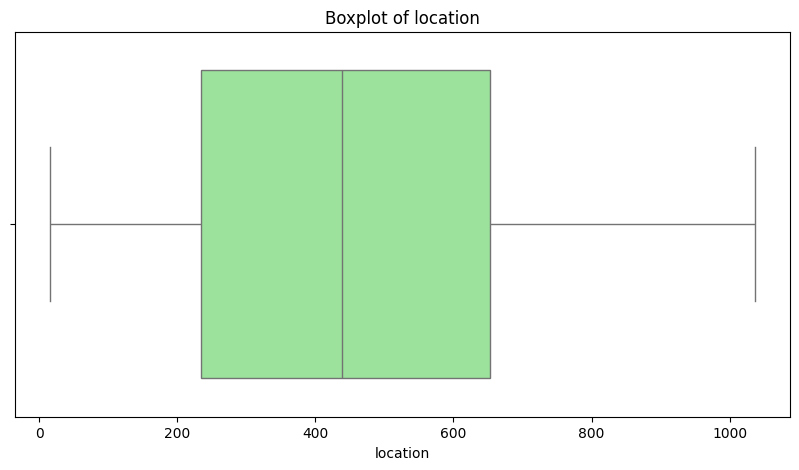

In [34]:
# Convert to pandas for visualization
location_pd = df_purchase.select("location").to_pandas()

# Sample a smaller subset to avoid memory overflow
#location_pd_sample = location_pd.sample(n=min(30000, len(location_pd)), random_state=42)

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_purchase["location"], color="lightgreen")
plt.title("Boxplot of location")
plt.xlabel("location")
plt.show()


Statistics for discount:
shape: (9, 2)
┌────────────┬──────────────┐
│ statistic  ┆ value        │
│ ---        ┆ ---          │
│ str        ┆ f64          │
╞════════════╪══════════════╡
│ count      ┆ 3.5729825e7  │
│ null_count ┆ 0.0          │
│ mean       ┆ 17235.651914 │
│ std        ┆ 46673.708499 │
│ min        ┆ 0.0          │
│ 25%        ┆ 0.0          │
│ 50%        ┆ 0.0          │
│ 75%        ┆ 15000.0      │
│ max        ┆ 7.995e6      │
└────────────┴──────────────┘


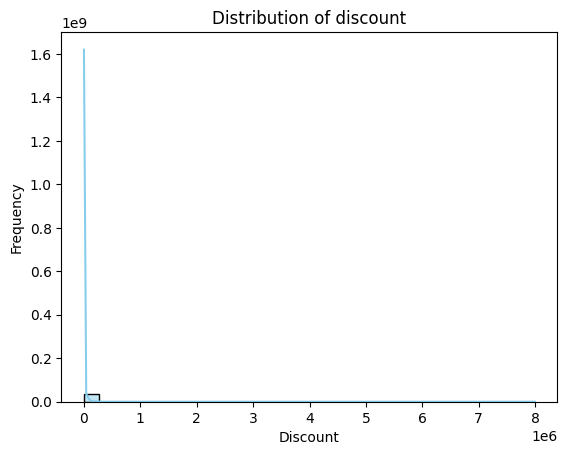

In [35]:
# EDA for 'discount' (numeric)
print("\nStatistics for discount:")
print(df_purchase['discount'].describe())
sns.histplot(df_purchase['discount'], kde=True, color="skyblue", bins=30)
plt.title('Distribution of discount')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

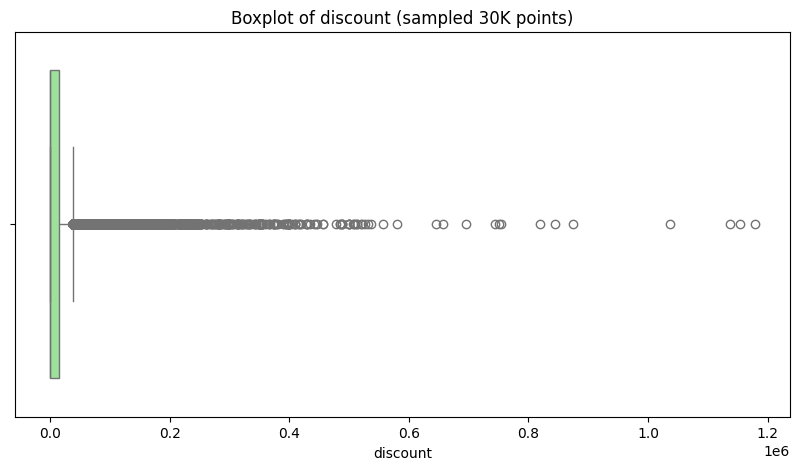

In [38]:
# Convert to pandas for visualization
discount_pd = df_purchase.select("discount").to_pandas()

# Sample a smaller subset to avoid memory overflow
discount_pd_sample = discount_pd.sample(n=min(30000, len(discount_pd)), random_state=42)

plt.figure(figsize=(10, 5))
sns.boxplot(x=discount_pd_sample["discount"], color="lightgreen")
plt.title("Boxplot of discount (sampled 30K points)")
plt.xlabel("discount")
plt.show()


Statistics for is_deleted:
shape: (1, 2)
┌────────────┬──────────┐
│ is_deleted ┆ count    │
│ ---        ┆ ---      │
│ bool       ┆ u32      │
╞════════════╪══════════╡
│ false      ┆ 35729825 │
└────────────┴──────────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_10040\1324240560.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


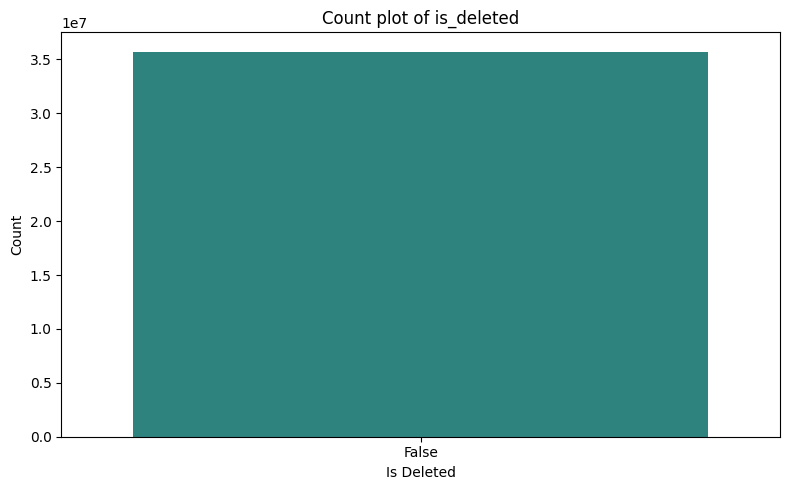

In [39]:
print("\nStatistics for is_deleted:")

is_deleted_stats = (
    df_purchase
    .group_by("is_deleted")
    .agg(pl.len().alias("count"))
    .sort("count", descending=True)
)
print(is_deleted_stats)

# Convert to pandas for plotting
is_deleted_pd = is_deleted_stats.to_pandas()

plt.figure(figsize=(8, 5))
sns.barplot(
    x="is_deleted",
    y="count",
    data=is_deleted_pd,
    palette="viridis"
)
plt.title("Count plot of is_deleted")
plt.xlabel("Is Deleted")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Item Chunk

In [7]:
print("Item Chunk DataFrame:")
df_item.head()

Item Chunk DataFrame:


p_id,item_id,price,category_l1_id,category_l1,category_l2_id,category_l2,category_l3_id,category_l3,category_id,category,description,brand,manufacturer,creation_timestamp,is_deleted,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,image_url,gender_target,age_group,item_type,gp,weight,color,size,origin,volume,material,sale_status,description_new
i32,str,"decimal[38,4]",i32,str,i32,str,i32,str,i32,str,str,str,str,i64,bool,datetime[μs],datetime[μs],i32,datetime[μs],str,str,str,str,str,"decimal[38,4]",f32,str,str,str,str,str,i32,str
17065,"""0502020000004""",99000.0000,1,"""Babycare""",35,"""Bình sữa, phụ kiện""",7050,"""Núm ty""",7058,"""Núm ty Dr Brown""","""Không xác định""","""Dr.Brown's""","""Không xác định""",1333531544,false,2012-04-04 09:25:44.240,2025-08-18 09:59:19.847,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",36828.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Chi tiết sản phẩm …"
72370,"""0010290040150""",69000.0000,3292,"""Thời trang""",3958,"""Cơ cấu hàng cũ""",7007,"""Thời trang bé trai, bé gái cũ""",6987,"""Bộ quần áo bé gái""","""Không xác định""","""Con Cưng""","""Không xác định""",1503046250,false,2017-08-18 08:50:50.713,2025-09-18 16:05:42.360,null,null,null,"""Không xác định""","""Bé Gái""","""Từ 3Y""","""Bộ quần áo""",0.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Không xác định"""
31154,"""0008010000015""",45000.0000,351,"""Đồ chơi & Sách""",2033,"""0-1Y""",2118,"""Gặm nướu""",2121,"""Gặm nướu khác""","""- Chất liệu: Sản phẩm được làm…","""Thương hiệu khác""","""Không xác định""",1358501584,false,2013-01-18 09:33:04.260,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",14490.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Chi tiết sản phẩm …"
46123,"""0020010000094""",401000.0000,2222,"""Tã""",2272,"""Merries""",2275,"""Merries""",2276,"""Merries_Sơ Sinh""","""﻿﻿Tã dán Merries size S 82 miế…","""Merries Nhật""","""Không xác định""",1400062039,false,2014-05-14 10:07:19.603,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",59749.0000,null,"""Không xác định""","""Không xác định""","""Nhật Bản, Nhật Bản""","""Không xác định""","""Giấy, bột giấy, vải không dệt,…",0,"""Không xác định"""
46127,"""0020010000098""",401000.0000,2222,"""Tã""",2272,"""Merries""",2275,"""Merries""",2278,"""Merries_Tã Quần""","""﻿﻿﻿Bỉm tã quần Merries size M …","""Merries Nhật""","""Không xác định""",1400062040,false,2014-05-14 10:07:20.370,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",65764.0000,null,"""Không xác định""","""Không xác định""","""Nhật Bản, Nhật Bản""","""Không xác định""","""Giấy, bột giấy, vải không dệt,…",0,"""Không xác định"""


In [8]:
print(df_item.schema)
print(f"Rows: {df_item.height:,}, Columns: {df_item.width}")

Schema([('p_id', Int32), ('item_id', String), ('price', Decimal(precision=38, scale=4)), ('category_l1_id', Int32), ('category_l1', String), ('category_l2_id', Int32), ('category_l2', String), ('category_l3_id', Int32), ('category_l3', String), ('category_id', Int32), ('category', String), ('description', String), ('brand', String), ('manufacturer', String), ('creation_timestamp', Int64), ('is_deleted', Boolean), ('created_date', Datetime(time_unit='us', time_zone=None)), ('updated_date', Datetime(time_unit='us', time_zone=None)), ('sync_status_id', Int32), ('last_sync_date', Datetime(time_unit='us', time_zone=None)), ('sync_error_message', String), ('image_url', String), ('gender_target', String), ('age_group', String), ('item_type', String), ('gp', Decimal(precision=38, scale=4)), ('weight', Float32), ('color', String), ('size', String), ('origin', String), ('volume', String), ('material', String), ('sale_status', Int32), ('description_new', String)])
Rows: 27,332, Columns: 34


#### Statistics and Visualize

Schema:
Schema([('p_id', Int32), ('item_id', String), ('price', Decimal(precision=38, scale=4)), ('category_l1_id', Int32), ('category_l1', String), ('category_l2_id', Int32), ('category_l2', String), ('category_l3_id', Int32), ('category_l3', String), ('category_id', Int32), ('category', String), ('description', String), ('brand', String), ('manufacturer', String), ('creation_timestamp', Int64), ('is_deleted', Boolean), ('created_date', Datetime(time_unit='us', time_zone=None)), ('updated_date', Datetime(time_unit='us', time_zone=None)), ('sync_status_id', Int32), ('last_sync_date', Datetime(time_unit='us', time_zone=None)), ('sync_error_message', String), ('image_url', String), ('gender_target', String), ('age_group', String), ('item_type', String), ('gp', Decimal(precision=38, scale=4)), ('weight', Float32), ('color', String), ('size', String), ('origin', String), ('volume', String), ('material', String), ('sale_status', Int32), ('description_new', String)])
Rows: 27,332, Columns: 3

C:\Users\T14\AppData\Local\Temp\ipykernel_5016\254267029.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


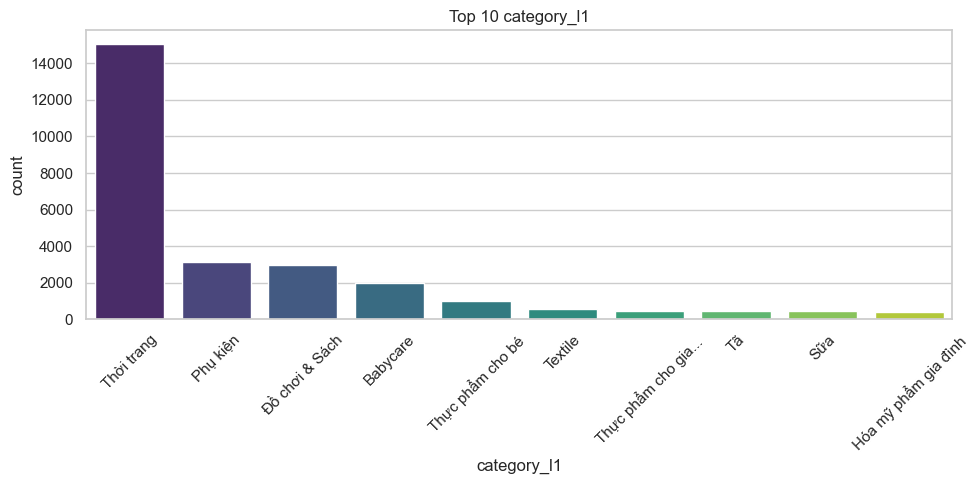


Top 10 for category_l2:
shape: (10, 2)
┌────────────────────────────┬───────┐
│ category_l2                ┆ count │
│ ---                        ┆ ---   │
│ str                        ┆ u32   │
╞════════════════════════════╪═══════╡
│ Cơ cấu hàng cũ             ┆ 9105  │
│ Thời trang bé trai         ┆ 2179  │
│ Thời trang bé gái          ┆ 1887  │
│ Modal kháng khuẩn          ┆ 1711  │
│ 1Y+                        ┆ 1565  │
│ Quần áo & Phụ kiện sơ sinh ┆ 1539  │
│ Sách & VPP                 ┆ 736   │
│ 0-1Y                       ┆ 654   │
│ Giày tập đi                ┆ 555   │
│ Bình sữa, phụ kiện         ┆ 517   │
└────────────────────────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_5016\254267029.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


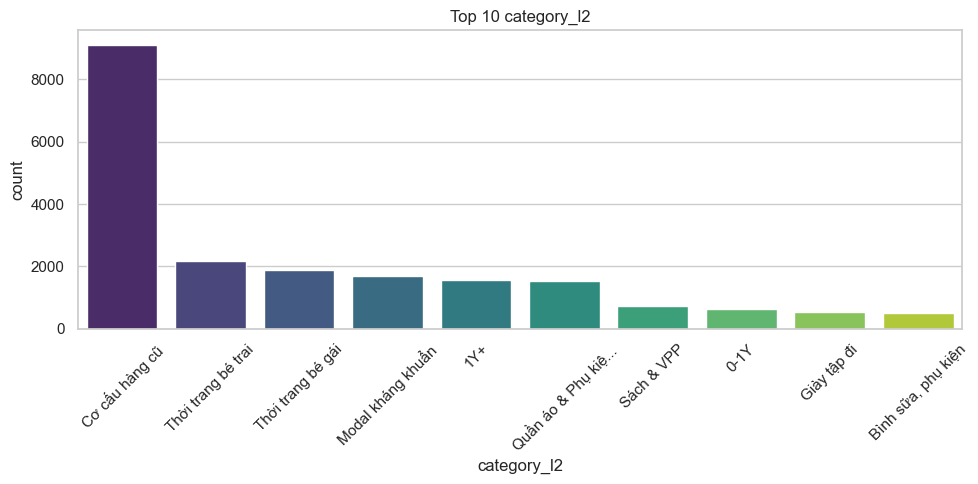


Top 10 for category_l3:
shape: (10, 2)
┌────────────────────────────────┬───────┐
│ category_l3                    ┆ count │
│ ---                            ┆ ---   │
│ str                            ┆ u32   │
╞════════════════════════════════╪═══════╡
│ Thời trang bé trai, bé gái cũ  ┆ 5164  │
│ Quần, áo & phụ kiện sơ sinh cũ ┆ 1763  │
│ Bộ bé trai                     ┆ 1643  │
│ Bộ Modal                       ┆ 1200  │
│ Giày dép tồn                   ┆ 1092  │
│ Bộ bé gái                      ┆ 938   │
│ Sách                           ┆ 610   │
│ Áo                             ┆ 597   │
│ Bodysuit Modal                 ┆ 511   │
│ Đầm bé gái                     ┆ 497   │
└────────────────────────────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_5016\254267029.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


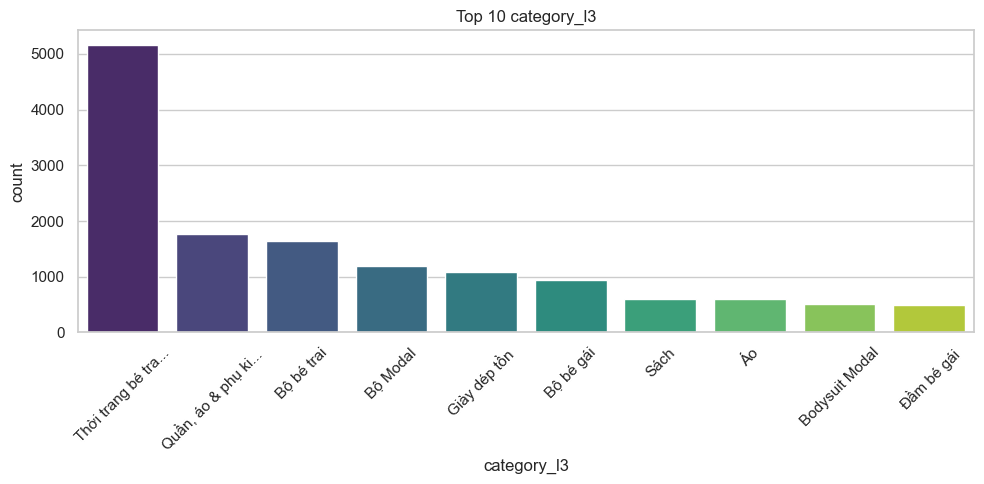


Top 10 for brand:
shape: (10, 2)
┌──────────────────────┬───────┐
│ brand                ┆ count │
│ ---                  ┆ ---   │
│ str                  ┆ u32   │
╞══════════════════════╪═══════╡
│ Animo                ┆ 8149  │
│ Không xác định       ┆ 5480  │
│ CF (ConCung Fashion) ┆ 5426  │
│ Thương hiệu khác     ┆ 607   │
│ Con Cưng             ┆ 484   │
│ TOYCITY              ┆ 300   │
│ ConCung Good         ┆ 211   │
│ Nous                 ┆ 140   │
│ Pigeon               ┆ 120   │
│ Mesuca               ┆ 114   │
└──────────────────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_5016\254267029.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


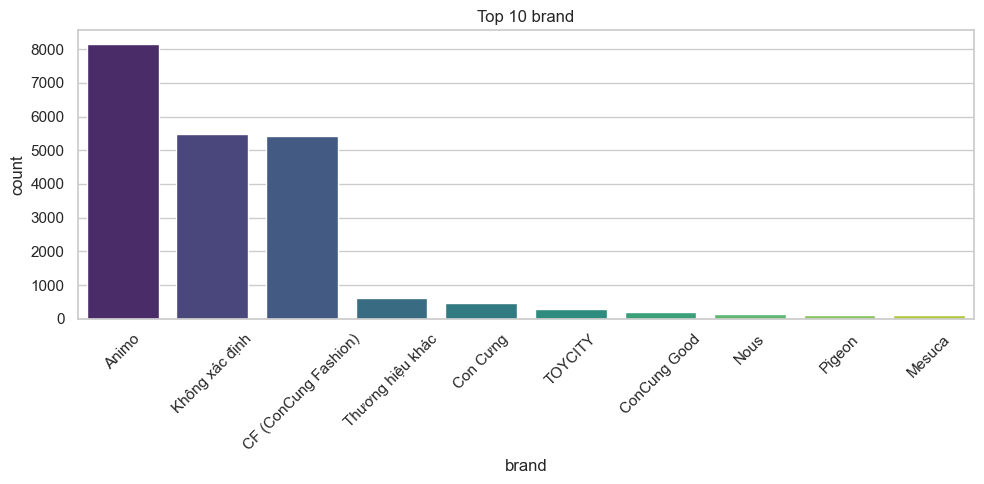


Top 10 for manufacturer:
shape: (10, 2)
┌─────────────────────────────────┬───────┐
│ manufacturer                    ┆ count │
│ ---                             ┆ ---   │
│ str                             ┆ u32   │
╞═════════════════════════════════╪═══════╡
│ Không xác định                  ┆ 25767 │
│ Unilever                        ┆ 28    │
│ Mead Johnson Nutrition (Thaila… ┆ 20    │
│ Công ty Cổ Phần Thực Phẩm Dinh… ┆ 19    │
│ Vinamilk                        ┆ 17    │
│ Hayat Việt Nam                  ┆ 12    │
│ Công ty Bourbon Corporation<br… ┆ 11    │
│ Australia Deloraine Dairy Pty … ┆ 11    │
│ VitaDairy                       ┆ 11    │
│ LONG HAPPY TOYS                 ┆ 11    │
└─────────────────────────────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_5016\254267029.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


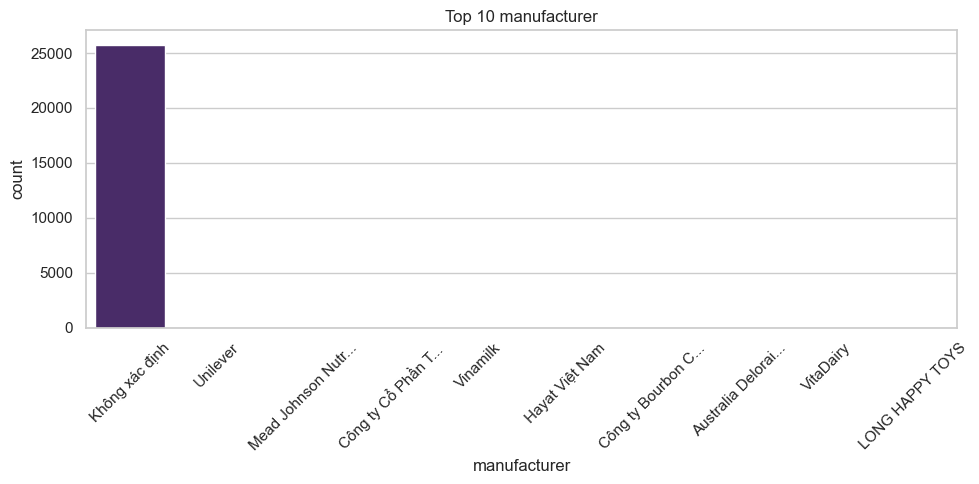


Top 10 for gender_target:
shape: (5, 2)
┌────────────────┬───────┐
│ gender_target  ┆ count │
│ ---            ┆ ---   │
│ str            ┆ u32   │
╞════════════════╪═══════╡
│ Không xác định ┆ 18038 │
│ Bé Gái         ┆ 4108  │
│ Bé Trai        ┆ 3318  │
│ Sơ sinh        ┆ 1862  │
│ Unisex         ┆ 6     │
└────────────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_5016\254267029.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


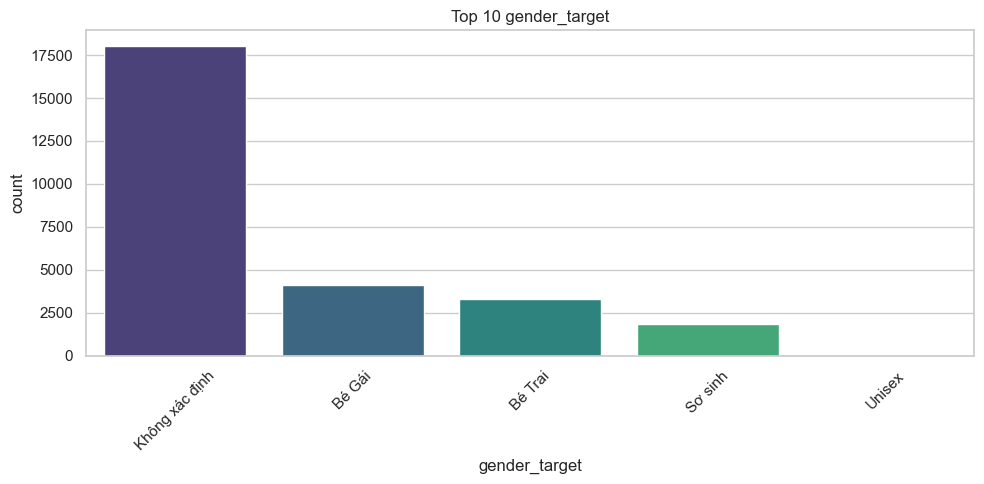


Top 10 for age_group:
shape: (10, 2)
┌────────────────┬───────┐
│ age_group      ┆ count │
│ ---            ┆ ---   │
│ str            ┆ u32   │
╞════════════════╪═══════╡
│ Không xác định ┆ 15812 │
│ Từ 3Y          ┆ 944   │
│ 9M-12M         ┆ 844   │
│ 6M-9M          ┆ 672   │
│ Từ 1Y          ┆ 609   │
│ Từ 2Y          ┆ 577   │
│ 3M-6M          ┆ 545   │
│ Từ 6M          ┆ 508   │
│ 0-12M          ┆ 431   │
│ Từ 0M          ┆ 430   │
└────────────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_5016\254267029.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


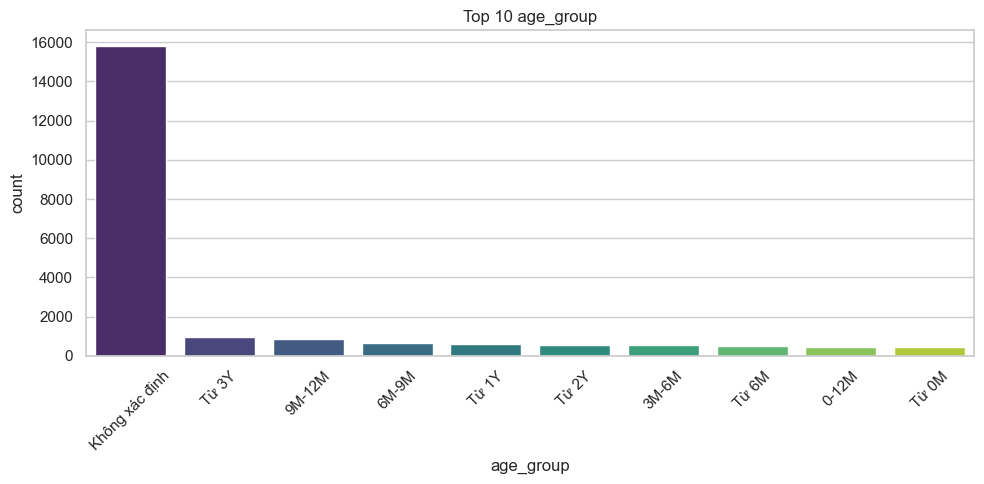


Top 10 for item_type:
shape: (10, 2)
┌──────────────────────┬───────┐
│ item_type            ┆ count │
│ ---                  ┆ ---   │
│ str                  ┆ u32   │
╞══════════════════════╪═══════╡
│ Không xác định       ┆ 9820  │
│ Bộ quần áo           ┆ 3926  │
│ Áo                   ┆ 1904  │
│ Bodysuit             ┆ 1456  │
│ Quần                 ┆ 990   │
│ Giày tập đi          ┆ 764   │
│ Đầm, váy             ┆ 708   │
│ Nón                  ┆ 385   │
│ Sữa bột cho bé       ┆ 351   │
│ Bánh, kẹo dinh dưỡng ┆ 350   │
└──────────────────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_5016\254267029.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


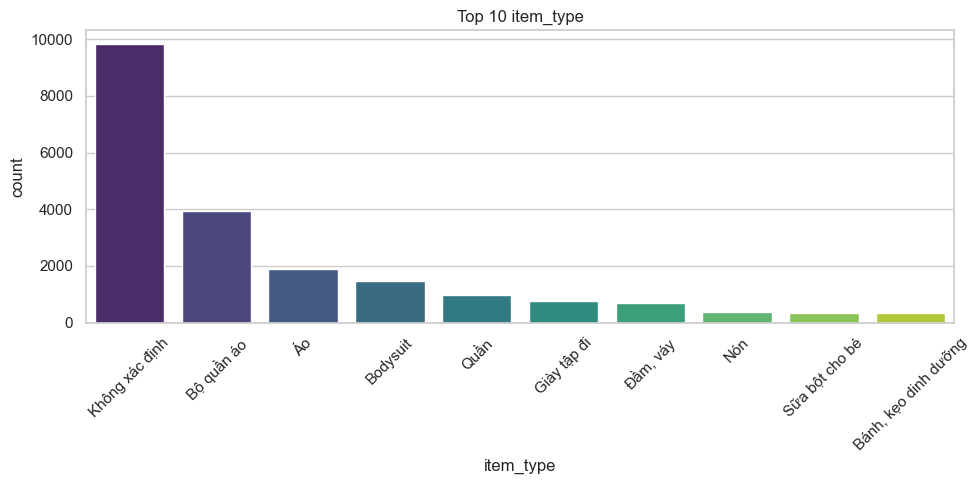

C:\Users\T14\AppData\Local\Temp\ipykernel_5016\254267029.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")



Top 10 for origin:
shape: (10, 2)
┌────────────────────┬───────┐
│ origin             ┆ count │
│ ---                ┆ ---   │
│ str                ┆ u32   │
╞════════════════════╪═══════╡
│ Không xác định     ┆ 22627 │
│ Việt Nam           ┆ 1991  │
│ Trung Quốc         ┆ 584   │
│ Hàn Quốc           ┆ 216   │
│ Việt Nam, Việt Nam ┆ 190   │
│ Nhật Bản           ┆ 175   │
│ Nhật Bản, Nhật Bản ┆ 171   │
│ Thái Lan           ┆ 141   │
│ Úc                 ┆ 61    │
│ Singapore          ┆ 49    │
└────────────────────┴───────┘


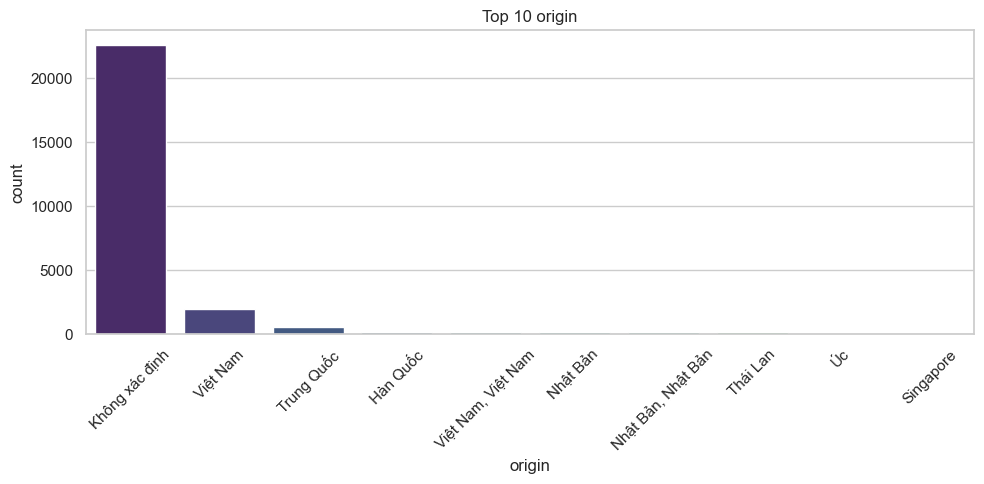


Top 10 for sale_status:
shape: (2, 2)
┌─────────────┬───────┐
│ sale_status ┆ count │
│ ---         ┆ ---   │
│ i32         ┆ u32   │
╞═════════════╪═══════╡
│ 0           ┆ 22762 │
│ 1           ┆ 4570  │
└─────────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_5016\254267029.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


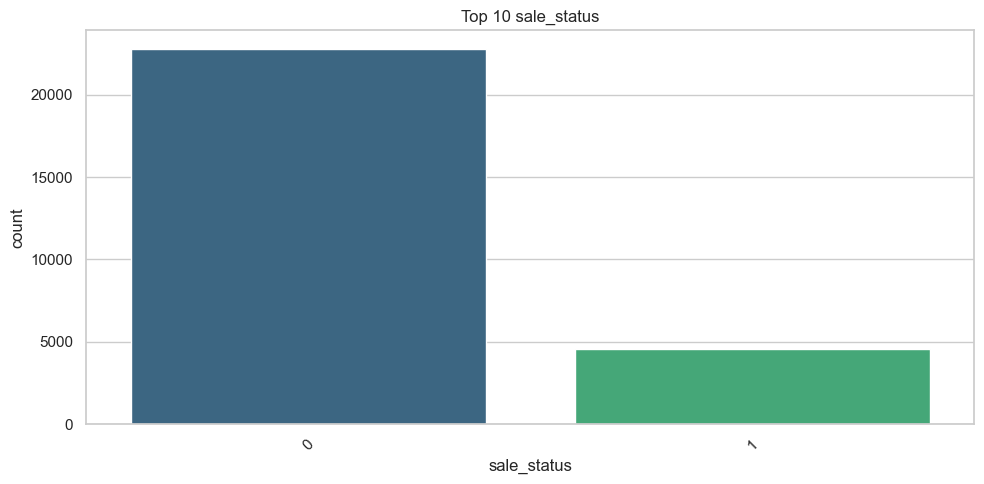


Top 10 for color:
shape: (10, 2)
┌────────────────┬───────┐
│ color          ┆ count │
│ ---            ┆ ---   │
│ str            ┆ u32   │
╞════════════════╪═══════╡
│ Không xác định ┆ 26608 │
│ Xanh           ┆ 165   │
│ Hồng           ┆ 164   │
│ Trắng          ┆ 81    │
│ Vàng           ┆ 48    │
│ Nhiều màu      ┆ 40    │
│ Đỏ             ┆ 34    │
│ Xám            ┆ 31    │
│ Xanh dương     ┆ 21    │
│ Cam            ┆ 14    │
└────────────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_5016\254267029.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


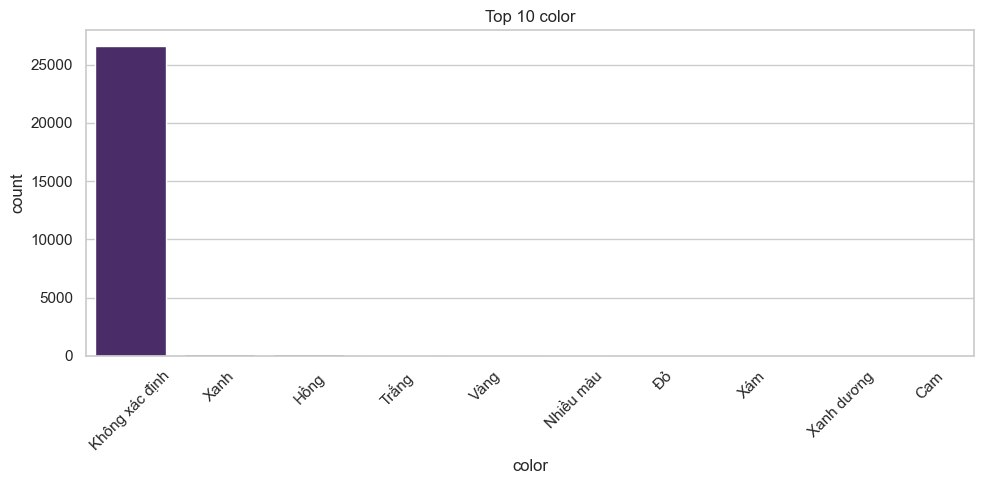


Top 10 for size:
shape: (10, 2)
┌────────────────┬───────┐
│ size           ┆ count │
│ ---            ┆ ---   │
│ str            ┆ u32   │
╞════════════════╪═══════╡
│ Không xác định ┆ 25108 │
│ 0-3M           ┆ 346   │
│ 1Y             ┆ 330   │
│ 6-9M           ┆ 224   │
│ NB             ┆ 112   │
│ 9 tháng        ┆ 112   │
│ 13             ┆ 98    │
│ 1-2Y           ┆ 70    │
│ 3-6M           ┆ 53    │
│ 9-12M          ┆ 51    │
└────────────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_5016\254267029.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


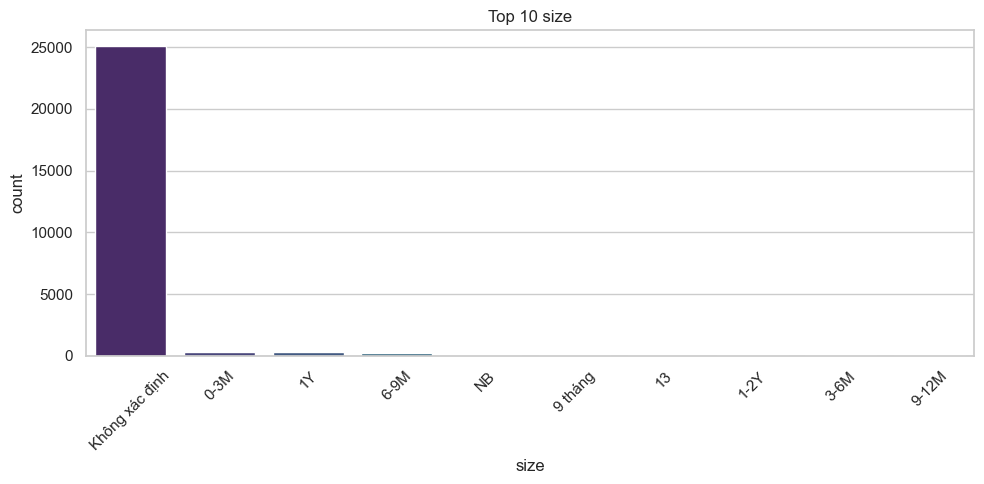


Top 10 for description:
shape: (10, 2)
┌─────────────────────────────────┬───────┐
│ description                     ┆ count │
│ ---                             ┆ ---   │
│ str                             ┆ u32   │
╞═════════════════════════════════╪═══════╡
│ Không xác định                  ┆ 18629 │
│ Ưu điểm nổi bật của sản phẩm -… ┆ 16    │
│ ﻿ Ưu điểm nổi bật của sản phẩm…  ┆ 8     │
│ - Chuyên dùng cho bé ngậm tạo … ┆ 6     │
│ ﻿ Ưu điểm nổi bật của sản phẩm…  ┆ 6     │
│ Ty bình sữa dành cho bé yêu cầ… ┆ 4     │
│ - Chuyên dùng cho bé ngậm tạo … ┆ 3     │
│ Giới thiệu về thương hiệu Napp… ┆ 3     │
│ Đồ chơi nhà tắm là sản phẩm đư… ┆ 3     │
│ Với dây đeo an toàn, bé của bạ… ┆ 3     │
└─────────────────────────────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_5016\254267029.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")
C:\Users\T14\AppData\Local\Temp\ipykernel_5016\254267029.py:94: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\T14\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


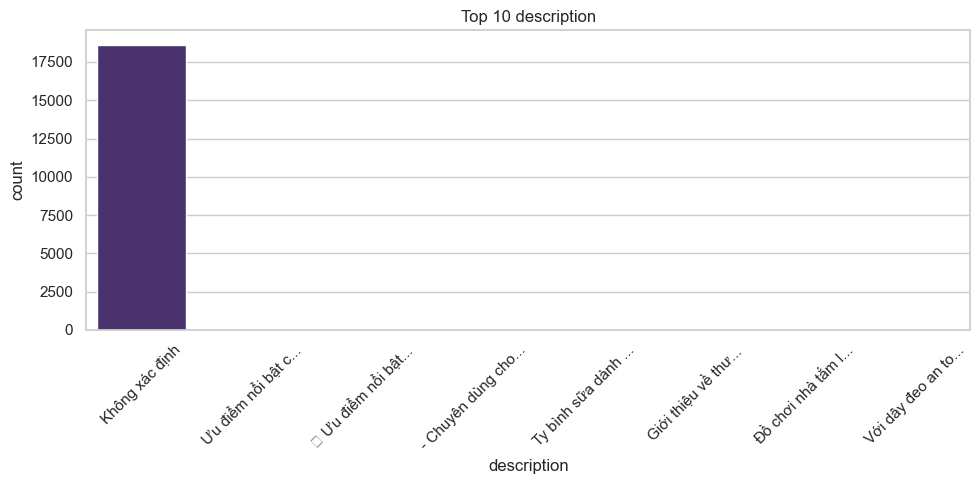

C:\Users\T14\AppData\Local\Temp\ipykernel_5016\254267029.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")



Top 10 for description_new:
shape: (10, 2)
┌─────────────────────────────────┬───────┐
│ description_new                 ┆ count │
│ ---                             ┆ ---   │
│ str                             ┆ u32   │
╞═════════════════════════════════╪═══════╡
│ Không xác định                  ┆ 12815 │
│ null                            ┆ 5015  │
│ Chi tiết sản phẩmTên sản phẩm:… ┆ 2     │
│ Chi tiết sản phẩmTên sản phẩm:… ┆ 2     │
│ Chi tiết sản phẩm             … ┆ 1     │
│ Chi tiết sản phẩm             … ┆ 1     │
│ Chi tiết sản phẩm             … ┆ 1     │
│ Chi tiết sản phẩm             … ┆ 1     │
│ Chi tiết sản phẩm             … ┆ 1     │
│ Chi tiết sản phẩm             … ┆ 1     │
└─────────────────────────────────┴───────┘


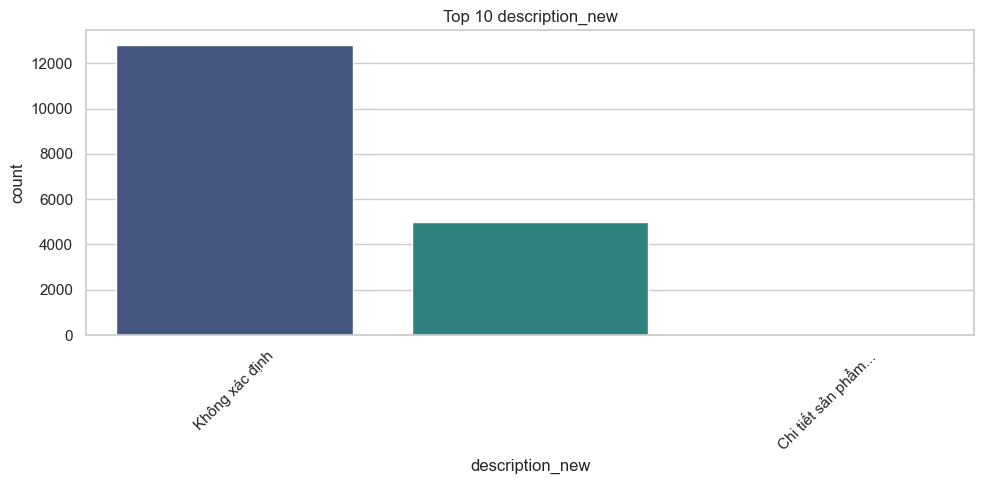


Top 10 for image_url:
shape: (1, 2)
┌────────────────┬───────┐
│ image_url      ┆ count │
│ ---            ┆ ---   │
│ str            ┆ u32   │
╞════════════════╪═══════╡
│ Không xác định ┆ 27332 │
└────────────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_5016\254267029.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


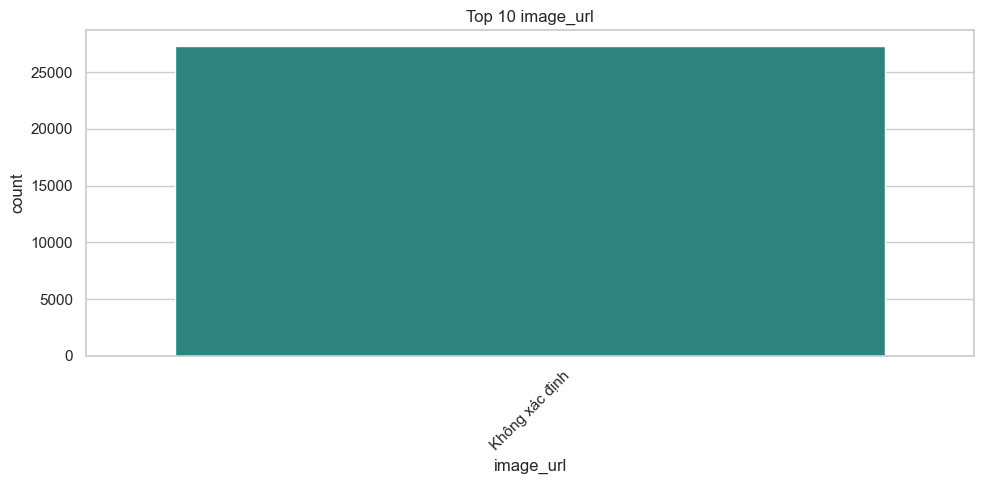


Top 10 for is_deleted:
shape: (1, 2)
┌────────────┬───────┐
│ is_deleted ┆ count │
│ ---        ┆ ---   │
│ bool       ┆ u32   │
╞════════════╪═══════╡
│ false      ┆ 27332 │
└────────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_5016\254267029.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


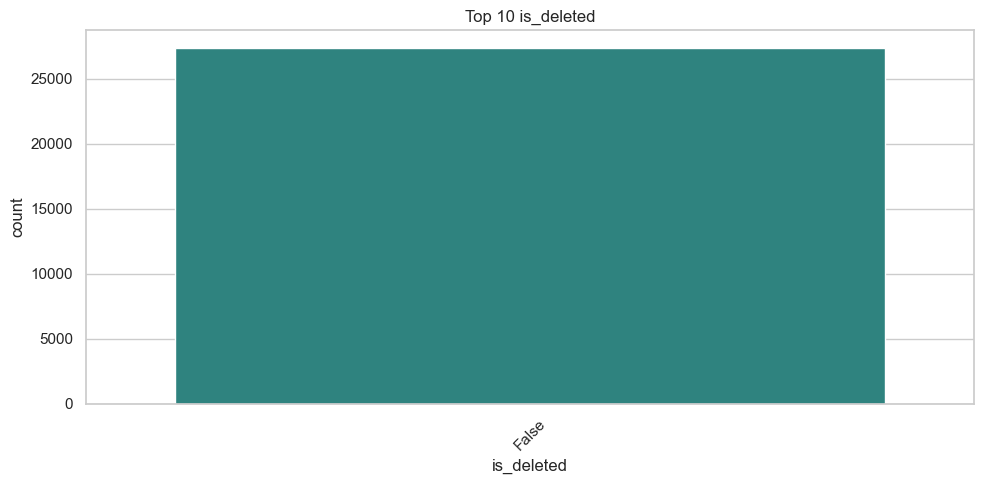


Top 10 for sync_error_message:
shape: (1, 2)
┌────────────────────┬───────┐
│ sync_error_message ┆ count │
│ ---                ┆ ---   │
│ str                ┆ u32   │
╞════════════════════╪═══════╡
│ null               ┆ 27332 │
└────────────────────┴───────┘


C:\Users\T14\AppData\Local\Temp\ipykernel_5016\254267029.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c, y="count", data=stats, palette="viridis")


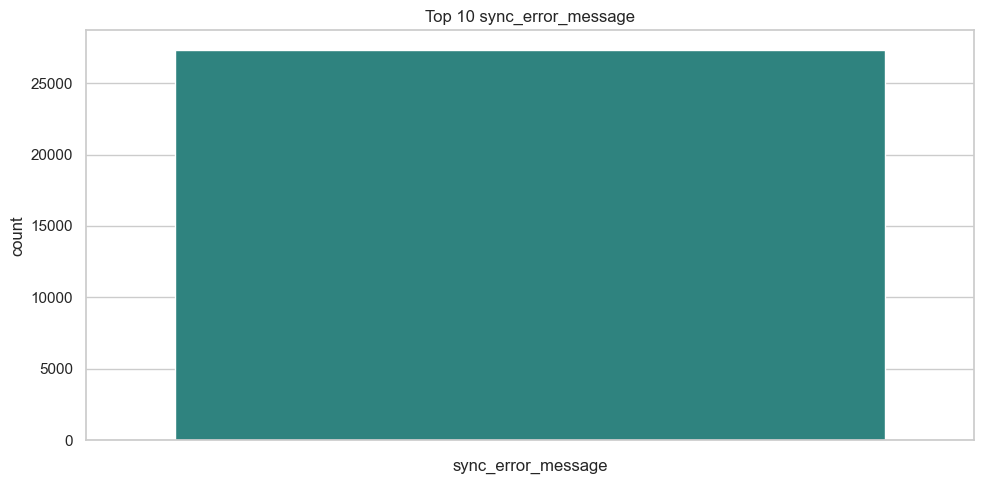


Summary for price:
shape: (9, 2)
┌────────────┬───────────────┐
│ statistic  ┆ price         │
│ ---        ┆ ---           │
│ str        ┆ f64           │
╞════════════╪═══════════════╡
│ count      ┆ 27332.0       │
│ null_count ┆ 0.0           │
│ mean       ┆ 190456.829467 │
│ std        ┆ 511123.971813 │
│ min        ┆ 0.0           │
│ 25%        ┆ 49000.0       │
│ 50%        ┆ 119000.0      │
│ 75%        ┆ 199000.0      │
│ max        ┆ 2.099e7       │
└────────────┴───────────────┘


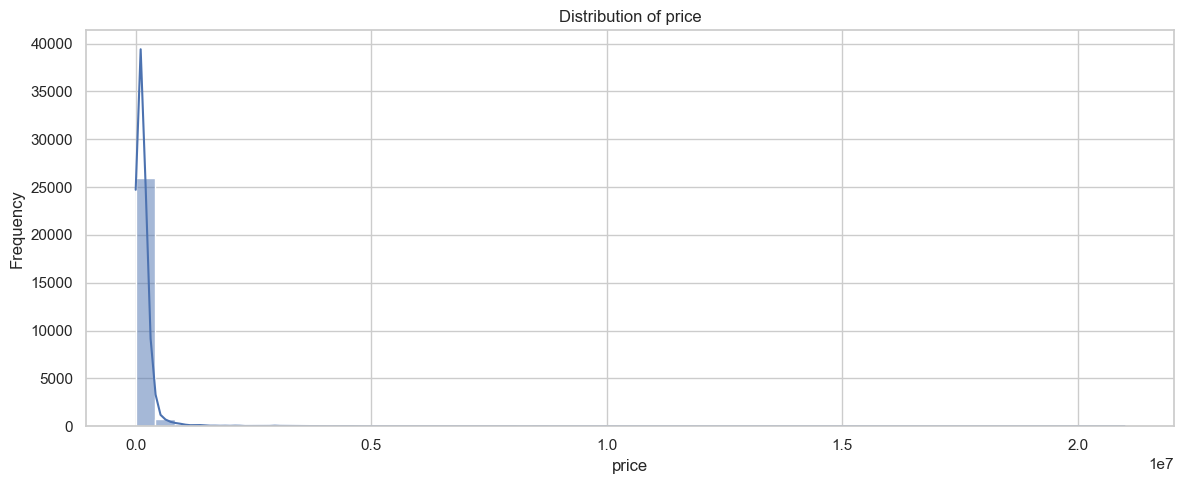

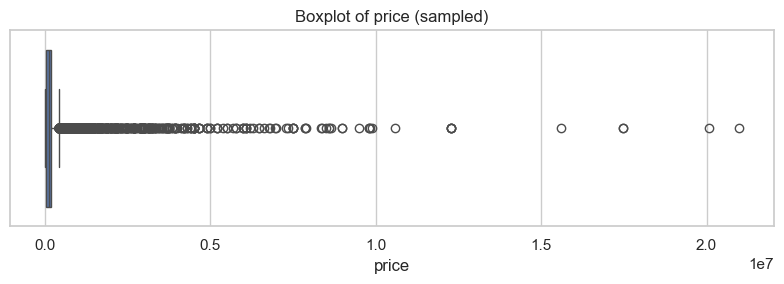


Summary for gp:
shape: (9, 2)
┌────────────┬──────────────┐
│ statistic  ┆ gp           │
│ ---        ┆ ---          │
│ str        ┆ f64          │
╞════════════╪══════════════╡
│ count      ┆ 27332.0      │
│ null_count ┆ 0.0          │
│ mean       ┆ 49696.651226 │
│ std        ┆ 144155.68753 │
│ min        ┆ 0.0          │
│ 25%        ┆ 0.0          │
│ 50%        ┆ 25047.0      │
│ 75%        ┆ 65532.0      │
│ max        ┆ 5.54136e6    │
└────────────┴──────────────┘


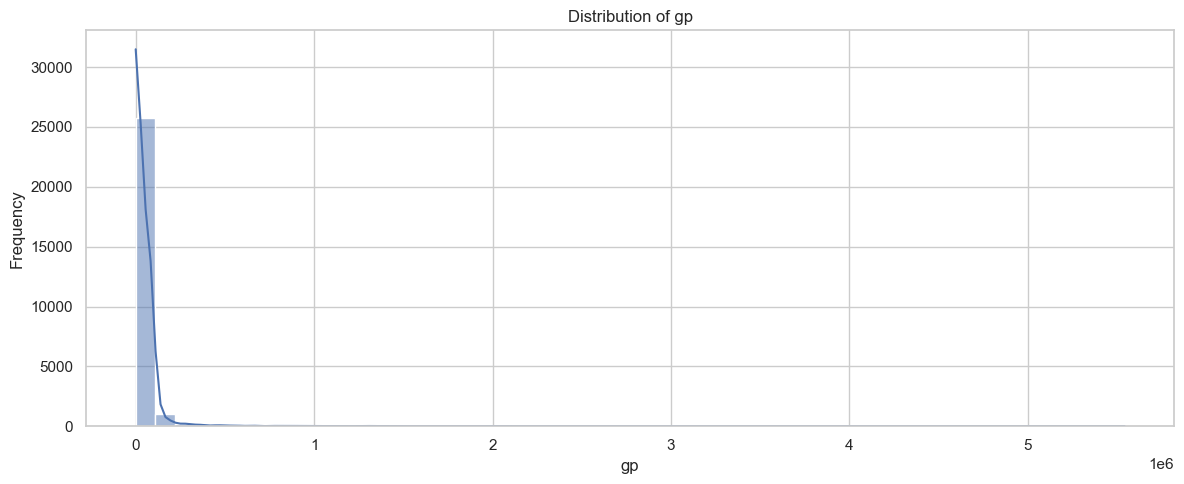

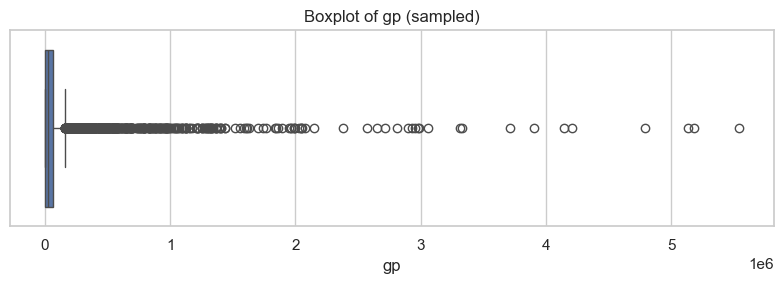


Summary for weight:
shape: (9, 2)
┌────────────┬─────────┐
│ statistic  ┆ weight  │
│ ---        ┆ ---     │
│ str        ┆ f64     │
╞════════════╪═════════╡
│ count      ┆ 0.0     │
│ null_count ┆ 27332.0 │
│ mean       ┆ null    │
│ std        ┆ null    │
│ min        ┆ null    │
│ 25%        ┆ null    │
│ 50%        ┆ null    │
│ 75%        ┆ null    │
│ max        ┆ null    │
└────────────┴─────────┘

Statistics for created_date:
shape: (9, 2)
┌────────────┬────────────────────────────┐
│ statistic  ┆ created_date               │
│ ---        ┆ ---                        │
│ str        ┆ str                        │
╞════════════╪════════════════════════════╡
│ count      ┆ 27332                      │
│ null_count ┆ 0                          │
│ mean       ┆ 2021-05-31 17:17:33.849833 │
│ std        ┆ null                       │
│ min        ┆ 2011-02-21 11:54:02.047000 │
│ 25%        ┆ 2019-12-04 18:24:16.260000 │
│ 50%        ┆ 2021-11-01 13:19:26.080000 │
│ 75%        ┆ 202

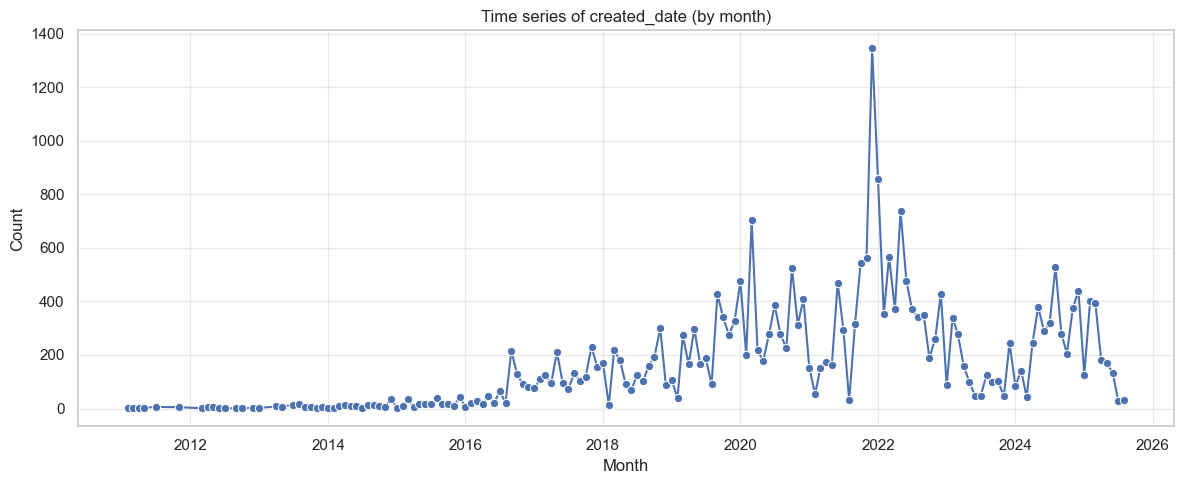


Statistics for updated_date:
shape: (9, 2)
┌────────────┬────────────────────────────┐
│ statistic  ┆ updated_date               │
│ ---        ┆ ---                        │
│ str        ┆ str                        │
╞════════════╪════════════════════════════╡
│ count      ┆ 27332                      │
│ null_count ┆ 0                          │
│ mean       ┆ 2025-08-30 04:07:07.766157 │
│ std        ┆ null                       │
│ min        ┆ 2023-12-26 17:21:11.663000 │
│ 25%        ┆ 2025-08-18 09:59:19.847000 │
│ 50%        ┆ 2025-09-26 08:05:23.153000 │
│ 75%        ┆ 2025-09-27 00:05:36.233000 │
│ max        ┆ 2025-10-01 08:05:42.990000 │
└────────────┴────────────────────────────┘


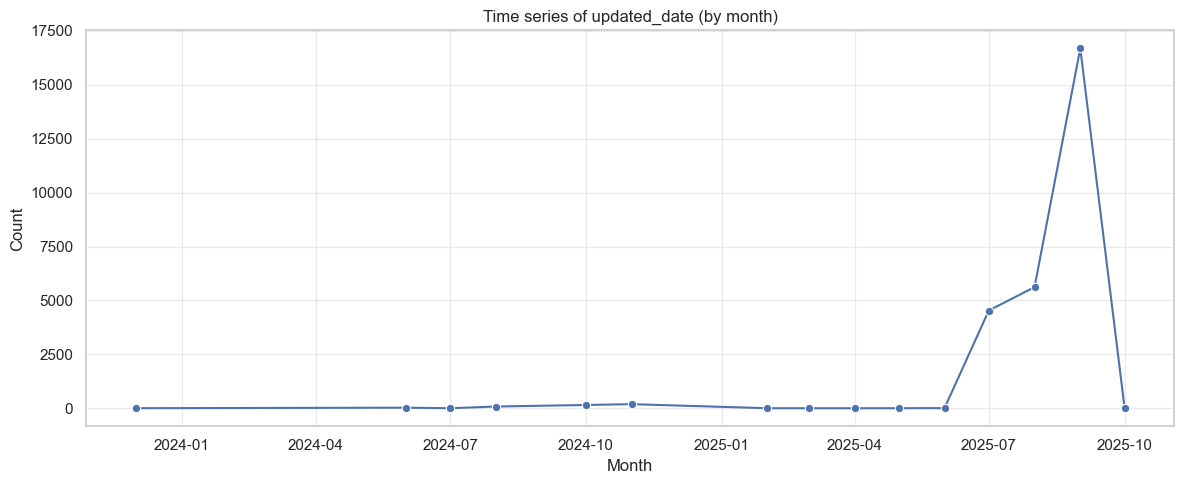


Statistics for last_sync_date:
shape: (9, 2)
┌────────────┬────────────────────────────┐
│ statistic  ┆ last_sync_date             │
│ ---        ┆ ---                        │
│ str        ┆ str                        │
╞════════════╪════════════════════════════╡
│ count      ┆ 26546                      │
│ null_count ┆ 786                        │
│ mean       ┆ 2025-07-18 18:00:25.086391 │
│ std        ┆ null                       │
│ min        ┆ 2025-07-18 17:59:29.898256 │
│ 25%        ┆ 2025-07-18 17:59:29.898256 │
│ 50%        ┆ 2025-07-18 17:59:29.898256 │
│ 75%        ┆ 2025-07-18 17:59:29.898256 │
│ max        ┆ 2025-07-21 10:59:04.045058 │
└────────────┴────────────────────────────┘


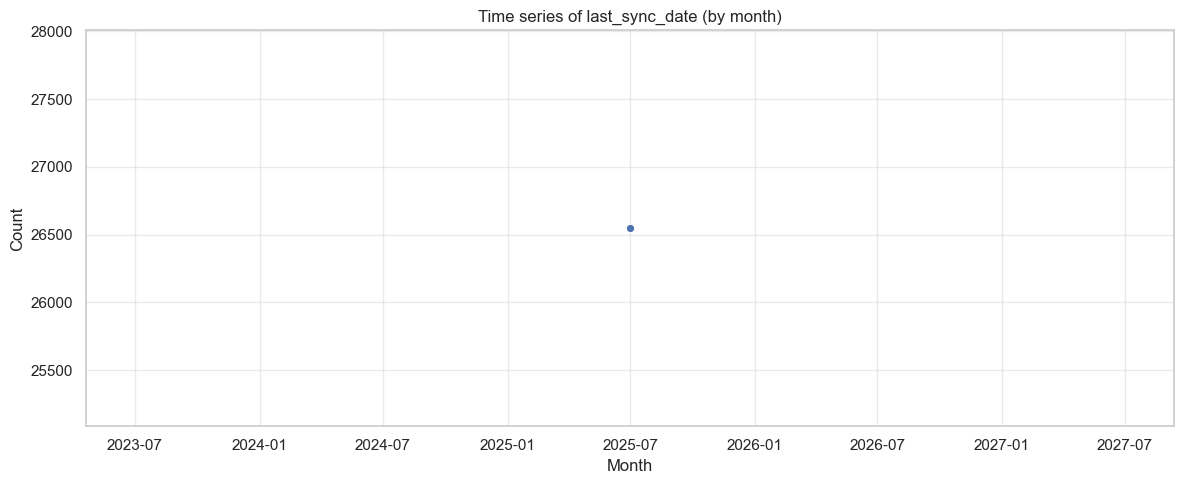


Text stats for description:
shape: (9, 2)
┌────────────┬────────────┐
│ statistic  ┆ len        │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 27332.0    │
│ null_count ┆ 0.0        │
│ mean       ┆ 327.203864 │
│ std        ┆ 544.30323  │
│ min        ┆ 14.0       │
│ 25%        ┆ 14.0       │
│ 50%        ┆ 14.0       │
│ 75%        ┆ 606.0      │
│ max        ┆ 4000.0     │
└────────────┴────────────┘


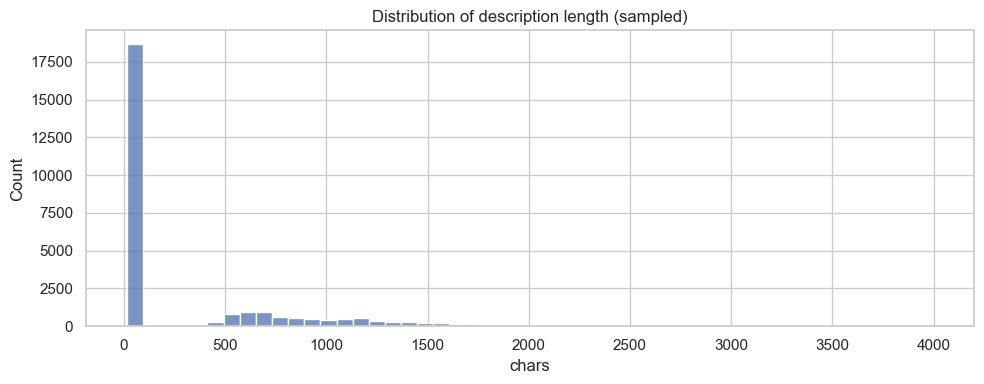


Text stats for description_new:
shape: (9, 2)
┌────────────┬─────────────┐
│ statistic  ┆ len         │
│ ---        ┆ ---         │
│ str        ┆ f64         │
╞════════════╪═════════════╡
│ count      ┆ 22317.0     │
│ null_count ┆ 0.0         │
│ mean       ┆ 982.955012  │
│ std        ┆ 1206.684775 │
│ min        ┆ 14.0        │
│ 25%        ┆ 14.0        │
│ 50%        ┆ 14.0        │
│ 75%        ┆ 2033.0      │
│ max        ┆ 4000.0      │
└────────────┴─────────────┘


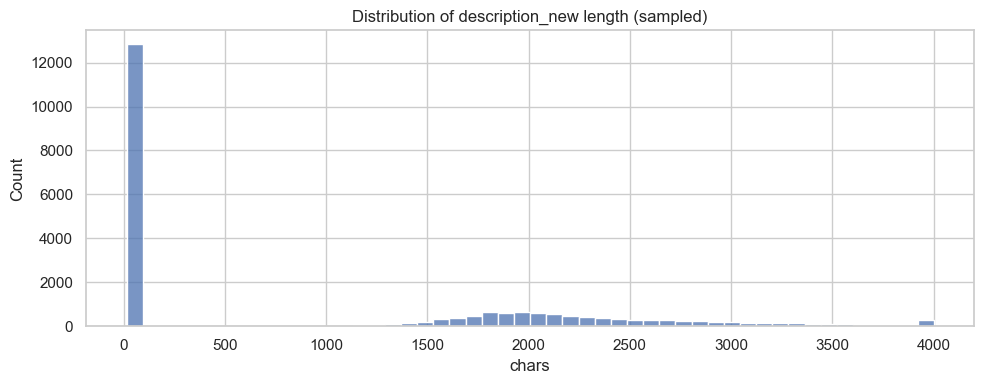


Text stats for sync_error_message:
shape: (9, 2)
┌────────────┬──────┐
│ statistic  ┆ len  │
│ ---        ┆ ---  │
│ str        ┆ f64  │
╞════════════╪══════╡
│ count      ┆ 0.0  │
│ null_count ┆ 0.0  │
│ mean       ┆ null │
│ std        ┆ null │
│ min        ┆ null │
│ 25%        ┆ null │
│ 50%        ┆ null │
│ 75%        ┆ null │
│ max        ┆ null │
└────────────┴──────┘

Top 34 columns by null %:
                    null_count  pct_null
weight                   27332  1.000000
sync_error_message       27332  1.000000
description_new           5015  0.183485
last_sync_date             786  0.028758
sync_status_id             786  0.028758
material                     0  0.000000
volume                       0  0.000000
origin                       0  0.000000
size                         0  0.000000
color                        0  0.000000
item_id                      0  0.000000
gp                           0  0.000000
item_type                    0  0.000000
age_group          

In [33]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# --- Basic checks ---
print("Schema:")
print(df_item.schema)
print(f"Rows: {df_item.height:,}, Columns: {df_item.width}")

print("\nFirst 5 rows:")
print(df_item.head(5))

# Null counts (one-row dataframe)
null_counts = df_item.select([pl.col(c).null_count().alias(c) for c in df_item.columns])
print("\nNull counts:")
print(null_counts)

# Unique / duplicates
print("\nUnique item_id:")
print(df_item.select(pl.col("item_id").n_unique()))

dups = (
    df_item
    .group_by("item_id")
    .agg(pl.len().alias("count"))
    .filter(pl.col("count") > 1)
)
print(f"\nDuplicate item_id count: {dups.height}")
if dups.height:
    print(dups.head(5))

# -------------------------
# Helper small funcs
# -------------------------
def top_n_cat(df, col, n=10):
    stats = (
        df
        .group_by(col)
        .agg(pl.len().alias("count"))
        .sort("count", descending=True)
        .head(n)
    )
    print(f"\nTop {n} for {col}:")
    print(stats)
    return stats

# def sample_series_for_plot(df, col, sample_n=200_000):
#     n = min(sample_n, df.height)
#     s_pd = df.select(pl.col(col)).drop_nulls().sample(n=n, seed=42).to_pandas()[col]
#     return s_pd

def sample_series_for_plot(df, col, sample_n=200_000):
    nonnull_df = df.select(pl.col(col)).drop_nulls()
    if nonnull_df.height == 0:
        return pd.Series([], dtype=float)

    n = min(sample_n, nonnull_df.height)
    s_pd = nonnull_df.sample(n=n, seed=42).to_pandas()[col]
    return s_pd


# -------------------------
# Categorical overviews
# -------------------------
cat_cols = ["category_l1", "category_l2", "category_l3", "brand", "manufacturer",
            "gender_target", "age_group", "item_type", "origin", "sale_status", "color", "size", "description", "description_new", "image_url",
            "is_deleted", "sync_error_message"]

def truncate_label(s, max_len=20):
    """Truncate string s to max_len chars, add '...' if truncated"""
    if s is None:
        return ""
    s = str(s)
    return s if len(s) <= max_len else s[:max_len-3] + "..."

for c in cat_cols:
    if c in df_item.columns:
        #stats = top_n_cat(df_item, c, n=10)
        
        # Get top 10 categories as Pandas DataFrame directly
        stats = top_n_cat(df_item, c, n=10).to_pandas()

        # Truncate labels in Pandas
        stats[c] = stats[c].apply(lambda x: truncate_label(x, max_len=20))

        # plot
        plt.figure(figsize=(10, 5))
        sns.barplot(x=c, y="count", data=stats, palette="viridis")
        plt.title(f"Top 10 {c}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# -------------------------
# Numeric columns (price, gp, weight)
# -------------------------
num_cols = ["price", "gp", "weight"]
for col in num_cols:
    if col in df_item.columns:
        print(f"\nSummary for {col}:")
        # describe after casting decimal -> float
        try:
            print(df_item.select(pl.col(col).cast(pl.Float64)).describe())
        except Exception:
            print(df_item.select(pl.col(col)).describe())

        # sample for plotting
        s = sample_series_for_plot(df_item.with_columns(pl.col(col).cast(pl.Float64)), col)
        if len(s) > 0:
            plt.figure(figsize=(12, 5))
            sns.histplot(s, kde=True, bins=50)
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.tight_layout()
            plt.show()

            plt.figure(figsize=(8, 3))
            sns.boxplot(x=s)
            plt.title(f"Boxplot of {col} (sampled)")
            plt.tight_layout()
            plt.show()

# -------------------------
# Datetime trends (created_date, updated_date, last_sync_date)
# -------------------------
time_cols = ["created_date", "updated_date", "last_sync_date"]
for tcol in time_cols:
    if tcol in df_item.columns:
        print(f"\nStatistics for {tcol}:")
        print(df_item.select(tcol).describe())

        # aggregate by year-month
        trend = (
            df_item
            .with_columns(pl.col(tcol).dt.strftime("%Y-%m").alias("year_month"))
            .group_by("year_month")
            .agg(pl.len().alias("count"))
            .sort("year_month")
        )

        trend_pd = trend.to_pandas()
        if not trend_pd.empty:
            trend_pd["year_month"] = pd.to_datetime(trend_pd["year_month"])
            plt.figure(figsize=(12, 5))
            sns.lineplot(data=trend_pd, x="year_month", y="count", marker="o")
            plt.title(f"Time series of {tcol} (by month)")
            plt.xlabel("Month")
            plt.ylabel("Count")
            plt.grid(alpha=0.4)
            plt.tight_layout()
            plt.show()

# -------------------------
# Text fields: description length, presence counts
# -------------------------
text_cols = ["description", "description_new", "sync_error_message"]
for col in text_cols:
    if col in df_item.columns:
        print(f"\nText stats for {col}:")
        # Compute length distribution
        lens_df = df_item.select(pl.col(col).str.len_chars().alias("len")) \
                         .filter(pl.col("len").is_not_null())
        
        # Describe the lengths
        print(lens_df.describe())

        # Sample & plot length distribution
        # Use the same lengths for plotting
        s = lens_df["len"].to_list()
        if len(s) > 0:
            plt.figure(figsize=(10,4))
            sns.histplot(s, bins=50, kde=False)
            plt.title(f"Distribution of {col} length (sampled)")
            plt.xlabel("chars")
            plt.tight_layout()
            plt.show()

# -------------------------
# Quick missingness report (top columns with most nulls)
# -------------------------
nulls_row = null_counts.to_pandas().T
nulls_row.columns = ["null_count"]
nulls_row["pct_null"] = nulls_row["null_count"] / df_item.height
nulls_row = nulls_row.sort_values("pct_null", ascending=False).head(34)
print("\nTop 34 columns by null %:")
print(nulls_row)
